In [3]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import os, sys
import esutil, scipy
sys.path.append('../')
from xd import *

from utils import *
from cmass_modules import io, Cuts
%matplotlib inline
%load_ext autoreload
%autoreload 2


from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:|
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

#import corner

import sys
sys.path.append('/n/des/lee.5922/programs/cosmolike/MG_musigma/cosmolike_planck_working/')
from plot_chain import plot_single, plot_triple #, calling_public_planck_chains

#from chainconsumer import ChainConsumer


HF = lambda Nr,Nbin: (Nr-Nbin-2) *1./(Nr-1)
HFactor = HF(100, 10)

/home/lee.5922/.local/lib/python2.7/site-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [4]:
# color scheme
dmass_color = '#FF5733'
cmass_sgc_color = '#006ED5'
cmass_full_color = 'black'

In [5]:

def chisqr( d1, d2, cov ):
    from numpy.linalg import inv
    
    diffv = d1 - d2
    chi2= np.dot(diffv, np.dot(inv(cov), diffv.T) )
    return chi2


def chisquare( d1, d2, cov ):
    from numpy.linalg import inv
    
    diffv = d1 - d2
    chi2= np.dot(diffv, np.dot(inv(cov), diffv.T) )
    return chi2

In [6]:
def clean_gold(gold_st82):
    from run_DMASS import priorCut_test
    gold_st82 = gold_st82[gold_st82['MODEST_CLASS'] == 1]
    gold_st82 = Cuts.keepGoodRegion(gold_st82)
    mask_y1a1 = (gold_st82['FLAGS_GOLD'] == 0 )&(priorCut_test(gold_st82))
    gold_st82 = gold_st82[mask_y1a1]
    return gold_st82

In [7]:
def hist_plot( true, data1, labels = None, ranges = None, name = None, weight = [None,None], nbins=100, prefix= 'default', outdir='./'):


    if labels == None:
        print " always label your axes! you must populate the 'labels' keyword with one entry for each dimension of the data."
        stop
    else:
        ndim = len(labels)

    if ranges == None:
        # try to figure out the correct axis ranges.
        print "Using central 98% to set range."
        ranges = []
        for i in xrange(ndim):
            ranges.append( np.percentile(real_data[:,i],[1.,99.]) )

    fig,axes = plt.subplots(nrows=1, ncols= ndim, figsize= (4*ndim, 4) )

    #print weight[0], weight[1].size, data1[:,0].size
    for i in xrange(ndim):
        xbins = np.linspace(ranges[i][0],ranges[i][1], nbins)
        axes[i].hist(true[:,i],bins=xbins,normed=True, label=name[0], weights=weight[0], alpha = 0.5, color ='grey')
        Nhist, _, _=axes[i].hist(data1[:,i],bins=xbins,normed=True,alpha=1.0,label=name[1], weights=weight[1], histtype='step', color='k', lw=1)
        axes[i].set_xlabel(labels[i], fontsize = 20)
        #axes[i].hist(data2[:,i],bins=xbins,normed=True,alpha=0.5,label='data2')
        if i == 0 :
            axes[i].set_yticks([0, Nhist.max()])
            axes[i].set_yticklabels(['$0$', '$1$'])
            axes[i].set_ylabel(r'$n_{\rm gal}$', fontsize=20)
        axes[i].get_yaxis().set_visible(False)
        axes[i].tick_params(labelsize=15)
        axes[i].legend(loc='best',fontsize = 15)

    axes[0].get_yaxis().set_visible(True)
    
    
    
    filename = outdir+"/"+prefix+"diagnostic_histograms_1d.pdf"
    print "writing output plot to: "+filename
    fig.tight_layout()
    fig.subplots_adjust(wspace=0.05, hspace=0.5);
    fig.savefig(filename)
    #plt.close(fig)

# FILTER

g g 4600
r r 6100
i m 7500
z k 8800


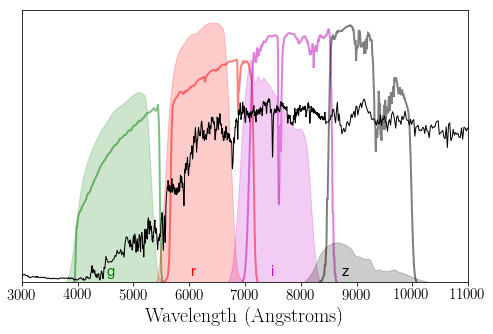

In [168]:
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
from matplotlib import pyplot as plt
from astroML.datasets import fetch_sdss_filter, fetch_vega_spectrum

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.

#from astroML.plotting import setup_text_plots
#setup_text_plots(fontsize=8, usetex=True)

#------------------------------------------------------------
# Set up figure and axes
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111)

#----------------------------------------------------------------------
# Fetch and plot 
plate = 288
mjd = 52000
fiber = 37
#galspec = fetch_sdss_spectrum(plate, mjd, fiber)
#ax.plot(galspec.wavelength(), galspec.spectrum , '-k', linewidth=0.5
#        , label='spectrum')

galdata = np.genfromtxt('sed_NGC4552.txt')
lamb_gal = galdata[:,0] + 1600
galspectrum = galdata[:,1] *1./galdata[:,1].max() * 0.7
ax.plot(lamb_gal, galspectrum , '-k', linewidth=1
        , label='spectrum')

desdata = np.genfromtxt('desfilter.txt')
lamb_des = desdata[:,0]




#------------------------------------------------------------
# Fetch and plot the five filters
text_kwargs = dict(ha='center', va='center', alpha=1.0, fontsize=15)

ii = 1
for f, c, loc in zip('griz', 'grmk', [4600, 6100, 7500, 8800]):
    print f, c, loc
    data = fetch_sdss_filter(f)
    ax.fill(desdata[:,0], desdata[:,ii], ec=c, fc='none', lw = 2.0, alpha=0.5)
    #ax.plot(data[0], data[1]*2, c=c, lw = 0.5)
    ax.fill(data[0], data[1]*2, ec=c, fc=c, alpha=0.2)
    ax.text(loc, 0.05, f, color=c, **text_kwargs)
    ii += 1
ax.set_xlim(3000, 11000)
ax.set_ylim(0.01,)
ax.set_yticks([])
ax.tick_params(labelsize=15)
#ax.set_title('SDSS Filters and Reference Spectrum')
ax.set_xlabel(r'{\rm Wavelength (Angstroms)}', fontsize = 20)
#ax.set_ylabel('normalized flux / filter transmission', fontsize = 20)

fig.savefig('../paper_figure/filter.pdf')

In [68]:
rootdir = '../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5/'
inputdir = rootdir
figoutdir = inputdir+'/figure/'
sysoutdir = inputdir+'/sys/'
wdir = sysoutdir+'/weights/'
basedir = rootdir+'/act/'
#os.system('mkdir '+inputdir)
#os.system('mkdir '+figoutdir)
#os.system('mkdir '+sysoutdir)
#os.system('mkdir '+wdir)
#os.system('cp ../data_txt/systematics/4th/systematic*_no_weight.txt '+inputdir+'/.')

In [17]:
cmass = esutil.io.read(rootdir + 'cmass_in_st82.fits')
train_sample = esutil.io.read(rootdir + 'train_sample_des.fits')
#cmass = esutil.io.read(rootdir + 'cmass_in_st82.fits')

In [19]:
train_sample.size, cmass.size

(12639, 13046)

# Train Sample Z distribution

In [11]:
dmass_st82 = io.SearchAndCallFits(path = rootdir, keyword='gold_st82_prob.fits')
dmass_spt = io.SearchAndCallFits(path = rootdir, keyword='dmass_spt_sys_v3.fits')


--------------------------------
 calling catalog
--------------------------------
gold_st82_prob.fits

--------------------------------
 calling catalog
--------------------------------
dmass_spt_sys_v3.fits


In [12]:
mg1, mg2, _ = esutil.htm.HTM(10).match(train_sample['RA'], train_sample['DEC'], dmass_st82['RA'], \
                                     dmass_st82['DEC'],2./3600, maxmatch=1)
cmass_mask = np.zeros(dmass_st82.size, dtype=bool)
cmass_mask[mg2] = 1
clean_cmass_data_des, nocmass = dmass_st82[cmass_mask], dmass_st82[~cmass_mask]
print 'cmass_fraction', clean_cmass_data_des.size *1./dmass_st82.size

cmass_fraction 0.0181993592282


In [40]:
np.linspace(0.0, 1.5, 6)

array([0. , 0.3, 0.6, 0.9, 1.2, 1.5])

0 14.850858453991615
1 9.344093678297334
2 7.904106337526703
3 7.61927367671493
4 7.120816520294328
5 7.025872300023736
6 7.896194319170821
7 9.05926101748556
8 11.345834322335628
9 17.83368937415935


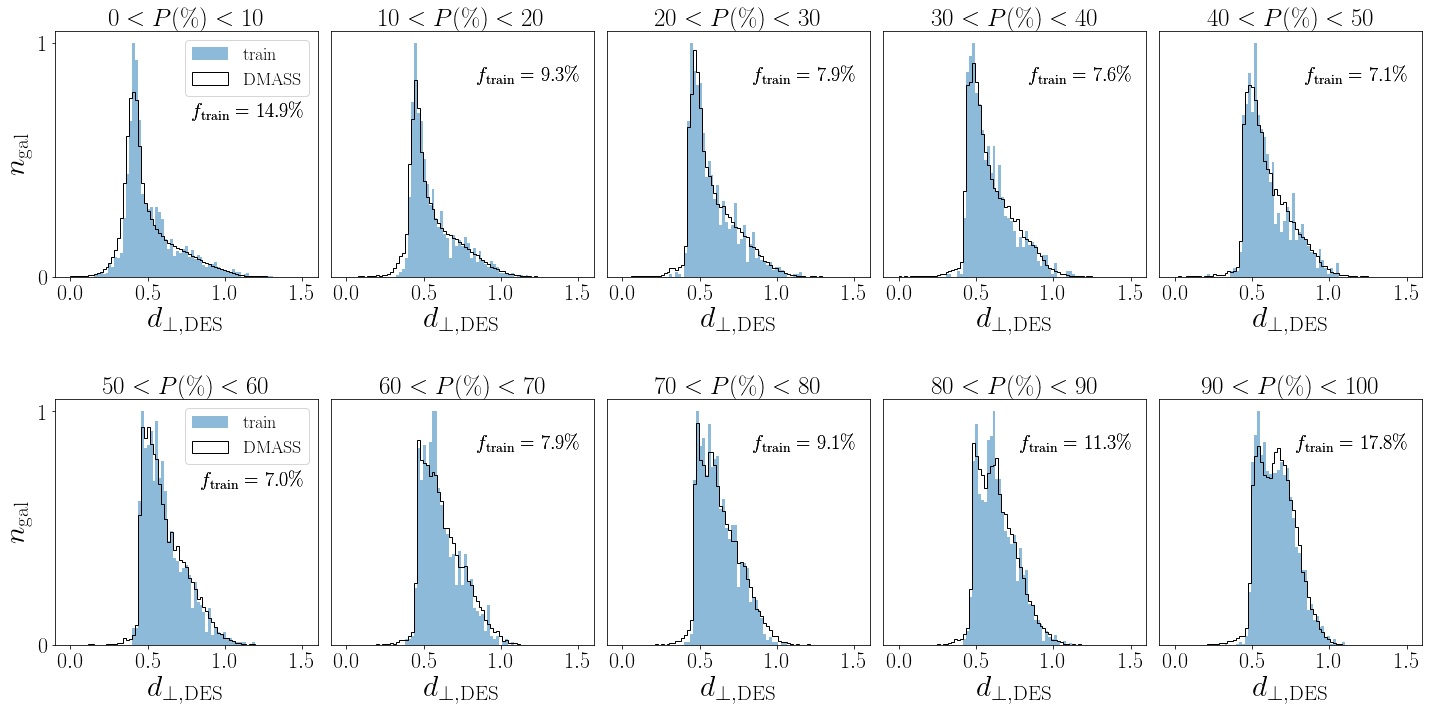

In [49]:
from matplotlib.ticker import FormatStrFormatter

probcut = 0.0

labels = [r'${\rm train}$', r'{\rm DMASS}']
catlist = [clean_cmass_data_des, dmass_spt[dmass_spt['CMASS_PROB']>0.00]]
cbin = np.linspace(0.,1.5, 80)
probcut = 0
fig, ax = plt.subplots(2,5, figsize=(20,10))
ax = ax.ravel()
for i in range(10):     
    for la, cat in zip(labels, catlist) :     
        mask = (cat['EachProb_CMASS'] > probcut) & (cat['EachProb_CMASS'] < probcut + 0.1) \
        & (cat['EachProb_CMASS'] > 0.00) # & ( (cat['MAG_MODEL_G']- cat['MAG_MODEL_R']) < 1.6)
        
        histtype = 'stepfilled'
        alpha = 0.5
        if la == r'{\rm DMASS}' : 
            Nhist, _,_ = ax[i].hist( (cat['MAG_DETMODEL_R']-cat['MAG_DETMODEL_I']- (cat['MAG_DETMODEL_G']-cat['MAG_DETMODEL_R'])/8.)[mask], \
                    bins = cbin, alpha = 1.0, label = la + ''.format(np.sum(mask)*1./mask.size*100), \
                       normed=True, histtype='step', color = 'black', weights = cat[mask]['EachProb_CMASS']*cat[mask]['WEIGHT_SYS']);  
        
        else : 
            Nhist2, _, _=ax[i].hist( (cat['MAG_DETMODEL_R']-cat['MAG_DETMODEL_I']- (cat['MAG_DETMODEL_G']-cat['MAG_DETMODEL_R'])/8.)[mask], \
                    bins = cbin, alpha = alpha, label = la + ''.format(np.sum(mask)*1./mask.size*100), \
                       normed=True, histtype=histtype); 
            fraction_train = np.sum(mask)*1./mask.size*100
            print i, fraction_train
            
        #print probcut, probcut+0.1, np.sum(mask), la
        #print i,
        tag = r' ${:0.0f} < P(\%) < {:0.0f}$'.format(probcut*100, probcut*100+10)
        
        #ax[i].set_xlim(0, 1.0)
        if i in [0, 5]: 
            ax[i].legend(loc=1, fontsize = 18)
            ax[i].set_ylabel(r'$n_{\rm gal}$', fontsize = 30)
            
            ax[i].set_yticks([0, max(Nhist.max(), Nhist2.max())])
            ax[i].set_yticklabels(['$0$', '$1$'])
            ax[i].text(0.95, 0.7, r'$f_{\rm train}=$'+'$~{:0.1f}\%$'.format(fraction_train), 
                   fontsize = 20, ha='right', va='top', transform=ax[i].transAxes)
        else : 
            #pass
            ax[i].get_yaxis().set_visible(False)
            ax[i].text(0.95, 0.85, r'$f_{\rm train}=$'+'$~{:0.1f}\%$'.format(fraction_train), 
                   fontsize = 20, ha='right', va='top', transform=ax[i].transAxes)
        ax[i].set_title(tag, fontsize=25)
        ax[i].set_xlabel(r'$d_{\perp, {\rm DES}}$', fontsize = 30)
        ax[i].set_xlim(-0.1, 1.6)
        ax[i].set_xticks(np.linspace(0.0, 1.5, 4))
        #ax[i].set_xticklabels(np.linspace(0.0, 1.5, 6))
        #ax[i].set_ylabel(r'$n(z)$')
        #ax[i].get_yaxis().set_visible(False)
        ax[i].tick_params(labelsize = 22)
        #ax[i].set_ylim(0,7)
        
        #ax[i].xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
        #elif i != 2 : ax[i].get_yaxis().set_visible(False)
        
    probcut += 0.1
    
#ax[0].get_yaxis().set_visible(True)
#ax[5].get_yaxis().set_visible(True)


fig.tight_layout()
fig.subplots_adjust(wspace=0.05, hspace=0.5);
fig.savefig('../paper_figure//probhist_dperp_v3.pdf')


No z_band!
No z_band!
writing output plot to: ../paper_figure//spt_v3_diagnostic_histograms_1d.pdf


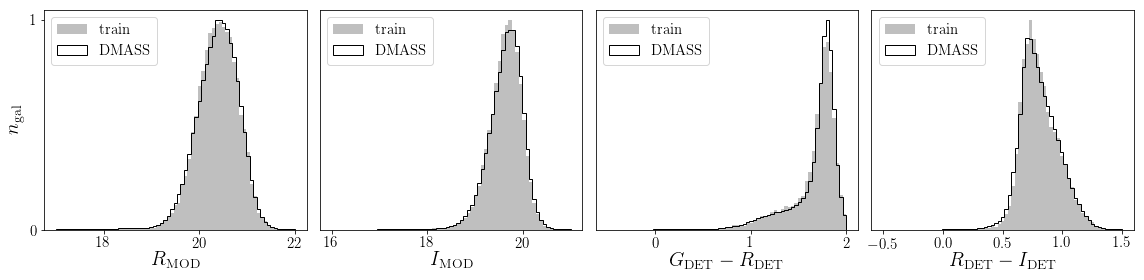

In [167]:
X_train, Xcov_train = mixing_color(train_sample)
X_test,_ = mixing_color(dmass_spt)

weight = dmass_spt['CMASS_PROB'] * dmass_spt['WEIGHT0_fwhm_r'] * dmass_spt['WEIGHT1_airmass_z'] #dmass_spt['WEIGHT_SYS'] 
# Plotting all
labels = [r'${R_{\rm MOD}}$', r'${I_{\rm MOD}}$', r'$G_{\rm DET}-R_{\rm DET}$', r'$R_{\rm DET}-I_{\rm DET}$']
ranges =  [[17,22], [16,21], [-.5,2], [-.5,1.5]]
hist_plot( X_train, X_test, labels = labels, ranges = ranges,\
                         name =[r'{\rm train}',r'{\rm DMASS}' ], nbins=70, \
                   weight=[None, weight], outdir = '../paper_figure/', prefix='spt_v3_')


# Validation

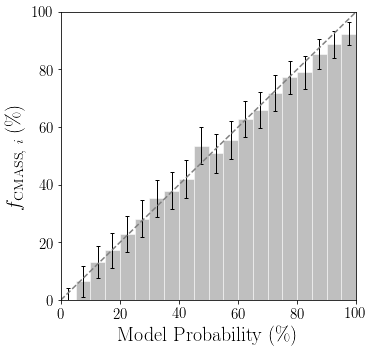

In [53]:
pbin, frac, fracerr = np.genfromtxt('../paper_figure/model_probability.txt', unpack=True)


fig, ax = plt.subplots(figsize = (5.3,5))

ax.bar(pbin, frac , 5, edgecolor='w',
        color='grey', yerr = fracerr, 
        alpha = 0.5, label = 'test', error_kw = {'elinewidth':1, 'capsize':2.4} )

ax.plot([0,100], [0,100], ls='--', color='grey')
ax.set_ylim(0,100)
ax.set_xlim(0,100)

ax.set_xlabel(r'{\rm Model Probability (\%)}', fontsize = 20)
ax.set_ylabel(r'$f_{ {\rm CMASS},~i}~(\%)$', fontsize = 20)
ax.tick_params(axis='both', labelsize = 15)
#ax.legend(loc='best', fontsize=15)
fig.tight_layout()
#fig.savefig('../paper_figure/model_probability.pdf')

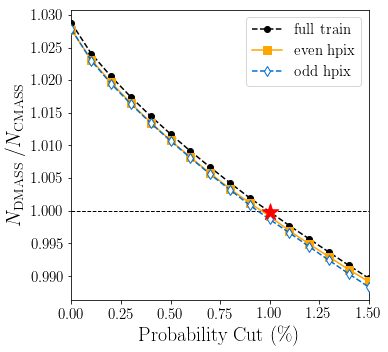

In [213]:
pbin, numdensity,numdensity_even,numdensity_odd = \
np.genfromtxt('../paper_figure/prob_test_num_density.txt', unpack=True)

fig, ax = plt.subplots(figsize = (5.5,5))

ax.plot(pbin, numdensity, ls = '--', marker='o', color='black',  label = r'{\rm full train}', zorder = 10)
ax.plot(pbin, numdensity_even, ls = '-', marker='s', markersize = 8, color= 'orange', label = r'{\rm even hpix}', zorder = 11)
ax.plot(pbin, numdensity_odd, ls = '--', marker='d', markersize = 7, markerfacecolor='w', color= cmass_sgc_color, label = r'{\rm odd hpix}', zorder = 12)
   
ax.scatter(0.01*100, numdensity[10], marker='*', color='red', s=300, facecolor='r', zorder = 100)

ax.axhline(y = 1.0, ls = '--', lw = 1, color='k')
#ax.scatter(pc, numdensity, marker='o', color='green', s=30, label = 'full train')
#ax.scatter(pc, numdensity_even, marker='^', color='blue', s=30, label = 'even hpix')
#ax.scatter(pc, numdensity_odd, marker='s', color='black', s=30, label = 'odd hpix')

#ax.scatter(0.01, numdensity_s82, marker='*', color='red', s=150)
#ax.scatter(0.01, numdensity, marker='*', color='red', s=150, label = 'current setting')
ax.set_xlabel(r'{\rm Probability Cut (\%)}', fontsize = 20)
ax.set_ylabel(r'$N_{\rm DMASS}~/ N_{\rm CMASS}$', fontsize = 20)
#ax.text(0.007, 0.925, 'bin size = 0.0001')
ax.legend(fontsize = 15)
ax.tick_params(labelsize = 15)
ax.set_xlim(0, 0.015*100)
fig.tight_layout()
fig.savefig('../paper_figure/prob_test_num_density.pdf') 

# Anguar Clustering

In [5]:
#cov_dmass = np.genfromtxt(rootdir+'/act//acf_auto_dmass_all_weight_pcut01_nbins10_jk100.cov')
#_,datav_dmass, _ = np.genfromtxt(rootdir+'/act//acf_auto_dmass_all_weight_pcut01_nbins10_jk100.txt', unpack=True) 
#cov = cov_cmass_n + cov_dmass
#invcov = np.linalg.inv(cov)
#datav = datav_dmass - xi_sgc
#chisqr = np.dot(np.dot(datav, invcov), datav.T) 

In [69]:
from su_utils import read_cov, imshowplot
#cov_an_cmass_filename = '/n/des/lee.5922/programs/cosmolike/MG_musigma/cosmolike_planck_mg_deltab_gauss/cov/cov_mcal4_cmass_sgc_10bins'
#cov_an_cmass = read_cov( covfilename=cov_an_cmass_filename )[-10:, -10:]

#cov_an_dmass_filename = '/n/des/lee.5922/programs/cosmolike/MG_musigma/cosmolike_planck_mg_deltab_gauss/cov/cov_mcal4_dmass_10bins'
#cov_an_dmass = read_cov( covfilename=cov_an_dmass_filename )[-10:, -10:]

In [70]:
cov_mocks = np.genfromtxt('../data_txt/mocks/cov_mock_galaxy_DR12_CMASS_S_QPM_760.cov')
cov_mocks_ngc = np.genfromtxt('../data_txt/mocks/cov_mock_galaxy_DR12_CMASS_N_QPM_1000.cov')

cov_rescaled_mocks = np.genfromtxt('../data_txt/cmass/cov_rescaled_mocks_NG.txt')
#cov_rescaled_mocks = np.genfromtxt('../data_txt/cmass/cov_dmass_no_veto_rescaled_mocks_NG.txt')
cov_rescaled_mocks_NOWEIGHT = np.genfromtxt('../data_txt/cmass/cov_dmass_no_veto_rescaled_mocks_NG.txt')
print cov_rescaled_mocks.shape

(10, 10)


In [71]:
#meanr_sgc, xi_sgc, _ = np.loadtxt('../data_txt//acf_auto_cmass_sgc_sys_cp_nz_weight_nbins10_jk100.txt',unpack=True)
cmass_sgc_data = np.genfromtxt('../data_txt/cmass/npairs_cmass_sgc_bins10_binslop_05.txt')
meanr_sgc, _, _, xi_sgc, _, DD_sgc, RR_sgc, DR_sgc, npairs_sgc = [cmass_sgc_data[:,i] for i in range(9)]

#cov_cmass_s_1 = np.genfromtxt('../data_txt//acf_auto_cmass_sgc_sys_cp_nz_weight_nbins10_jk100.cov')
#fisher_cmass_s = HFactor * np.linalg.inv(cov_cmass_s_1)
#cov_cmass_s = np.linalg.inv(fisher_cmass_s)
cov_cmass_s = cov_mocks.copy() #cov_an_cmass.copy()
xi_err_sgc = np.sqrt(cov_cmass_s.diagonal())


cmass_ngc_data1 = np.genfromtxt('../data_txt/cmass/npairs_cmass_ngc_bins10_binslop_05.txt')
meanr_ngc, _, _, xi_ngc, sigma_xi_ngc1, DD_ngc, RR_ngc, DR_ngc, npairs_ngc = [cmass_ngc_data1[:,i] for i in range(9)]
#meanr_ngc, xi_ngc, _ = np.loadtxt('../data_txt//acf_auto_cmass_ngc_sys_cp_nz_weight_nbin10_jk100.txt',unpack=True)
cov_cmass_n = cov_mocks_ngc.copy() #np.genfromtxt('../data_txt//acf_auto_cmass_ngc_sys_cp_nz_weight_nbin10_jk100.cov')* 1./HFactor
xi_err_ngc = np.sqrt(cov_cmass_n.diagonal())


#meanr_full, xi_full, _ = np.loadtxt('../data_txt//acf_auto_cmass_full_sys_cp_nz_weight_nbins10_jk100.txt',unpack=True)
#cov_cmass_full = np.genfromtxt('../data_txt//acf_auto_cmass_full_sys_cp_nz_weight_nbins10_jk100.cov')*1./HFactor

DD_full = DD_sgc + DD_ngc
DR_full = DR_sgc + DR_ngc
RR_full = RR_sgc + RR_ngc

meanr_full = meanr_ngc.copy()
xi_full = (DD_full - 2*DR_full + RR_full)*1./RR_full
cov_cmass_full = np.linalg.inv(np.linalg.inv( cov_cmass_s ) + np.linalg.inv( cov_cmass_s ))
xi_err_full = np.sqrt(cov_cmass_full.diagonal())

#meanr_dmass, xi_dmass, _ = np.genfromtxt(rootdir+'/act//acf_auto_dmass_all_weight_pcut01_nbins10_jk100.txt', unpack=True) 
#cov_dmass = np.genfromtxt(rootdir+'/act//acf_auto_dmass_all_weight_pcut01_nbins10_jk100.cov')* 1./HFactor

dmass_data = np.genfromtxt('../data_txt/cmass/npairs_dmass_pcut_sysweight_bins10_binslop_05.txt')
#dmass_data = np.genfromtxt('../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5/act//acf_auto_poisson_DMASS_pcut_NOWEIGHT_10bins.npairs')
meanr_dmass, _, _, xi_dmass, _, _, _, _, _ = [dmass_data[:,i] for i in range(9)]
cov_dmass = cov_rescaled_mocks.copy() #cov_an_dmass.copy()
xi_err_dmass = np.sqrt(cov_dmass.diagonal())


dmass_data_NOWEIGHT = np.genfromtxt('../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5/act//acf_auto_poisson_DMASS_pcut_NOWEIGHT_10bins.npairs')
meanr_dmass_NOWEIGHT, _, _, xi_dmass_NOWEIGHT, _, _, _, _, _ = [dmass_data_NOWEIGHT[:,i] for i in range(9)]
cov_dmass_NOWEIGHT = cov_rescaled_mocks_NOWEIGHT.copy() #cov_an_dmass.copy()
xi_err_dmass_NOWEIGHT = np.sqrt(cov_dmass_NOWEIGHT.diagonal())

In [72]:
#cov_dmass = np.genfromtxt(rootdir+'/act//acf_auto_dmass_all_weight_pcut01_nbins10_jk100.cov')* 1./HFactor
#meanr_dmass, xi_dmass, _ = np.genfromtxt(rootdir+'/act//acf_auto_dmass_all_weight_pcut01_nbins10_jk100.txt', unpack=True) 
cov = cov_cmass_s + cov_dmass
invcov = np.linalg.inv(cov)
datav = xi_dmass - xi_sgc
chisqr = np.dot(np.dot(datav, invcov), datav.T) 
print 'chisqr/dof between SGC and DMASS', chisqr, '/10'


cov = cov_cmass_n + cov_dmass
invcov = np.linalg.inv(cov)
datav = xi_dmass - xi_ngc
chisqr_dn = np.dot(np.dot(datav, invcov), datav.T) 
print 'chisqr/dof between NGC and DMASS', chisqr_dn, '/10'


cov = cov_cmass_s + cov_cmass_n
invcov = np.linalg.inv(cov)
datav = xi_sgc - xi_ngc
chisqr_sn = np.dot(np.dot(datav, invcov), datav.T) 
print 'chisqr/dof between NGC and SGC', chisqr_sn, '/10'


cov = cov_cmass_full + cov_dmass
invcov = np.linalg.inv(cov)
datav = xi_dmass - xi_full
chisqr_df = np.dot(np.dot(datav, invcov), datav.T) 
print 'chisqr/dof between full and DMASS', chisqr_df, '/10'

chisqr/dof between SGC and DMASS 2.579001510259711 /10
chisqr/dof between NGC and DMASS 13.472112357037549 /10
chisqr/dof between NGC and SGC 14.53189229653143 /10
chisqr/dof between full and DMASS 8.604200260712448 /10


In [73]:
#theta_th, theory = np.loadtxt('../data_txt/acf_cmass_ngc_theory.txt', unpack=True)
#theta_th, theory_sgc = np.loadtxt('../data_txt/acf_cmass_sgc_theory.txt', unpack=True)


# callig cosmosis theory line

sis_dir = '/n/des/lee.5922/programs/cosmolike/cosmosis/output/'
theory_sgc = np.genfromtxt(sis_dir + 'datav_cmass_sgc_theory/galaxy_xi_dmass/bin_1_1.txt')
#xi_ngc_sis = np.genfromtxt(sis_dir + 'datav_cmass_ngc_theory/galaxy_xi_dmass/bin_1_1.txt')
theory = np.genfromtxt(sis_dir + 'datav_cmass_full_theory/galaxy_xi_dmass/bin_1_1.txt')
theta_th = np.genfromtxt(sis_dir + 'datav_cmass_sgc_theory/galaxy_xi_dmass/theta.txt')
theta_th = theta_th * 180/np.pi

In [74]:
#cov_dmass = np.genfromtxt(rootdir+'/act//acf_auto_dmass_all_weight_pcut01_nbins10_jk100.cov')* 1./HFactor
#meanr_dmass, xi_dmass, _ = np.genfromtxt(rootdir+'/act//acf_auto_dmass_all_weight_pcut01_nbins10_jk100.txt', unpack=True) 
cov = cov_cmass_s + cov_dmass_NOWEIGHT
invcov = np.linalg.inv(cov)
datav = xi_dmass_NOWEIGHT - xi_sgc
chisqr_NOWEIGHT = np.dot(np.dot(datav, invcov), datav.T) 
print 'chisqr/dof between SGC and DMASS', chisqr_NOWEIGHT, '/10'


cov = cov_cmass_n + cov_dmass_NOWEIGHT
invcov = np.linalg.inv(cov)
datav = xi_dmass_NOWEIGHT - xi_ngc
chisqr_dn_NOWEIGHT = np.dot(np.dot(datav, invcov), datav.T) 
print 'chisqr/dof between NGC and DMASS', chisqr_dn_NOWEIGHT, '/10'

cov = cov_cmass_full + cov_dmass_NOWEIGHT
invcov = np.linalg.inv(cov)
datav = xi_dmass_NOWEIGHT - xi_full
chisqr_df_NOWEIGHT = np.dot(np.dot(datav, invcov), datav.T) 
print 'chisqr/dof between full and DMASS', chisqr_df_NOWEIGHT, '/10'

chisqr/dof between SGC and DMASS 4.935731016124328 /10
chisqr/dof between NGC and DMASS 15.250029809390979 /10
chisqr/dof between full and DMASS 10.608597652551461 /10


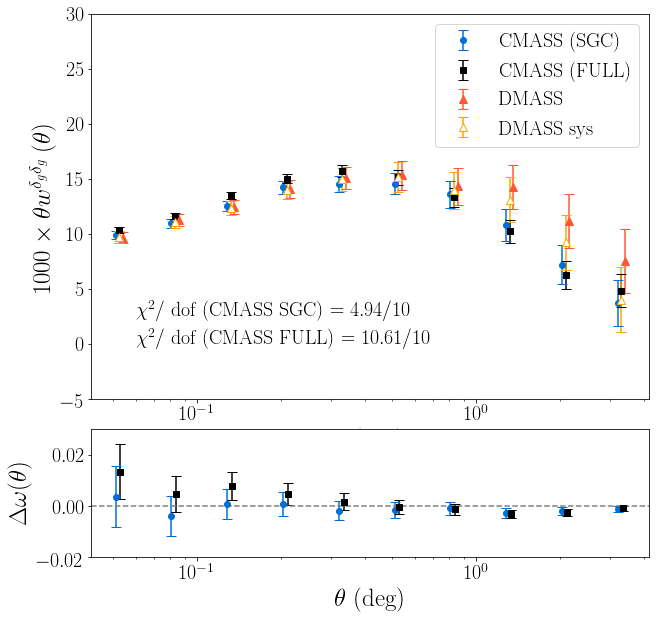

In [123]:
fig, (ax, ax2) = plt.subplots(2, 1, figsize = (10, 10), gridspec_kw = {'height_ratios':[3, 1]})


#ax.errorbar(meanr, xi, yerr = xi_err, fmt = '-', color='b', label='dmass no weight')
#ax.errorbar(meanr2, xi2, yerr = xi_err2, fmt = '-', color='b', label='dmass vetoed')
#ax.errorbar(meanr_ngc, xi_ngc, yerr = xi_err_ngc, fmt = '.', color='b', label=r'${\rm CMASS~(NGC)}$')


ax.errorbar(meanr_sgc*0.97, 1000*meanr_sgc*xi_sgc, yerr = 1000*meanr_sgc*xi_err_sgc, fmt = 'o', capsize=5, color=cmass_sgc_color, label=r'${\rm CMASS~(SGC)}$')
ax.errorbar(meanr_full, 1000*meanr_sgc*xi_full, yerr = 1000*meanr_sgc*xi_err_full, fmt = 's', capsize=5, color=cmass_full_color, label=r'${\rm CMASS~(FULL)}$')
ax.errorbar(meanr_dmass_NOWEIGHT*1.03, 1000*meanr_dmass_NOWEIGHT*xi_dmass_NOWEIGHT,\
            yerr = 1000*meanr_dmass_NOWEIGHT*xi_err_dmass_NOWEIGHT, fmt = '^',\
            capsize=5, markersize=8, color=dmass_color, label=r'${\rm DMASS}$')
ax.errorbar(meanr_dmass*1.0, 1000*meanr_sgc*xi_dmass, yerr = 1000*meanr_sgc*xi_err_dmass, \
            fmt = '^', capsize=5, markersize=8, markerfacecolor='w', color='orange', label=r'${\rm DMASS~sys}$')





#theta_th, theory = np.loadtxt('../data_txt/acf_cmass_ngc_theory.txt', unpack=True)
#theta_th, theory_sgc = np.loadtxt('../data_txt/acf_cmass_sgc_theory.txt', unpack=True)
#ax.plot(theta_th, 1000*theta_th*theory, color='grey' )
#ax.plot(theta_th, 1000*theta_th*theory_sgc, color='grey' )

#ax.plot(meanr_sgc, xi_sgc, '-', color=cmass_sgc_color, lw=0.5)
#ax.plot(meanr_full, xi_full, '-', color=cmass_full_color, lw=0.5)
#ax.plot(meanr_dmass, xi_dmass, '-', color=dmass_color, lw=0.5)

#ax.errorbar(meanr4*0.95, xi4, yerr = xi_err4, fmt = '.', color='b', label='dmass no weight')
ax.set_ylim(-5, 30)
ax.set_xscale('log')
ax.set_yscale('linear')
ax.legend(loc = 'best', fontsize = 20)

#ax.text(0.05, 0.0015, chisqr_label, fontsize = 15)
ax.text(0.06, 2.5, r'$\chi^2/$ $\rm dof ~(DMASS-CMASS~SGC) $ $= {:0.2f}/{}$'.format(chisqr_NOWEIGHT, meanr_sgc.size), fontsize = 20)
ax.text(0.06, 0, r'$\chi^2/$ $\rm dof ~(DMASS-CMASS~FULL) $ $= {:0.2f}/{}$'.format(chisqr_df_NOWEIGHT, meanr_full.size), fontsize = 20)
#ax.text(0.05, 0.0005, r'$\chi^2/$ $\rm dof ~(SGC-NGC)   $ $= {:0.2f}/{}$'.format(chisqr_sn, meanr_sgc.size), fontsize = 15)
#ax.set_ylim(8e-4,)
ax.set_xlim(2.5/60, 250./60)
ax.set_xlabel(r'$\theta$ ${\rm (deg)}$', fontsize = 25)
ax.set_ylabel(r'$1000 \times \theta w^{ \delta_{g} \delta_{g}} ~(\theta)$', fontsize = 25)
#ax.set_ylabel(r'$\omega(\theta)$', fontsize = 25)
ax.tick_params(labelsize=20)

ax2.errorbar(meanr_dmass*0.97, xi_sgc-xi_dmass_NOWEIGHT, yerr = np.sqrt(xi_err_sgc**2 + xi_err_dmass_NOWEIGHT**2), capsize=5,fmt='o', color = cmass_sgc_color )
#ax2.errorbar(meanr3*1.05, xi_ngc-xi3, yerr = np.sqrt(xi_err_ngc**2 + xi_err3**2), fmt='.', color = 'b' )
ax2.errorbar(meanr_full*1.01, xi_full-xi_dmass_NOWEIGHT, yerr = np.sqrt(xi_err_full**2 + xi_err_dmass_NOWEIGHT**2), capsize=5,fmt='s', color = cmass_full_color )
#ax2.errorbar(meanr_dmass*1.05, xi_dmass-xi_dmass_NOWEIGHT, yerr = np.sqrt(xi_err_dmass**2 + xi_err_dmass_NOWEIGHT**2), capsize=5,fmt='^', color = 'orange' )


ax2.axhline(y = 0, ls = '--', color='grey')
ax2.set_xscale('log')
ax2.set_xlim(2.5/60, 250./60)
ax2.set_ylim(-0.02, 0.03)
ax2.set_ylabel(r'$\Delta \omega (\theta) $', fontsize = 25)
ax2.set_xlabel(r'$\theta$ ${\rm (deg)}$', fontsize = 25)
ax2.tick_params(labelsize=20)


fig.subplots_adjust(hspace=0.12);

#fig.savefig('../paper_figure/acf_comparison_cmass_dmass_v7.pdf')

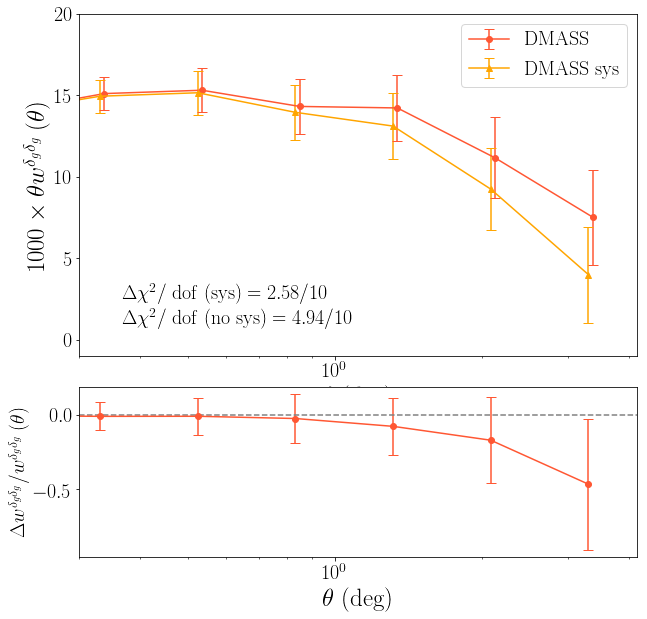

In [98]:
fig, (ax, ax2) = plt.subplots(2, 1, figsize = (10, 10), gridspec_kw = {'height_ratios':[2, 1]})


#ax.errorbar(meanr, xi, yerr = xi_err, fmt = '-', color='b', label='dmass no weight')
#ax.errorbar(meanr2, xi2, yerr = xi_err2, fmt = '-', color='b', label='dmass vetoed')
#ax.errorbar(meanr_ngc, xi_ngc, yerr = xi_err_ngc, fmt = '.', color='b', label=r'${\rm CMASS~(NGC)}$')


#ax.errorbar(meanr_sgc*0.97, 1000*meanr_sgc*xi_sgc, yerr = 1000*meanr_sgc*xi_err_sgc, fmt = 'o', capsize=5, color=cmass_sgc_color, label=r'${\rm CMASS~(SGC)}$')
#ax.errorbar(meanr_full, 1000*meanr_sgc*xi_full, yerr = 1000*meanr_sgc*xi_err_full, fmt = 's', capsize=5, color=cmass_full_color, label=r'${\rm CMASS~(FULL)}$')
ax.errorbar(meanr_dmass_NOWEIGHT*1.02, 1000*meanr_dmass_NOWEIGHT*xi_dmass_NOWEIGHT,\
            yerr = 1000*meanr_dmass_NOWEIGHT*xi_err_dmass_NOWEIGHT, fmt = 'o-',\
            capsize=5, color=dmass_color, label=r'${\rm DMASS}$')
ax.errorbar(meanr_dmass*1.0, 1000*meanr_sgc*xi_dmass, yerr = 1000*meanr_sgc*xi_err_dmass, \
            fmt = '^-', capsize=5, color='orange', label=r'${\rm DMASS~sys}$')





#theta_th, theory = np.loadtxt('../data_txt/acf_cmass_ngc_theory.txt', unpack=True)
#theta_th, theory_sgc = np.loadtxt('../data_txt/acf_cmass_sgc_theory.txt', unpack=True)
#ax.plot(theta_th, 1000*theta_th*theory, color='grey' )
#ax.plot(theta_th, 1000*theta_th*theory_sgc, color='grey' )

#ax.plot(meanr_sgc, xi_sgc, '-', color=cmass_sgc_color, lw=0.5)
#ax.plot(meanr_full, xi_full, '-', color=cmass_full_color, lw=0.5)
#ax.plot(meanr_dmass, xi_dmass, '-', color=dmass_color, lw=0.5)

#ax.errorbar(meanr4*0.95, xi4, yerr = xi_err4, fmt = '.', color='b', label='dmass no weight')
ax.set_ylim(-1, 20)
ax.set_xscale('log')
ax.set_yscale('linear')
ax.legend(loc = 'best', fontsize = 20)

#ax.text(0.05, 0.0015, chisqr_label, fontsize = 15)
ax.text(22./60, 2.5, r'$\Delta \chi^2/$ $\rm dof ~(sys) $ $= {:0.2f}/{}$'.format(chisqr, meanr_sgc.size), fontsize = 20)
ax.text(22./60, 1, r'$\Delta \chi^2/$ $\rm dof ~(no~sys) $ $= {:0.2f}/{}$'.format(chisqr_NOWEIGHT, meanr_sgc.size), fontsize = 20)
#ax.text(0.05, 0.0005, r'$\chi^2/$ $\rm dof ~(SGC-NGC)   $ $= {:0.2f}/{}$'.format(chisqr_sn, meanr_sgc.size), fontsize = 15)
#ax.set_ylim(8e-4,)
ax.set_xlim(18./60, 250./60)
ax.set_xlabel(r'$\theta$ ${\rm (deg)}$', fontsize = 25)
ax.set_ylabel(r'$1000 \times \theta w^{ \delta_{g} \delta_{g}} ~(\theta)$', fontsize = 25)
#ax.set_ylabel(r'$\omega(\theta)$', fontsize = 25)
ax.tick_params(labelsize=20)

#ax2.errorbar(meanr_dmass*0.97, xi_sgc-xi_dmass_NOWEIGHT, yerr = np.sqrt(xi_err_sgc**2 + xi_err_dmass_NOWEIGHT**2), capsize=5,fmt='o', color = cmass_sgc_color )
#ax2.errorbar(meanr3*1.05, xi_ngc-xi3, yerr = np.sqrt(xi_err_ngc**2 + xi_err3**2), fmt='.', color = 'b' )
#ax2.errorbar(meanr_full*1.01, xi_full-xi_dmass_NOWEIGHT, yerr = np.sqrt(xi_err_full**2 + xi_err_dmass_NOWEIGHT**2), capsize=5,fmt='s', color = cmass_full_color )
fracdiff_err = np.sqrt((xi_dmass/xi_dmass_NOWEIGHT)**2 *\
(xi_err_dmass**2/xi_dmass**2 + xi_err_dmass_NOWEIGHT**2/xi_dmass_NOWEIGHT**2))
ax2.errorbar(meanr_dmass*1.0, (xi_dmass-xi_dmass_NOWEIGHT)/xi_dmass_NOWEIGHT, yerr = fracdiff_err, capsize=5,fmt='o-', color = dmass_color )


ax2.axhline(y = 0, ls = '--', color='grey')
ax2.set_xscale('log')
ax2.set_xlim(18./60, 250./60)
#ax2.set_ylim(-0.02, 0.03)
ax2.set_ylabel(r'$\Delta w^{ \delta_{g} \delta_{g}}/ w^{ \delta_{g} \delta_{g}}~(\theta) $', fontsize = 20)
ax2.set_xlabel(r'$\theta$ ${\rm (deg)}$', fontsize = 25)
ax2.tick_params(labelsize=20)


fig.subplots_adjust(hspace=0.12);

#fig.savefig('../paper_figure/acf_comparison_cmass_dmass-5.pdf')

In [75]:
actdir = '../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//act//'

In [76]:
dmass_frac_data = np.genfromtxt(actdir + 'acf_auto_poisson_DMASS_pcut_NOWEIGHT_FRAC_10bins.npairs')
meanr_frac, _, _, xi_frac, _, _,_,_,_ = [dmass_frac_data[:,i] for i in range(9)]

dmass_sys_frac_data = np.genfromtxt(actdir + 'acf_auto_poisson_DMASS_pcut_sysweight_FRAC_10bins.npairs')
meanr_sys_frac, _, _, xi_sys_frac, _, _,_,_,_ = [dmass_sys_frac_data[:,i] for i in range(9)]

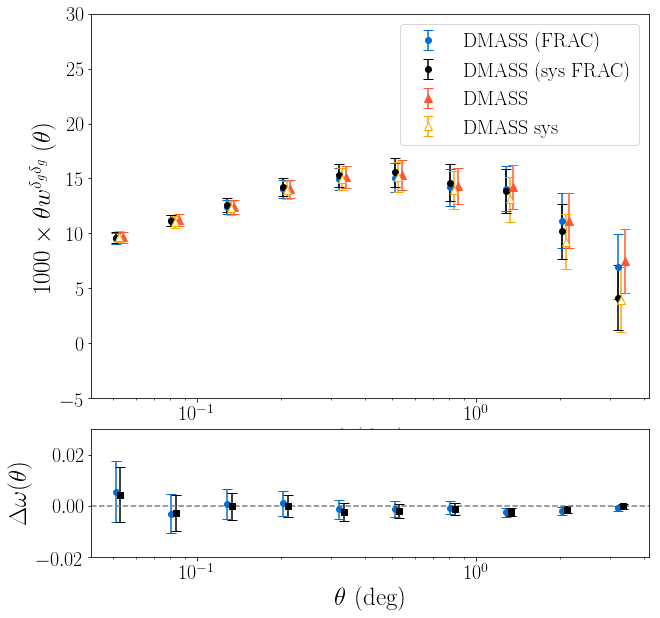

In [59]:
fig, (ax, ax2) = plt.subplots(2, 1, figsize = (10, 10), gridspec_kw = {'height_ratios':[3, 1]})


#ax.errorbar(meanr, xi, yerr = xi_err, fmt = '-', color='b', label='dmass no weight')
#ax.errorbar(meanr2, xi2, yerr = xi_err2, fmt = '-', color='b', label='dmass vetoed')
#ax.errorbar(meanr_ngc, xi_ngc, yerr = xi_err_ngc, fmt = '.', color='b', label=r'${\rm CMASS~(NGC)}$')


ax.errorbar(meanr_frac*0.97, 1000*meanr_frac*xi_frac, yerr = 1000*meanr_frac*xi_err_dmass, fmt = 'o', capsize=5, color=cmass_sgc_color, label=r'${\rm DMASS~(FRAC)}$')

ax.errorbar(meanr_sys_frac*0.97, 1000*meanr_sys_frac*xi_sys_frac, yerr = 1000*meanr_sys_frac*xi_err_dmass, fmt = 'o', capsize=5, color=cmass_full_color, label=r'${\rm DMASS~(sys~FRAC)}$')

#ax.errorbar(meanr_full, 1000*meanr_sgc*xi_full, yerr = 1000*meanr_sgc*xi_err_full, fmt = 's', capsize=5, color=cmass_full_color, label=r'${\rm CMASS~(FULL)}$')
ax.errorbar(meanr_dmass_NOWEIGHT*1.03, 1000*meanr_dmass_NOWEIGHT*xi_dmass_NOWEIGHT,\
            yerr = 1000*meanr_dmass_NOWEIGHT*xi_err_dmass_NOWEIGHT, fmt = '^',\
            capsize=5, markersize=8, color=dmass_color, label=r'${\rm DMASS}$')
ax.errorbar(meanr_dmass*1.0, 1000*meanr_sgc*xi_dmass, yerr = 1000*meanr_sgc*xi_err_dmass, \
            fmt = '^', capsize=5, markersize=8, markerfacecolor='w', color='orange', label=r'${\rm DMASS~sys}$')





#theta_th, theory = np.loadtxt('../data_txt/acf_cmass_ngc_theory.txt', unpack=True)
#theta_th, theory_sgc = np.loadtxt('../data_txt/acf_cmass_sgc_theory.txt', unpack=True)
#ax.plot(theta_th, 1000*theta_th*theory, color='grey' )
#ax.plot(theta_th, 1000*theta_th*theory_sgc, color='grey' )

#ax.plot(meanr_sgc, xi_sgc, '-', color=cmass_sgc_color, lw=0.5)
#ax.plot(meanr_full, xi_full, '-', color=cmass_full_color, lw=0.5)
#ax.plot(meanr_dmass, xi_dmass, '-', color=dmass_color, lw=0.5)

#ax.errorbar(meanr4*0.95, xi4, yerr = xi_err4, fmt = '.', color='b', label='dmass no weight')
ax.set_ylim(-5, 30)
ax.set_xscale('log')
ax.set_yscale('linear')
ax.legend(loc = 'best', fontsize = 20)

#ax.text(0.05, 0.0015, chisqr_label, fontsize = 15)
#ax.text(0.06, 2.5, r'$\chi^2/$ $\rm dof ~(DMASS-CMASS~SGC) $ $= {:0.2f}/{}$'.format(chisqr_NOWEIGHT, meanr_sgc.size), fontsize = 20)
#ax.text(0.06, 0, r'$\chi^2/$ $\rm dof ~(DMASS-CMASS~FULL) $ $= {:0.2f}/{}$'.format(chisqr_df_NOWEIGHT, meanr_full.size), fontsize = 20)
#ax.text(0.05, 0.0005, r'$\chi^2/$ $\rm dof ~(SGC-NGC)   $ $= {:0.2f}/{}$'.format(chisqr_sn, meanr_sgc.size), fontsize = 15)
#ax.set_ylim(8e-4,)
ax.set_xlim(2.5/60, 250./60)
ax.set_xlabel(r'$\theta$ ${\rm (deg)}$', fontsize = 25)
ax.set_ylabel(r'$1000 \times \theta w^{ \delta_{g} \delta_{g}} ~(\theta)$', fontsize = 25)
#ax.set_ylabel(r'$\omega(\theta)$', fontsize = 25)
ax.tick_params(labelsize=20)

ax2.errorbar(meanr_dmass*0.97, xi_sgc-xi_frac, yerr = np.sqrt(xi_err_sgc**2 + xi_err_dmass_NOWEIGHT**2), capsize=5,fmt='o', color = cmass_sgc_color )
#ax2.errorbar(meanr3*1.05, xi_ngc-xi3, yerr = np.sqrt(xi_err_ngc**2 + xi_err3**2), fmt='.', color = 'b' )
ax2.errorbar(meanr_full*1.01, xi_sgc-xi_sys_frac, yerr = np.sqrt(xi_err_full**2 + xi_err_dmass_NOWEIGHT**2), capsize=5,fmt='s', color = cmass_full_color )
#ax2.errorbar(meanr_dmass*1.05, xi_dmass-xi_dmass_NOWEIGHT, yerr = np.sqrt(xi_err_dmass**2 + xi_err_dmass_NOWEIGHT**2), capsize=5,fmt='^', color = 'orange' )


ax2.axhline(y = 0, ls = '--', color='grey')
ax2.set_xscale('log')
ax2.set_xlim(2.5/60, 250./60)
ax2.set_ylim(-0.02, 0.03)
ax2.set_ylabel(r'$\Delta \omega (\theta) $', fontsize = 25)
ax2.set_xlabel(r'$\theta$ ${\rm (deg)}$', fontsize = 25)
ax2.tick_params(labelsize=20)


fig.subplots_adjust(hspace=0.12);

#fig.savefig('../paper_figure/acf_comparison_cmass_dmass_v7.pdf')

# Systematic tests with angular clustering

In [77]:
suf = 'wg_fwhm_r_airmass_z_exptime_g_fwhm_i_airmass_g_fwhm_g'

orderlabel = suf.split('_')[1:]
order = []
for i in np.arange(0, len(orderlabel), 2):
    order.append( orderlabel[i]+'_'+orderlabel[i+1] )
order = ['vetoed'] + order
print order

['vetoed', 'fwhm_r', 'airmass_z', 'exptime_g', 'fwhm_i', 'airmass_g', 'fwhm_g']


In [78]:
# callig cosmosis theory line

sis_dir = '/n/des/lee.5922/programs/cosmolike/cosmosis/output/'
xi_sgc_sis = np.genfromtxt(sis_dir + 'datav_cmass_sgc_theory/galaxy_xi_dmass/bin_1_1.txt')
xi_ngc_sis = np.genfromtxt(sis_dir + 'datav_cmass_ngc_theory/galaxy_xi_dmass/bin_1_1.txt')
xi_full_sis = np.genfromtxt(sis_dir + 'datav_cmass_full_theory/galaxy_xi_dmass/bin_1_1.txt')
theta_sis = np.genfromtxt(sis_dir + 'datav_cmass_sgc_theory/galaxy_xi_dmass/theta.txt')
theta_sis = theta_sis * 180/np.pi

sis_sgc_interp = scipy.interpolate.interp1d(theta_sis, xi_sgc_sis)
#sis_sgc_interp = sis_sgc_interp(meanr_sgc)

sis_full_interp = scipy.interpolate.interp1d(theta_sis, xi_full_sis)
#sis_full_interp = sis_full_interp(meanr_sgc)

sis_ngc_interp = scipy.interpolate.interp1d(theta_sis, xi_ngc_sis)
#sis_ngc_interp = sis_ngc_interp(meanr_sgc)

In [79]:
from systematics import brel_chisqr_fitting
import scipy


#theta_th, theory = np.loadtxt('../data_txt/acf_cmass_ngc_theory.txt', unpack=True)
#theta_th, theory_sgc = np.loadtxt('../data_txt/acf_cmass_sgc_theory.txt', unpack=True)
#theory_sgc_interp = scipy.interpolate.interp1d(theta_th, theory_sgc)
#theory_sgc_interp = theory_sgc_interp(meanr)

brelsqr = np.linspace(0.5, 1.5, 5000) 
b_n = 2.0
brelarr = np.sqrt(brelsqr)
dbarray = b_n*(1-brelarr)


labels_SP = ['no weight', 'veto'] + ['+ '+o for o in order] #[1:] ]
#labels_SP = ['no weight'] + ['+ '+o for o in order]#[1:] ]


filenames = [ basedir+ 'acf_auto_poisson_DMASS_pcut_NOWEIGHT_10bins.npairs' \
              ,basedir + 'acf_auto_poisson_DMASS_pcut_VETO_10bins.npairs'
            ] \
+[ basedir+'acf_auto_poisson_DMASS_pcut_WEIGHT'+str(j)+'_10bins.npairs' for j in range(0, len(labels_SP)-2)]

#covnames = [ basedir+ 'acf_auto_dmass_no_weight_pcut01_nbins10_jk100.cov' \
#              ,basedir + 'acf_auto_dmass_veto_pcut01_nbins10_jk100.cov'
#           ] \
#+[ basedir+'acf_auto_dmass_weight'+str(j)+'_pcut01_nbins10_jk100.cov' for j in range(0, len(labels_SP)-2)]

F_d = np.linalg.inv(cov_rescaled_mocks)
#F_d_an = np.linalg.inv(cov_an_dmass_NG)
F_ds = np.linalg.inv(cov_rescaled_mocks + cov_mocks)
#F_ds_an = np.linalg.inv(cov_an_dmass_NG + cov_an_cmass_NG)
    

chisquare_list = []
chisquare_list_anlytic = []
chisquare_data_data_list = []
chisquare_data_data_an_list = []

delta_chi_list = []
delta_chi_list_analytic = []
for j in range(1, len(labels_SP)-1):
#for j in [1,7]:
    
    print filenames[j-1]
    #meanrw, xiw, xi_errw = np.loadtxt( filenames[j-1], unpack=True)
    _, meanrw, _, xiw, xi_errw, _, _, _,npairs = np.loadtxt( filenames[j-1], unpack=True)
    #cov_dmass_w = np.loadtxt( covnames[j-1], unpack=True)
    #cov_dmass_w = np.loadtxt( covnames[0], unpack=True)
    #meanrw, xiw, xi_errw = np.loadtxt(basedir+'acf_auto_dmass_weight'+str(j)+'_nbins10_jk100.txt', unpack=True)
    #cov_dmass_w = np.loadtxt(basedir+'acf_auto_dmass_weight'+str(j)+'_nbins10_jk100.cov', unpack=True)
    #HFd = HF(100, 10)
    #F_d = HFd * np.linalg.inv(cov_dmass_w)
    #F_s = np.linalg.inv(cov_cmass_s)
    err_brelw, brelw, chisqr_resultw = brel_chisqr_fitting(xiw, sis_sgc_interp(meanrw), F_d, verbose=True)
    #err_brelw, brelw, chisqr_resultw = brel_chisqr_fitting(xiw, xi_sgc, F_s, verbose=True)
    
    chi2 = chisquare(xiw, sis_sgc_interp(meanrw), cov_rescaled_mocks)
    chisquare_list.append( chi2 )
    
    #chi2_an = chisquare_calculation(xiw, sis_sgc_interp(meanrw), F_d_an)
    #chisquare_list_anlytic.append( chi2_an/xiw.size )
    
    #chi2 = chisquare_calculation(xiw, xi_sgc, F_ds)
    chi2 = chisquare(xi_sgc, xiw, cov_mocks + cov_rescaled_mocks)
    chisquare_data_data_list.append( chi2 )
    print chi2
    

    #chi2 = chisquare(xi_sgc, xiw, cov_an_dmass_NG + cov_an_cmass_NG)
    #chi2 = chisquare_calculation(xiw, xi_sgc, F_ds_an)
    #chisquare_data_data_an_list.append( chi2 )
    
    if j < len(labels_SP) : 
        #meanrw2, xiw2, xi_errw2 = np.loadtxt( filenames[j], unpack=True)
        _, meanrw2, _, xiw2, xi_errw2, _, _, _,npairs = np.loadtxt( filenames[j], unpack=True)
        deltaw = xiw2-xiw
        delta_chi = np.dot(deltaw, np.dot( F_d/2., deltaw.T ))
        delta_chi_list.append(delta_chi)
        
        #delta_chi_an = np.dot(deltaw, np.dot( F_d_an/2., deltaw.T ))
        #delta_chi_list_analytic.append(delta_chi_an)
    

labels = labels_SP[::-1]


../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//act/acf_auto_poisson_DMASS_pcut_NOWEIGHT_10bins.npairs
err db, db / br1, brmin, br2 : 0.037561440147428904 -0.06079545814538134 0.9515571933512161 0.9704990333198354 0.989118633498645
4.8635759656519095
../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//act/acf_auto_poisson_DMASS_pcut_VETO_10bins.npairs
err db, db / br1, brmin, br2 : 0.03754388947031517 -0.059745816927129436 0.9520195734614131 0.9709935971535254 0.9895634629317283
5.056815233033394
../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//act/acf_auto_poisson_DMASS_pcut_WEIGHT0_10bins.npairs
err db, db / br1, brmin, br2 : 0.03736294088348879 -0.07031500878897834 0.9471744442739031 0.966036565213277 0.9845373851573919
5.779673283541165
../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//act/acf_auto_poisson_DMASS_pcut_WEIGHT1_10bins.npairs
err db, db / br1, brmin, br2 : 0.037435314201702874 -0.0606204065028364 0.9516833192969422 0.970

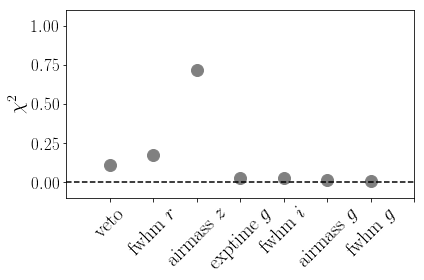

In [81]:
fig, ax = plt.subplots()

delta_chisquare_list = np.array(chisquare_list[:-1]) - np.array(chisquare_list[1:]) 
#delta_chisquare_list_an = np.array(chisquare_list_anlytic[:-1]) - np.array(chisquare_list_anlytic[1:]) 
#ax.plot( np.arange(9), delta_chisquare_list, label='mock' )
#ax.plot( np.arange(9), delta_chisquare_list_an, label='analytic' )
ax.plot( np.arange(len(delta_chi_list)), delta_chi_list, 'o' , markersize = 12, color = 'grey')
#ax.plot( np.arange(len(delta_chi_list)), delta_chi_list_analytic, '^', markersize = 12, label='analytic' )
ax.legend()

#ax.set_xlabel(r'$\Delta b = b_{fid} - b_x$', fontsize = 20)
ax.set_ylabel(r'$\chi^2$', fontsize = 20)
ax.axhline(y=0, color='k', ls='--')
#ax.set_ylabel(r'$\chi^2$')
#ax.legend(loc=1)
ax.set_ylim(-0.1, 1.1)
ax.set_xlim(-1,)
#ax.set_yticks([1,2,3,4,5,6,7,8,9,10,11,12])
ax.set_xticks(np.arange(0, len(labels_SP)-1 ))
ax.tick_params(labelsize=17)

#labels = [ labels_SP[i+1].split('+')[-1] + ' - ' + labels_SP[i].split('+')[-1] for i in range(len(labels_SP)-1) ]
#labels = [ labels_SP[i+1].split('+')[-1] for i in range(len(labels_SP)-1) ]

labels = [#r'{\rm veto}',
 r'{\rm veto}',
 r'{\rm fwhm} $r$',
 r'{\rm airmass} $z$',
 r'{\rm exptime} $g$',
 r'{\rm fwhm} $i$' ,
 r'{\rm airmass} $g$',
 r'{\rm fwhm} $g$']

ax.set_xticklabels( labels, fontsize = 20, rotation=45) 
#ax.set_xlabel(r'{\rm X - (previous weight)}', fontsize = 20)
fig.tight_layout()
fig.savefig('../paper_figure/deltachisqr_systematics_v4.pdf')

# WISE CROSS

3.56684014349749 1.8198286059277182


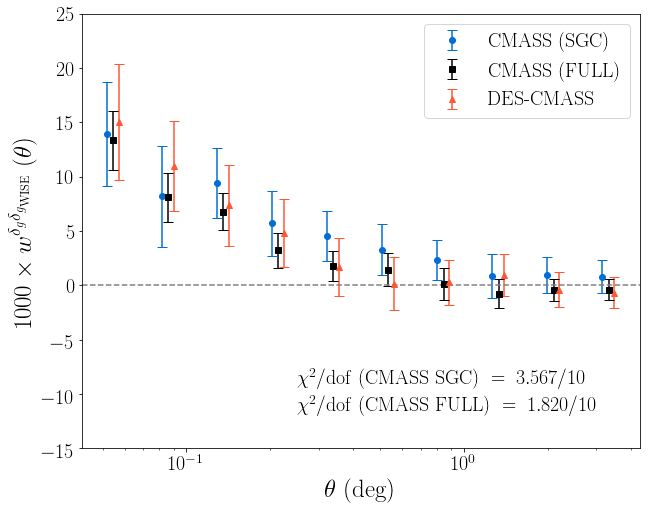

In [130]:
basedir = '../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//act/'

DAT = np.loadtxt(basedir+'acf_cross_wise_x_dmass_weight_nbins10_jk100.txt')
meanr, xi, xi_err = [DAT[:,i] for i in range(3)]

DAT = np.loadtxt(basedir+'acf_cross_wise_x_dmass_weight_pcut01_nbins10_jk100_no2.txt')
meanr2, xi2, _ = [DAT[:,i] for i in range(3)]
cov_dmass = np.loadtxt(basedir+'acf_cross_wise_x_dmass_weight_pcut01_nbins10_jk100_no2.cov')*1./HFactor
xi_err2 = np.sqrt(cov_dmass.diagonal())

DAT = np.loadtxt(basedir +'acf_cross_wise_x_cmass_full_sys_cp_nz_weight_nbins10_jk100_no2.txt')
meanr3, xi3, _ = [DAT[:,i] for i in range(3)]
cov_cmass_full = np.loadtxt(basedir +'acf_cross_wise_x_cmass_full_sys_cp_nz_weight_nbins10_jk100_no2.cov')*1./HFactor
xi_err3 = np.sqrt(cov_cmass_full.diagonal())

#../data_txt/acf_cross_wise_x_cmass_sgc_no4.txt
DAT = np.loadtxt(basedir+'acf_cross_wise_x_cmass_sgc_sys_cp_nz_weight_nbins10_jk100_no2.txt')
cov_cmass = np.loadtxt(basedir +'acf_cross_wise_x_cmass_sgc_sys_cp_nz_weight_nbins10_jk100_no2.cov')*1./HFactor
meanr4, xi4, _ = [DAT[:,i] for i in range(3)]
xi_err4 = np.sqrt(cov_cmass.diagonal())

#cov_cmass_sgc = np.loadtxt('../data_txt/acf_cross_wise_x_cmass_sgc_no4.cov')

#DAT2 = np.loadtxt('data_txt/acf_cross_wise_x_cmass_sgc.txt')
#meanr4, xi4, xi_err4 = [DAT2[:,i] for i in range(3)]

fig, ax = plt.subplots(figsize = (10, 8))
#ax.errorbar(meanr*0.95, xi, yerr = xi_err, fmt = '-b', label='WISE x dmass')

#ax.errorbar(meanr*1.05, xi, yerr = xi_err, fmt = '.r', label='dmass spt low')
ax.errorbar(meanr4*0.95, 1000*xi4, yerr = 1000*xi_err4, fmt = 'o', color = cmass_sgc_color, capsize = 5, label=r'{\rm CMASS (SGC)}')
ax.errorbar(meanr3*1.0, 1000*xi3, yerr = 1000*xi_err3, fmt = 's', color = cmass_full_color, capsize = 5, label=r'{\rm CMASS (FULL)}')
ax.errorbar(meanr2*1.05, 1000*xi2, yerr = 1000*xi_err2, fmt = '^', color = dmass_color, capsize = 5, label=r'{\rm DES-CMASS}')
#ax.errorbar(meanr4*1.05, xi4, yerr = xi_err4, fmt = '.k', label='WISE x cmass(sgc)')


#ax.errorbar(meanr3*0.95, xi3, yerr = xi_err3, fmt = '.b', label='dmass spt rand')
#chisqr = np.sum( (xi4-xi3)**2/xi_err3**2 )*1./xi3.size

chisqr2 = np.dot(np.dot(xi2-xi4, np.linalg.inv(cov_dmass + cov_cmass)), xi2-xi4)# *1./xi2.size # np.sum( (xi-0.0)**2/xi_err**2 )*1./xi.size
chisqr3 = np.dot(np.dot(xi2-xi3, np.linalg.inv(cov_dmass + cov_cmass_full)), xi2-xi3)# *1./xi3.size
print chisqr2, chisqr3

ax.text(0.25, -9, r'$\chi^2/{\rm dof}~(\rm CMASS~SGC)$'+r'$~=~{:0.3f}/10$'.format(chisqr2), fontsize = 20)
ax.text(0.25, -11.5, r'$\chi^2/{\rm dof}~(\rm CMASS~FULL)$'+r'$~=~{:0.3f}/10$'.format(chisqr3), fontsize = 20)
ax.set_xscale('log')
ax.set_yscale('linear')
ax.legend(loc = 'best', fontsize = 20)
#ax.text(1.5, 0.07, r'$\chi^2$ = {:0.3f}'.format(chisqr), fontsize = 12)
ax.set_ylim(-15, 25)
ax.set_xlabel(r'$\theta$ {\rm (deg)}', fontsize = 25)
ax.set_ylabel(r'$1000 \times w^{ \delta_{g} \delta_{g_{\rm _{WISE}}}} ~(\theta)$', fontsize = 25)
ax.axhline(y = 0.0, color = 'grey', linestyle = '--')
ax.tick_params(labelsize=20)
#fig.savefig('../paper_figure//acf_wise.pdf' )


In [131]:
basedir = '../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//act/'
_, rmean_sgc, _, xi_sgc, sigma_xi_sgc, DD_sgc,RR_sgc,DR_sgc,RD_sgc,_ = \
np.genfromtxt(basedir+'npairs_cross_wise_x_cmass_sgc_nbins10_binslop05.txt',unpack=True)
_, rmean_ngc, _, xi_ngc, sigma_xi_ngc, DD_ngc,RR_ngc,DR_ngc,RD_ngc,_ = \
np.genfromtxt(basedir+'npairs_cross_wise_x_cmass_ngc_nbins10_binslop05.txt',unpack=True)

DD_full = DD_sgc + DD_ngc
RR_full = RR_sgc + RR_ngc
DR_full = DR_sgc + DR_ngc
RD_full = RD_sgc + RD_ngc

xi_full = (DD_full - DR_full - RD_full + RR_full )*1./RR_full

_, rmean_dmass, _, xi_dmass, sigma_xi_dmass, DD_dmass,_,_,_,_ = \
np.genfromtxt(basedir+'npairs_cross_wise_x_dmass_nbins10_binslop05.txt',unpack=True)

_, rmean_dmass_NW, _, xi_dmass_NW, sigma_xi_dmass_NW, DD_dmass,_,_,_,_ = \
np.genfromtxt(basedir+'npairs_cross_wise_x_dmass_NOWEIGHT_nbins10_binslop05.txt',unpack=True)

In [132]:
cov_cmass_sgc_analytic_filename = '/n/des/lee.5922/programs/cosmolike/lighthouse_cov/output_cross_wise/\
cov_cross_wise_cmass_sgc_10bins_NG_llll_cov_Ntheta10_Ntomo1_1'
cov_cmass_ngc_analytic_filename = '/n/des/lee.5922/programs/cosmolike/lighthouse_cov/output_cross_wise/\
cov_cross_wise_cmass_ngc_10bins_NG_llll_cov_Ntheta10_Ntomo1_1'
cov_dmass_analytic_filename = '/n/des/lee.5922/programs/cosmolike/lighthouse_cov/output_cross_wise/\
cov_cross_wise_dmass_10bins_NG_llll_cov_Ntheta10_Ntomo1_1'

In [135]:
from su_utils import read_cov
cov_cmass_sgc_analytic = read_cov( covfilename = cov_cmass_sgc_analytic_filename, NG=True)[-10:, -10:]
cov_cmass_ngc_analytic = read_cov( covfilename = cov_cmass_ngc_analytic_filename, NG=True)[-10:, -10:]
F_sgc = np.linalg.inv(cov_cmass_sgc_analytic)
F_ngc = np.linalg.inv(cov_cmass_ngc_analytic)
cov_cmass_full_analytic = np.linalg.inv( F_sgc + F_ngc  )
cov_dmass_analytic = read_cov( covfilename = cov_dmass_analytic_filename, NG=True)[-10:, -10:]

xi_err_dmass = np.sqrt(cov_dmass_analytic.diagonal())
xi_err_sgc = np.sqrt(cov_cmass_sgc_analytic.diagonal())
xi_err_ngc = np.sqrt(cov_cmass_ngc_analytic.diagonal())
xi_err_full = np.sqrt(cov_cmass_full_analytic.diagonal())


chisqr_DS = np.dot(np.dot(xi_sgc-xi_dmass_NW, np.linalg.inv(cov_dmass_analytic + cov_cmass_sgc_analytic)), xi_sgc-xi_dmass_NW)# *1./xi2.size # np.sum( (xi-0.0)**2/xi_err**2 )*1./xi.size
chisqr_DF = np.dot(np.dot(xi_full-xi_dmass_NW, np.linalg.inv(cov_dmass_analytic + cov_cmass_full_analytic)), xi_full-xi_dmass_NW)# *1./xi3.size
chisqr_NS = np.dot(np.dot(xi_sgc-xi_ngc, np.linalg.inv(cov_cmass_sgc_analytic + cov_cmass_ngc_analytic)), xi_sgc-xi_ngc)# *1./xi3.size


chisqr_DS_sys = np.dot(np.dot(xi_sgc-xi_dmass, np.linalg.inv(cov_dmass_analytic + cov_cmass_sgc_analytic)), xi_sgc-xi_dmass)# *1./xi2.size # np.sum( (xi-0.0)**2/xi_err**2 )*1./xi.size
chisqr_DF_sys = np.dot(np.dot(xi_full-xi_dmass, np.linalg.inv(cov_dmass_analytic + cov_cmass_full_analytic)), xi_full-xi_dmass)# *1./xi3.size


print 'no sys: ', chisqr_DS, chisqr_DF, chisqr_NS
print 'sys:', chisqr_DS_sys, chisqr_DF_sys,

no sys:  9.038313910627924 12.124081308610453 11.758521268520807
sys: 9.695053417892327 11.41815062438882


In [114]:
basedir = '../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//act/'
covmocks_dmass = np.loadtxt(basedir+'acf_cross_wise_x_dmass_weight_pcut01_nbins10_jk100_no2.cov') #*1./HFactor
covmocks_cmass_ngc = np.loadtxt(basedir +'acf_cross_wise_x_cmass_ngc_nbins10_binslop05_jk100.cov') #*1./HFactor
#xi_err3 = np.sqrt(cov_cmass_ngc.diagonal())
covmocks_cmass_sgc = np.genfromtxt(basedir+'acf_cross_wise_x_cmass_sgc_nbins10_binslop05_jk100.cov')
F_full = np.linalg.inv(covmocks_cmass_ngc) + np.linalg.inv(covmocks_cmass_sgc)
covmocks_cmass_full = np.linalg.inv(F_full)


chisqr_DS = np.dot(np.dot(xi_sgc-xi_dmass_NW, np.linalg.inv(covmocks_dmass + covmocks_cmass_sgc)), xi_sgc-xi_dmass_NW)# *1./xi2.size # np.sum( (xi-0.0)**2/xi_err**2 )*1./xi.size
chisqr_DF = np.dot(np.dot(xi_full-xi_dmass_NW, np.linalg.inv(covmocks_dmass + covmocks_cmass_full)), xi_full-xi_dmass_NW)# *1./xi3.size
print 'mock chisquare DS = ', chisqr_DS
print 'mock chisquare DF = ', chisqr_DF

mock chisquare DS =  3.744762950552523
mock chisquare DF =  6.888346358551254


In [115]:
theta_th, theory_wise_cmass_sgc = np.genfromtxt('/n/des/lee.5922/programs/cosmolike/cosmosis/dmass_cat/wise/theory_wise_cmass_sgc.txt', unpack=True)
theta_th, theory_wise_cmass_full = np.genfromtxt('/n/des/lee.5922/programs/cosmolike/cosmosis/dmass_cat/wise/theory_wise_cmass_full.txt', unpack=True)

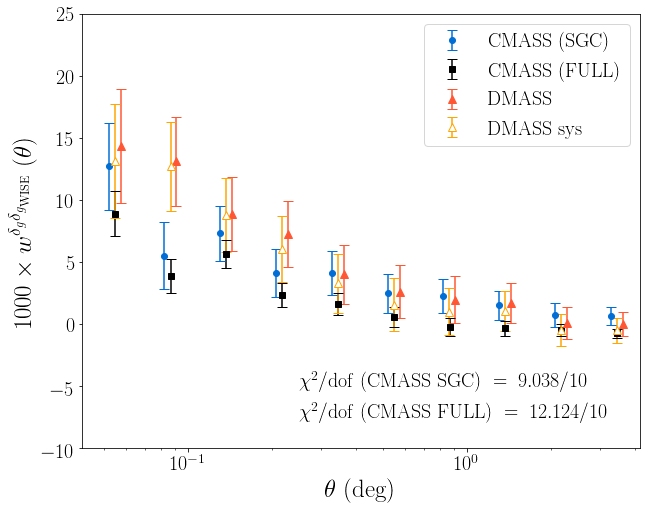

In [136]:

fig, ax = plt.subplots(figsize = (10, 8))
#ax.errorbar(meanr*0.95, xi, yerr = xi_err, fmt = '-b', label='WISE x dmass')

#ax.errorbar(meanr*1.05, xi, yerr = xi_err, fmt = '.r', label='dmass spt low')
ax.errorbar(rmean_sgc*0.95, 1000*xi_sgc, yerr = 1000*xi_err_sgc, fmt = 'o', color = cmass_sgc_color, capsize = 5, label=r'{\rm CMASS (SGC)}')
ax.errorbar(rmean_sgc*1.0, 1000*xi_full, yerr = 1000*xi_err_full, fmt = 's', color = cmass_full_color, capsize = 5, label=r'{\rm CMASS (FULL)}')

ax.errorbar(rmean_dmass_NW*1.05, 1000*xi_dmass_NW, yerr = 1000*xi_err_dmass, fmt = '^', color = dmass_color, markersize=8, capsize = 5, label=r'{\rm DMASS}')
ax.errorbar(rmean_dmass*1.0, 1000*xi_dmass, yerr = 1000*xi_err_dmass, fmt = '^', color = 'orange', markerfacecolor='w', markersize=8, capsize = 5, label=r'{\rm DMASS sys}')


#ax.errorbar(meanr4*1.05, xi4, yerr = xi_err4, fmt = '.k', label='WISE x cmass(sgc)')

#ax.plot(theta_th, 1000*theory_wise_cmass_full, color='grey')

#ax.errorbar(meanr3*0.95, xi3, yerr = xi_err3, fmt = '.b', label='dmass spt rand')
#chisqr = np.sum( (xi4-xi3)**2/xi_err3**2 )*1./xi3.size



ax.text(0.25, -5, r'$\chi^2/{\rm dof}~(\rm CMASS~SGC)$'+r'$~=~{:0.3f}/10$'.format(chisqr_DS), fontsize = 20)
ax.text(0.25, -7.5, r'$\chi^2/{\rm dof}~(\rm CMASS~FULL)$'+r'$~=~{:0.3f}/10$'.format(chisqr_DF), fontsize = 20)
ax.set_xscale('log')
ax.set_yscale('linear')
ax.legend(loc = 'best', fontsize = 20)
#ax.text(1.5, 0.07, r'$\chi^2$ = {:0.3f}'.format(chisqr), fontsize = 12)
ax.set_ylim(-10, 25)
ax.set_xlim(2.5/60, 250/60.)
ax.set_xlabel(r'$\theta$ {\rm (deg)}', fontsize = 25)
ax.set_ylabel(r'$1000 \times w^{ \delta_{g} \delta_{g_{\rm _{WISE}}}} ~(\theta)$', fontsize = 25)
#ax.axhline(y = 0.0, color = 'grey', linestyle = '--')
ax.tick_params(labelsize=20)
fig.savefig('../paper_figure//acf_wise_sys_theory_v2.pdf' )

# CMB Lensing

In [137]:
def chisquare_cmblensing(dv1, dv2, cov, rcond=1e-10):
    diff = dv1 - dv2
    F = np.linalg.pinv(cov, rcond=rcond)
    chi = np.dot( diff, np.dot( F, diff))
    print chi
    return chi

In [138]:
def loadfits_twopoint(fitsname, covmat_name="COVMAT"):
    
    import twopoint
    f = twopoint.TwoPointFile.from_fits(fitsname, covmat_name=covmat_name)
    
    xip = f.get_spectrum('xip').value
    xim = f.get_spectrum('xim').value
    gammat = f.get_spectrum('gammat').value
    wtheta = f.get_spectrum('wtheta').value
    galaxy_cmbkappa_xi = f.get_spectrum('galaxy_cmbkappa_xi').value
    shear_cmbkappa_xi = f.get_spectrum('shear_cmbkappa_xi').value

    angle = f.get_spectrum('galaxy_cmbkappa_xi').angle
    
    if covmat_name is None : 
        return [angle, galaxy_cmbkappa_xi]
    else : 
        covmat = f.covmat
        starts = f.covmat_info.starts
        covmat_galaxy_cmbkappa_xi = covmat[starts[4]:starts[5], starts[4]:starts[5]]
        return [angle, galaxy_cmbkappa_xi, covmat_galaxy_cmbkappa_xi]        

In [37]:
cmblensing_dir = '../output/cmblensing/'

In [38]:
HFactor158 = 1.0 #HF(158,10)

In [139]:
fitsname = '/n/des/lee.5922/programs/cosmolike/cosmosis/output_cmblensing_cmass/cmblensing_cmass_sgc_lrange8_2048_fwhm1p71.fits'
angle, xi_gk_sgc, cov_gk_sgc_analytic = loadfits_twopoint(fitsname)
err_gk_sgc = np.sqrt(cov_gk_sgc_analytic.diagonal())

fitsname = '/n/des/lee.5922/programs/cosmolike/cosmosis/output_cmblensing_cmass/cmblensing_cmass_ngc_lrange8_2048_fwhm1p71.fits'
angle, xi_gk_ngc, cov_gk_ngc_analytic = loadfits_twopoint(fitsname)
err_gk_ngc = np.sqrt(cov_gk_ngc_analytic.diagonal())

F_gk_sgc = np.linalg.pinv(cov_gk_sgc_analytic, rcond=1e-5)
F_gk_ngc = np.linalg.pinv(cov_gk_ngc_analytic, rcond=1e-5)
cov_gk_full_analytic = np.linalg.pinv( F_gk_sgc + F_gk_ngc , rcond=1e-5 )
err_gk_full = np.sqrt(cov_gk_full_analytic.diagonal())

fitsname = '/n/des/lee.5922/programs/cosmolike/cosmosis/output_cmblensing_cmass/cmblensing_dmass_lrange8_2048_fwhm1p71.fits'
angle, xi_gk_dmass, cov_gk_dmass_analytic = loadfits_twopoint(fitsname)
err_gk_dmass = np.sqrt(cov_gk_dmass_analytic.diagonal())

In [140]:
cmblensing_dir = '../output/cmblensing/'
HFactor158 = 1.0

#rmin_cmb_dmass, kappa_cmb_dmass = np.genfromtxt(cmblensing_dir + 'w_dmass_x_cmblensing_systot.txt', unpack=True)
#cov_cmb_dmass = np.genfromtxt(cmblensing_dir + 'w_dmass_x_cmblensing_systot.cov') * 1./HFactor158
#err_cmb_dmass = np.sqrt( cov_cmb_dmass.diagonal() )

rmin_cmb_sgc, kappa_cmb_sgc = np.genfromtxt(cmblensing_dir + 'w_cmass_south_x_cmblensing.txt', unpack=True)
cov_cmb_sgc = np.genfromtxt(cmblensing_dir + 'w_cmass_south_x_cmblensing.cov')* 1./HFactor158
err_cmb_sgc = np.sqrt( cov_cmb_sgc.diagonal() )

rmin_cmb_ngc, kappa_cmb_ngc = np.genfromtxt(cmblensing_dir + 'w_cmass_north_x_cmblensing.txt', unpack=True)
cov_cmb_ngc = np.genfromtxt(cmblensing_dir + 'w_cmass_north_x_cmblensing.cov')* 1./HFactor158
err_cmb_ngc = np.sqrt( cov_cmb_ngc.diagonal() )

rmin_cmb_full, kappa_cmb_full, err_cmb_full = np.genfromtxt(cmblensing_dir + 'w_cmass_tot_x_cmblensing.txt', unpack=True)
cov_cmb_full = np.linalg.inv(np.linalg.inv(cov_cmb_sgc)+np.linalg.inv(cov_cmb_ngc))* 1./HFactor158
err_cmb_full = err_cmb_full * 1./np.sqrt(HFactor158)

#rmin_cmb_th, kappa_cmb_theory = np.genfromtxt(cmblensing_dir+'theory_cmass_tot_cmblensing_b2.txt', unpack=True)
rmin_cmb_th, kappa_cmb_theory = np.genfromtxt(cmblensing_dir+'re/cmassnorth_cmbkappa_galbias1p75.asc', unpack=True)
kappa_cmb_theory_interp = scipy.interpolate.interp1d(rmin_cmb_th, kappa_cmb_theory)
kappa_cmb_theory_interp = kappa_cmb_theory_interp(rmin_cmb_dmass)

rmin_cmb_dmass, kappa_cmb_dmass = np.genfromtxt(cmblensing_dir + 're/out_DMASS_nosysweight_mean.out', unpack=True)
cov_cmb_dmass = np.genfromtxt(cmblensing_dir + 're/out_DMASS_nosysweight.cov') * 1./HFactor158
err_cmb_dmass = np.sqrt( cov_cmb_dmass_re.diagonal() )

rmin_cmb_dmass_sys, kappa_cmb_dmass_sys = np.genfromtxt(cmblensing_dir + 're/out_DMASS_withsysweight_mean.out', unpack=True)
cov_cmb_dmass_sys = np.genfromtxt(cmblensing_dir + 're/out_DMASS_withsysweight.cov') * 1./HFactor158
err_cmb_dmass_sys = np.sqrt( cov_cmb_dmass_re_sys.diagonal() )

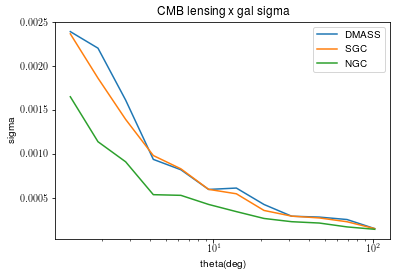

In [140]:
fig, ax = plt.subplots()
ax.plot(rmin_cmb_dmass, err_cmb_dmass, label='DMASS')
ax.plot(rmin_cmb_dmass, err_cmb_sgc, label='SGC')
ax.plot(rmin_cmb_dmass, err_cmb_ngc, label='NGC')

ax.set_xscale('log')
ax.set_title('CMB lensing x gal sigma')
ax.set_xlabel('theta(deg)')
ax.set_ylabel('sigma')
ax.legend()

In [40]:
chi_d = np.dot(np.dot((kappa_cmb_dmass - kappa_cmb_theory_interp), np.linalg.inv(cov_cmb_dmass) ), (kappa_cmb_dmass - kappa_cmb_theory_interp))
chi_s = np.dot(np.dot((kappa_cmb_sgc - kappa_cmb_theory_interp), np.linalg.inv(cov_cmb_sgc) ), (kappa_cmb_sgc - kappa_cmb_theory_interp))
chi_f = np.dot(np.dot((kappa_cmb_theory_interp - kappa_cmb_full), np.linalg.inv(cov_cmb_full) ), (kappa_cmb_theory_interp - kappa_cmb_full))
print chi_d, chi_s, chi_f

6.419739633879377 22.818519305803374 19.24510485079962


In [153]:
cov_cmb_DS = cov_cmb_dmass + cov_cmb_sgc
cov_cmb_DF = cov_cmb_dmass + cov_cmb_full
cov_cmb_SN = cov_cmb_sgc + cov_cmb_ngc
F_cmb_DS = np.linalg.inv(cov_cmb_DS)
F_cmb_DF = np.linalg.inv(cov_cmb_DF)
F_cmb_SN = np.linalg.inv(cov_cmb_SN)

print 'jk cov:'
chi_ds_jk = chisquare_cmblensing(kappa_cmb_dmass, kappa_cmb_sgc, cov_cmb_DS )
chi_df_jk = chisquare_cmblensing(kappa_cmb_dmass, kappa_cmb_full, cov_cmb_DF )
chi_sn_jk = chisquare_cmblensing(kappa_cmb_sgc, kappa_cmb_ngc, cov_cmb_SN )

print '\nanalytic cov:'
chi_ds = chisquare_cmblensing(kappa_cmb_dmass, kappa_cmb_sgc, cov_gk_dmass_analytic + cov_gk_sgc_analytic, rcond=1e-5)
chi_dn = chisquare_cmblensing(kappa_cmb_dmass, kappa_cmb_ngc, cov_gk_dmass_analytic + cov_gk_ngc_analytic, rcond=1e-5)
chi_df = chisquare_cmblensing(kappa_cmb_dmass, kappa_cmb_full, cov_gk_dmass_analytic + cov_gk_full_analytic, rcond=1e-5)
chi_ns = chisquare_cmblensing(kappa_cmb_sgc, kappa_cmb_ngc, cov_gk_sgc_analytic + cov_gk_ngc_analytic, rcond=1e-5)



print '\nanalytic cov (sys):'
chi_ds_sys = chisquare_cmblensing(kappa_cmb_dmass_sys, kappa_cmb_sgc, cov_gk_dmass_analytic + cov_gk_sgc_analytic, rcond=1e-5)
chi_dn_sys = chisquare_cmblensing(kappa_cmb_dmass_sys, kappa_cmb_ngc, cov_gk_dmass_analytic + cov_gk_ngc_analytic, rcond=1e-5)
chi_df_sys = chisquare_cmblensing(kappa_cmb_dmass_sys, kappa_cmb_full, cov_gk_dmass_analytic + cov_gk_full_analytic, rcond=1e-5)
#chi_ns_sys = chisquare_cmblensing(kappa_cmb_dmass_sys, kappa_cmb_sgc, cov_gk_dmass_analytic + cov_gk_sgc_analytic, rcond=1e-5)






jk cov:
5.3448174327956215
7.342570054412878
9.50209757096185

analytic cov:
18.49685639650016
44.63152122255358
28.619836363728634
98.39115504371105

analytic cov (sys):
12.561062284315241
50.16509495821554
30.630612002011976


In [29]:
chi_fs

28.617344637374195

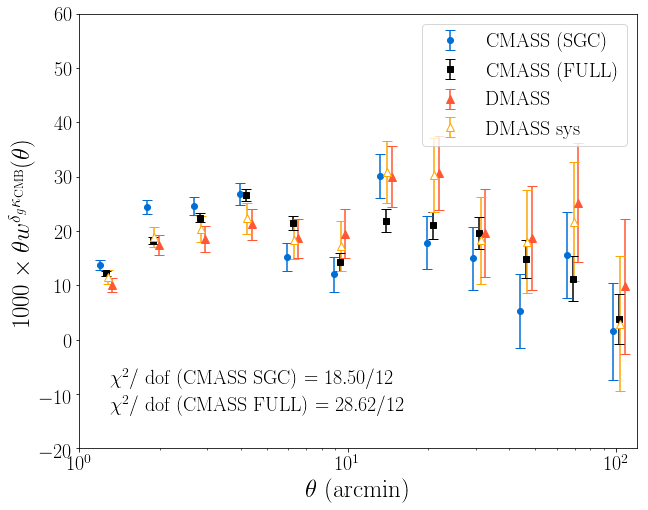

In [109]:
fig, ax = plt.subplots(figsize = (10,8))

ax.errorbar( rmin_cmb_sgc*0.95, 1000*rmin_cmb_sgc*kappa_cmb_sgc, yerr = 1000*rmin_cmb_sgc*err_gk_sgc, fmt='o',color = cmass_sgc_color,  capsize=5, label=r'{\rm CMASS (SGC)}' )
ax.errorbar( rmin_cmb_full*1., 1000*rmin_cmb_full*kappa_cmb_full, yerr = 1000*rmin_cmb_full*err_gk_full, fmt = 's', color = cmass_full_color, capsize=5, label=r'{\rm CMASS (FULL)}' )
ax.errorbar( rmin_cmb_dmass*1.05, 1000*rmin_cmb_dmass*kappa_cmb_dmass, yerr = 1000*rmin_cmb_dmass*err_gk_dmass,\
            fmt='^', markersize = 8, color = dmass_color, capsize=5, label=r'{\rm DMASS}' )
ax.errorbar( rmin_cmb_dmass*1.01, 1000*rmin_cmb_dmass*kappa_cmb_dmass_sys, yerr = 1000*rmin_cmb_dmass*err_gk_dmass, fmt='^', markerfacecolor = 'w', \
            markersize = 8, color = 'orange', capsize=5, label=r'{\rm DMASS~sys}' )

#ax.plot(rmin_cmb_th, 1000*rmin_cmb_th*kappa_cmb_theory, '-', color='grey')
#ax.axhline(y=0, ls='--', color='grey')
ax.set_xscale('log')
#ax.set_yscale('log')

ax.legend(loc = 1, fontsize = 20)
ax.set_xlim(1, 120)
ax.set_ylim(-20,60)
ax.set_ylabel(r'$1000 \times \theta w^{\delta_{g} \kappa_{\rm CMB}} (\theta) $', fontsize = 25)
ax.set_xlabel(r'$\theta$ {\rm (arcmin) }', fontsize = 25)
ax.tick_params(labelsize = 20)

ax.text(1.3, -8, r'$\chi^2/$ $\rm dof ~(CMASS~SGC) $ $= {:0.2f}/{}$'.format(chi_ds, 12), fontsize = 20)
ax.text(1.3, -13  , r'$\chi^2/$ $\rm dof ~(CMASS~FULL) $ $= {:0.2f}/{}$'.format(chi_df, 12), fontsize = 20)

fig.savefig('../paper_figure//kappa_cmblensing_cov_analytic.pdf' )

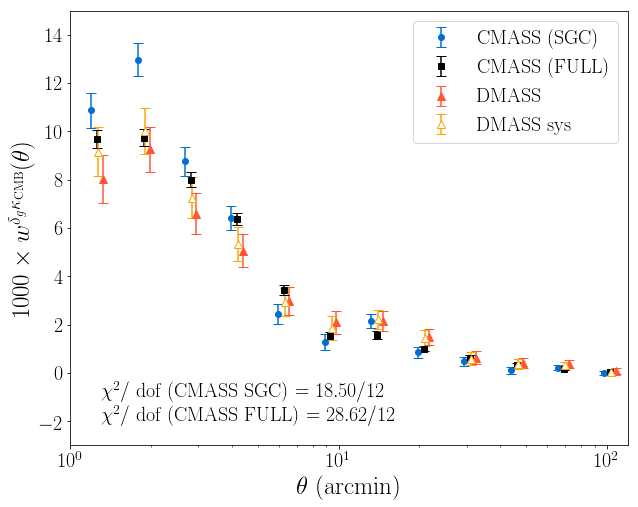

In [110]:
fig, ax = plt.subplots(figsize = (10,8))

ax.errorbar( rmin_cmb_sgc*0.95, 1000*kappa_cmb_sgc, yerr = 1000*err_gk_sgc, fmt='o',color = cmass_sgc_color,  capsize=5, label=r'{\rm CMASS (SGC)}' )
ax.errorbar( rmin_cmb_full*1., 1000*kappa_cmb_full, yerr = 1000*err_gk_full, fmt = 's', color = cmass_full_color, capsize=5, label=r'{\rm CMASS (FULL)}' )
ax.errorbar( rmin_cmb_dmass*1.05, 1000*kappa_cmb_dmass, yerr = 1000*err_gk_dmass, fmt='^', \
            markersize = 8, color = dmass_color, capsize=5, label=r'{\rm DMASS}' )
ax.errorbar( rmin_cmb_dmass*1.01, 1000*kappa_cmb_dmass_sys, yerr = 1000*err_gk_dmass, fmt='^', \
            markersize = 8, markerfacecolor='w', color = 'orange', capsize=5, label=r'{\rm DMASS~sys}' )

#ax.plot(rmin_cmb_th, 1000*rmin_cmb_th*kappa_cmb_theory, '-', color='grey')
#ax.axhline(y=0, ls='--', color='grey')
ax.set_xscale('log')
#ax.set_yscale('log')

ax.legend(loc = 1, fontsize = 20)
ax.set_xlim(1, 120)
ax.set_ylim(-3,15)
ax.set_ylabel(r'$1000 \times w^{\delta_{g} \kappa_{\rm CMB}} (\theta) $', fontsize = 25)
ax.set_xlabel(r'$\theta$ {\rm (arcmin) }', fontsize = 25)
ax.tick_params(labelsize = 20)

#ax.text(8, 6, r'$\chi^2/$ $\rm dof ~(CMASS~SGC) $ $= {:0.2f}/{}$'.format(chi_ds, 12), fontsize = 20)
#ax.text(8, 5  , r'$\chi^2/$ $\rm dof ~(CMASS~FULL) $ $= {:0.2f}/{}$'.format(chi_df, 12), fontsize = 20)

ax.text(1.3, -1, r'$\chi^2/$ $\rm dof ~(CMASS~SGC) $ $= {:0.2f}/{}$'.format(chi_ds, 12), fontsize = 20)
ax.text(1.3, -2  , r'$\chi^2/$ $\rm dof ~(CMASS~FULL) $ $= {:0.2f}/{}$'.format(chi_df, 12), fontsize = 20)



fig.savefig('../paper_figure//kappa_cmblensing_cov_analytic_v2.pdf' )

# Redshift Distribution

In [22]:
dz

0.01

In [75]:
zbin,dz = np.linspace(0.0,10., 1001, retstep=True)
zcenter = zbin[:-1]+dz/2.
#Nz = np.column_stack(( zbin[:-1], N1, N2, N3, N4 ))
#np.savetxt('/n/des/lee.5922/programs/cosmolike/MG_musigma/zdistris/twomass.nz', Nz)
#Nz = np.genfromtxt('/n/des/lee.5922/programs/cosmolike/MG_musigma/cosmolike_planck_working/zdistris/twomass.nz')
#Nz_cmass,_ = np.histogram( cmass_spec['Z'], bins=zbin, normed=True)
#Nz_cmass = np.column_stack(( zbin[:-1], Nz_cmass ))

zbin1, Nz_cmass_ngc = np.genfromtxt('/n/des/lee.5922/programs/cosmolike/MG_musigma/cosmolike_planck_working/zdistris/cmass_ngc.nz', unpack=True)
zbin2, Nz_cmass_sgc = np.genfromtxt('/n/des/lee.5922/programs/cosmolike/MG_musigma/cosmolike_planck_working/zdistris/cmass_sgc.nz', unpack=True)
Nz_cmass_ngc = scipy.interpolate.interp1d(zbin1, Nz_cmass_ngc)
Nz_cmass_sgc = scipy.interpolate.interp1d(zbin2, Nz_cmass_sgc)

#Nz_cmass = np.genfromtxt('/n/des/lee.5922/programs/cosmolike/MG_musigma/cosmolike_planck_working/zdistris/dmass_ansatz_a0.07.nz')
#N_2mass_all = np.genfromtxt('/n/des/lee.5922/programs/cosmolike/MG_musigma/cosmolike_planck_working/zdistris/twomass_1bin.nz')

In [76]:
#dmass_fits = fitsio.FITS('/n/des/lee.5922/data/dmass_cat/dmass_nz/dmass_nz_new.fits')
#dmass_cov_fits = fitsio.FITS('/n/des/lee.5922/data/dmass_cat/dmass_nz/nz_with_cov.fits')

dmassfits_filename = '/n/des/lee.5922/data/dmass_cat/dmass_nz/dmass_nz_new.fits'
dmassnz_fits = fitsio.FITS(dmassfits_filename)
#dmassnz = fitsio.read(dmassfits_filename)

zbin = dmassnz_fits['combined_weights_noRU']['z'].read()
N = dmassnz_fits['combined_weights_noRU']['N'].read()
NLS = dmassnz_fits['combined_weights_LS']['N'].read()

zbin2 = dmassnz_fits['cmass_prob_noRU']['z'].read()
N2 = dmassnz_fits['cmass_prob_noRU']['N'].read()
N2LS = dmassnz_fits['cmass_prob_LS']['N'].read()

Nerr = np.sqrt(dmassnz_fits['cov_combined_weights_noRU'].read().diagonal())
Nerr2 = np.sqrt(dmassnz_fits['cov_cmass_prob_noRU'].read().diagonal())
NerrLS = np.sqrt(dmassnz_fits['cov_combined_weights_LS'].read().diagonal())
Nerr2LS = np.sqrt(dmassnz_fits['cov_cmass_prob_LS'].read().diagonal())

#desphotoz = dmassnz_fits['DESDM_ZP']['N'].read()

cov = dmassnz_fits['cov_combined_weights_noRU'].read()
cov2 = dmassnz_fits['cov_cmass_prob_noRU'].read()

covLS = dmassnz_fits['cov_combined_weights_LS'].read()
cov2LS = dmassnz_fits['cov_cmass_prob_LS'].read()

In [97]:
zbin

array([0.17, 0.19, 0.21, 0.23, 0.25, 0.27, 0.29, 0.31, 0.33, 0.35, 0.37,
       0.39, 0.41, 0.43, 0.45, 0.47, 0.49, 0.51, 0.53, 0.55, 0.57, 0.59,
       0.61, 0.63, 0.65, 0.67, 0.69, 0.71, 0.73, 0.75, 0.77, 0.79, 0.81,
       0.83, 0.85, 0.87])

In [98]:
cosmosis_dir = '/n/des/lee.5922/programs/cosmolike/cosmosis/dmass_cat/fits/'
cmass_sgc_fits = fitsio.FITS(cosmosis_dir+'datav_residual_auto_dmass_cmass_sgc_nbin10_jk100.fits')
cmass_full_fits = fitsio.FITS(cosmosis_dir+'datav_residual_auto_dmass_cmass_full_nbin10_jk100.fits')
cmass_sgc_zbin = cmass_sgc_fits['NZ_LENS']['Z_MID'].read()
cmass_sgc_nz = cmass_sgc_fits['NZ_LENS']['BIN1'].read()

cmass_full_zbin = cmass_full_fits['NZ_LENS']['Z_MID'].read()
cmass_full_nz = cmass_full_fits['NZ_LENS']['BIN1'].read()

Nz_cmass_full = scipy.interpolate.interp1d(cmass_full_zbin, cmass_full_nz)
Nz_cmass_sgc = scipy.interpolate.interp1d(cmass_sgc_zbin, cmass_sgc_nz)


In [74]:
zbin2

array([0.17, 0.19, 0.21, 0.23, 0.25, 0.27, 0.29, 0.31, 0.33, 0.35, 0.37,
       0.39, 0.41, 0.43, 0.45, 0.47, 0.49, 0.51, 0.53, 0.55, 0.57, 0.59,
       0.61, 0.63, 0.65, 0.67, 0.69, 0.71, 0.73, 0.75, 0.77, 0.79, 0.81,
       0.83, 0.85, 0.87])

In [104]:
chi_sgc = chisqr(N, Nz_cmass_sgc(zbin), cov)#/nz_fid.size
chi_full = chisqr(N, Nz_cmass_full(zbin), cov)#/nz_sm.size
print 'with weight :',chi_sgc, chi_full

chi_sgc_LS = chisqr(NLS, Nz_cmass_sgc(zbin), covLS)#/nz_fid.size


chi_sgc2 = chisqr(N2, Nz_cmass_sgc(zbin2), cov2)#/nz_fid.size
chi_full2 = chisqr(N2, Nz_cmass_full(zbin2), cov2)#/nz_sm.size
print 'w/o weight :',chi_sgc2, chi_full2

chi_sgc_LS2 = chisqr(N2LS, Nz_cmass_sgc(zbin2), cov2LS)#/nz_fid.size


with weight : 36.17366622788092 37.48059594485994
w/o weight : 46.3339505427149 46.3326702224036


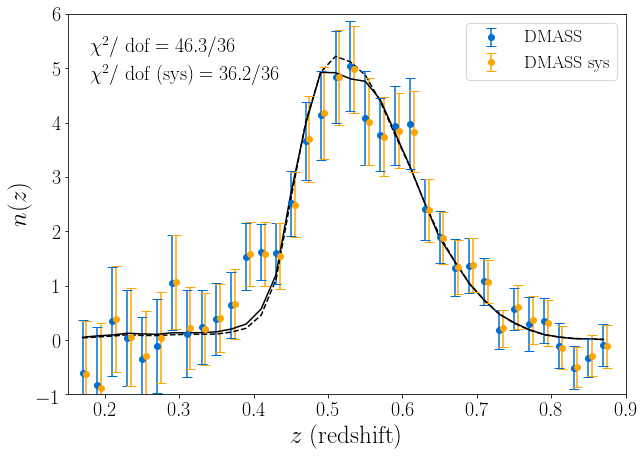

In [115]:
fig, ax = plt.subplots(figsize = (10,7))
ax.plot(zbin, Nz_cmass_full(zbin), 'k--')#, label=r'\rm CMASS (FULL)')
ax.plot(zbin, Nz_cmass_sgc(zbin), 'k-')#, label=r'\rm CMASS (SGC)')

#ax.plot(zbin, Nz_cmass_ngc(zbin), 'k--', label=r'\rm CMASS')

#ax.plot(cmass_full_zbin, cmass_full_nz, 'k--', label=r'\rm CMASS (full)')
#ax.plot(cmass_sgc_zbin, cmass_sgc_nz, 'k-', label=r'\rm CMASS (SGC)')


zbinhist = np.linspace(0, 1, 51)
#fig, ax = plt.subplots(figsize = (10, 8))

#_ = ax.hist( dmass['DESDM_ZP'], bins = zbinhist, normed = True, histtype='step', color='k', label='no CMASS PROB')
#_ = ax.hist( dmass['DESDM_ZP'], bins = zbinhist, weights = dmass['CMASS_PROB'], color='k', ls='-', normed = True, histtype='step')
#ax.legend()


#ax.errorbar(zbin_old+0.002, N_old, yerr = Nerr_old, fmt='o', label=r'{\rm old}')
#ax.errorbar(zbin-0.002, N, yerr = Nerr, fmt='o', capsize = 0, label=r'{\rm new}')


#ax.errorbar(zbin+0.005, NLS, yerr = NerrLS, fmt='o', capsize = 5, color=dmass_color, label=r'{\rm LS}')
#ax.errorbar(zbin+0.0025, N2LS, yerr = Nerr2LS, fmt='.', capsize = 5, label='no weight(LS)')
ax.errorbar(zbin, N2, yerr = Nerr2, fmt='o', capsize = 5, color=cmass_sgc_color, label=r'{\rm DMASS}')
ax.errorbar(zbin+0.005, N, yerr = Nerr, fmt='o', capsize = 5, color='orange',label=r'{\rm DMASS sys}')

#ax.errorbar(zbin_old, N_old, yerr = Nerr2, fmt='.')
#ax.step(zbin, desphotoz,  where='mid', color = 'k')

#ax.text(0.35, -0.3, r'$\chi^2$ {\rm /dof (LS) = 20.78/36}', fontsize = 20)
#ax.text(0.35, -0.6, r'$\chi^2$ {\rm /dof (noRU) = 96.32/36}', fontsize = 20)

ax.text(0.18, 5.3, r'$\chi^2/$ {\rm dof} '+r'$= {:0.1f}/{}$'.format(chi_sgc2, N2.size), fontsize=20)
ax.text(0.18, 4.8, r'$\chi^2/$ {\rm dof (sys)} '+r'$= {:0.1f}/{}$'.format(chi_sgc, N.size), fontsize=20)

ax.set_xlim(0.15, 0.9)
ax.set_ylim(-1, 6)
ax.legend(fontsize = 18, loc=1)
ax.tick_params(labelsize=20)

ax.set_xlabel(r'$z~({\rm redshift})$', fontsize=25)
ax.set_ylabel(r'$n(z)$', fontsize=25)
ax.set_ylim(-1,)
ax.tick_params(labelsize = 20)

#ax.set_xlabel(r'$z$', fontsize = 25)
#ax.set_ylabel(r'$n(z)$', fontsize = 25)
fig.savefig('../paper_figure/nz_nosys.pdf')

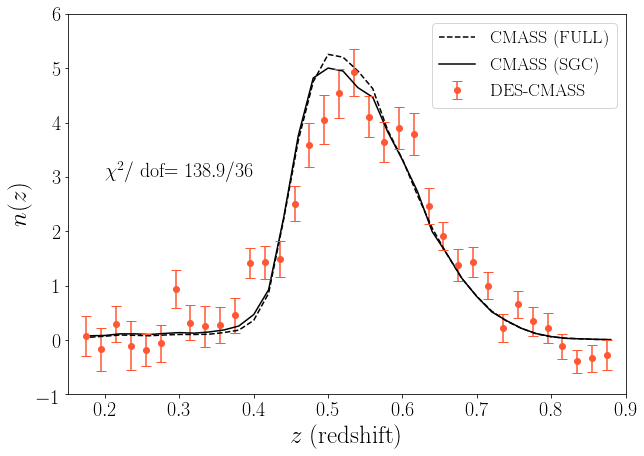

In [117]:
fig, ax = plt.subplots(figsize = (10,7))
ax.plot(zbin+0.01, Nz_cmass_full(zbin+0.01), 'k--', label=r'\rm CMASS (FULL)')
ax.plot(zbin+0.01, Nz_cmass_sgc(zbin+0.01), 'k-', label=r'\rm CMASS (SGC)')

ax.errorbar(zbin+0.005, NLS, yerr = NerrLS, fmt='o', capsize = 5, color=dmass_color, label=r'{\rm DES-CMASS}')
#ax.errorbar(zbin+0.0025, N2LS, yerr = Nerr2LS, fmt='.', capsize = 5, label='no weight(LS)')
#ax.errorbar(zbin+0.01, N, yerr = Nerr, fmt='o', capsize = 5, color=cmass_sgc_color, label=r'{\rm DES-CMASS}')
#ax.errorbar(zbin+0.0025, N2, yerr = Nerr2, fmt='.', capsize = 5, color=cmass_full_color,label='no weight(noRu)')

ax.text(0.2, 3., r'$\chi^2/$ {\rm dof}'+r'$= {:0.1f}/{}$'.format(chi_sgc_LS, N.size), fontsize=20)

ax.set_xlim(0.15, 0.9)
ax.set_ylim(-1, 6)
ax.legend(fontsize = 18, loc=1)

ax.set_xlabel(r'$z~({\rm redshift})$', fontsize=25)
ax.set_ylabel(r'$n(z)$', fontsize=25)
ax.set_ylim(-1,)
ax.tick_params(labelsize = 20)

#ax.set_xlabel(r'$z$', fontsize = 20)
#ax.set_ylabel(r'$n(z)$', fontsize = 20)
fig.savefig('../paper_figure/nz-LS.pdf')

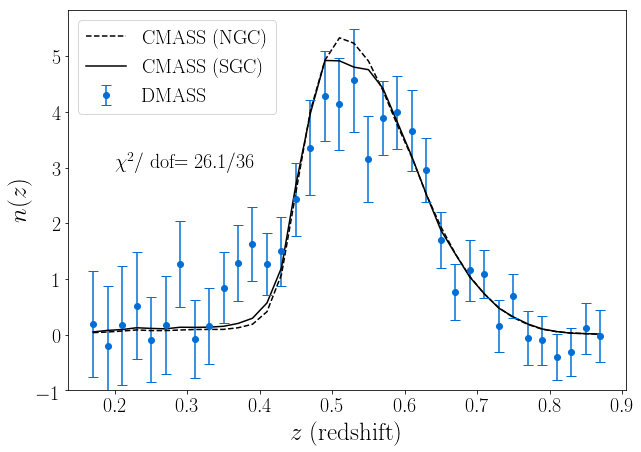

In [658]:
fig, ax = plt.subplots(figsize = (10,7))
ax.plot(z_fid, Nz_cmass_ngc(z_fid), 'k--', label=r'\rm CMASS (NGC)')
ax.plot(z_fid, Nz_cmass_sgc(z_fid), 'k-', label=r'\rm CMASS (SGC)')
#ax.plot(desdm_zp, Nz_desdm, '-', color='grey', label='desdm_zp', linewidth=4, alpha = 0.3)

ax.errorbar(z_fid, nz_fid, yerr=z_err_fid, fmt='o', color=cmass_sgc_color, capsize=5, label=r'\rm DMASS')
ax.text(0.2, 3., r'$\chi^2/$ {\rm dof}'+r'$= {:0.1f}/{}$'.format(chi_fid, z_fid.size), fontsize=20)
#ax.errorbar(z_sm+0.005, nz_sm, yerr=z_err_sm, fmt='.', label='small (0.1-0.5Mpc)')
#ax.text(0.2, 2.5, r'$\chi^2/dof=94.4/36$', fontsize=15, color = ax.lines[-1].get_color())
#ax.axhline(y=0, color='k', linewidth = 1)
#ax.set_xlim(0.1,0.9)
ax.legend(fontsize = 20)

ax.set_xlabel(r'$z~({\rm redshift})$', fontsize=25)
ax.set_ylabel(r'$n(z)$', fontsize=25)
ax.set_ylim(-1,)
ax.tick_params(labelsize = 20)

fig.savefig('../paper_figure//dmass_nz-2.pdf' )

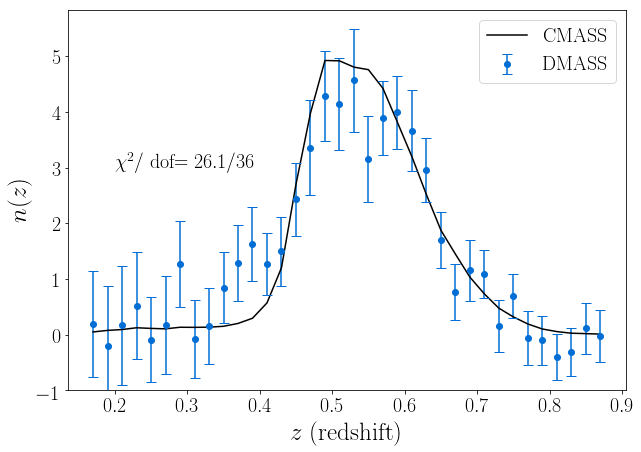

In [659]:
fig, ax = plt.subplots(figsize = (10,7))
#ax.plot(z_fid, Nz_cmass_ngc(z_fid), 'k-', label=r'\rm CMASS NGC')
ax.plot(z_fid, Nz_cmass_sgc(z_fid), 'k-', label=r'\rm CMASS')
#ax.plot(desdm_zp, Nz_desdm, '-', color='grey', label='desdm_zp', linewidth=4, alpha = 0.3)

ax.errorbar(z_fid, nz_fid, yerr=z_err_fid, fmt='o', color=cmass_sgc_color, capsize=5, label=r'\rm DMASS')
ax.text(0.2, 3., r'$\chi^2/$ {\rm dof}'+r'$= {:0.1f}/{}$'.format(chi_fid, z_fid.size), fontsize=20)
#ax.errorbar(z_sm+0.005, nz_sm, yerr=z_err_sm, fmt='.', label='small (0.1-0.5Mpc)')
#ax.text(0.2, 2.5, r'$\chi^2/dof=94.4/36$', fontsize=15, color = ax.lines[-1].get_color())
#ax.axhline(y=0, color='k', linewidth = 1)
#ax.set_xlim(0.1,0.9)
ax.legend(fontsize = 20)

ax.set_xlabel(r'$z~({\rm redshift})$', fontsize=25)
ax.set_ylabel(r'$n(z)$', fontsize=25)
ax.set_ylim(-1,)
ax.tick_params(labelsize = 20)

fig.savefig('../paper_figure//dmass_nz.pdf' )

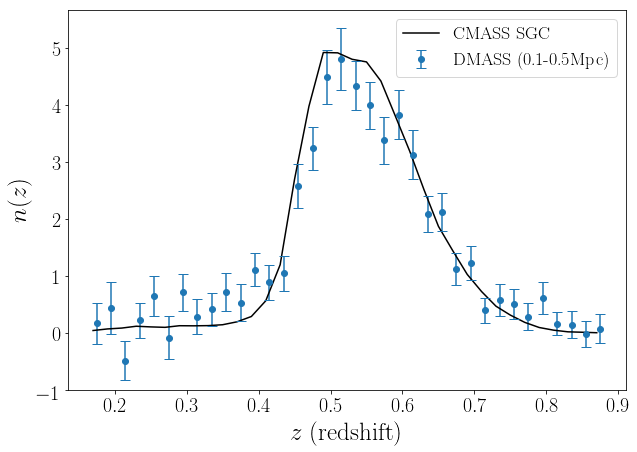

In [532]:
fig, ax = plt.subplots(figsize = (10,7))
#ax.plot(z_fid, Nz_cmass_ngc(z_fid), 'k-', label=r'\rm CMASS')
ax.plot(z_fid, Nz_cmass_sgc(z_fid), 'k-', label=r'\rm CMASS SGC')
#ax.plot(desdm_zp, Nz_desdm, '-', color='grey', label='desdm_zp', linewidth=4, alpha = 0.3)

#ax.errorbar(z_fid, nz_fid, yerr=z_err_fid, fmt='.', capsize=5, label=r'\rm DMASS')
#ax.text(0.2, 3., r'$\chi^2/$ {\rm dof}'+r'$= {:0.1f}/{}$'.format(chi_fid, z_fid.size), fontsize=20)
ax.errorbar(z_sm+0.005, nz_sm, yerr=z_err_sm, fmt='o', capsize = 5,label=r'\rm DMASS (0.1-0.5Mpc)')
#ax.text(0.2, 2.5, r'$\chi^2/dof=94.4/36$', fontsize=15, color = ax.lines[-1].get_color())
#ax.axhline(y=0, color='k', linewidth = 1)
#ax.set_xlim(0.1,0.9)
ax.legend(fontsize = 18)

ax.set_xlabel(r'$z~({\rm redshift})$', fontsize=25)
ax.set_ylabel(r'$n(z)$', fontsize=25)
ax.set_ylim(-1,)
ax.tick_params(labelsize = 20)

fig.savefig('../paper_figure//dmass_nz-3.pdf' )

# Systematics Weight 

In [43]:
suf = 'wg_fwhm_r_airmass_z_exptime_g_fwhm_i_airmass_g_fwhm_g'

orderlabel = suf.split('_')[1:]
order = []
for i in np.arange(0, len(orderlabel), 2):
    order.append( orderlabel[i]+'_'+orderlabel[i+1] )
order = ['vetoed'] + order
print order

['vetoed', 'fwhm_r', 'airmass_z', 'exptime_g', 'fwhm_i', 'airmass_g', 'fwhm_g']


../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//act/acf_auto_dmass_no_weight_pcut01_nbins10_jk100.txt
err db, db / br1, brmin, br2 : 0.026365634741858046 0.012170458200698953 0.9928731839625272 1.0061224858292843 1.0192388187043853
../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//act/acf_auto_dmass_veto_pcut01_nbins10_jk100.txt
err db, db / br1, brmin, br2 : 0.026136292476463208 0.011463003569439634 0.9926313834514213 1.0057645412632583 1.0187676759278845
../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//act/acf_auto_dmass_weight0_pcut01_nbins10_jk100.txt
err db, db / br1, brmin, br2 : 0.026080323425738627 0.024776903060909516 0.9994197156118098 1.0125438504133053 1.0255000390375484
../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//act/acf_auto_dmass_weight1_pcut01_nbins10_jk100.txt
err db, db / br1, brmin, br2 : 0.022877927392664477 0.007677113428239846 0.9923492083890015 1.0038533480089917 1.015227135781666
../output/sfd_train_photo_

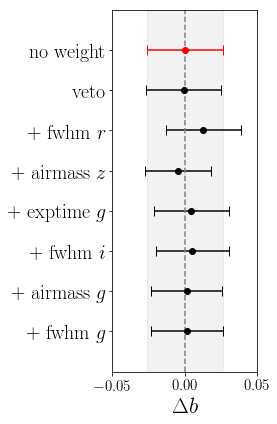

In [661]:
from systematics import brel_chisqr_fitting
import scipy
basedir = rootdir+'/act/'

#theta_th, theory = np.loadtxt('../data_txt/acf_cmass_ngc_theory.txt', unpack=True)
#theta_th, theory_sgc = np.loadtxt('../data_txt/acf_cmass_sgc_theory.txt', unpack=True)
theory_sgc_interp = scipy.interpolate.interp1d(theta_th, theory_sgc)
#theory_sgc_interp = theory_sgc_interp(meanr)

fig, ax = plt.subplots(figsize = (4,6))
brelsqr = np.linspace(0.5, 1.5, 5000) 
b_n = 2.0
brelarr = np.sqrt(brelsqr)
dbarray = b_n*(1-brelarr)

b_noweight = 1.0061224858292843 *2
db_noweight = 1.0061224858292843 *2 - 2


#meanr_sgc, xi_sgc, xi_err_sgc = np.loadtxt('../data_txt//acf_auto_cmass_sgc_sys_cp_nz_weight_nbins10_jk100.txt',unpack=True)
#cov_cmass_s = np.genfromtxt('../data_txt//acf_auto_cmass_sgc_sys_cp_nz_weight_nbins10_jk100.cov')


labels_SP = [r'${\rm no~weight}$', r'${\rm veto}$'] + [r'$+$ $\rm {}$ ${}$'.format(o.split('_')[0], o.split('_')[1]) for o in order[1:] ]

filenames = [ basedir+ 'acf_auto_dmass_no_weight_pcut01_nbins10_jk100.txt', \
              basedir + 'acf_auto_dmass_veto_pcut01_nbins10_jk100.txt'
            ] \
+[ basedir+'acf_auto_dmass_weight'+str(j)+'_pcut01_nbins10_jk100.txt' for j in range(0, len(labels_SP))]

covnames = [ basedir+ 'acf_auto_dmass_no_weight_pcut01_nbins10_jk100.cov', \
              basedir + 'acf_auto_dmass_veto_pcut01_nbins10_jk100.cov'
           ] \
+[ basedir+'acf_auto_dmass_weight'+str(j)+'_pcut01_nbins10_jk100.cov' for j in range(0, len(labels_SP))]




for j in range(1, len(labels_SP)+1):
#for j in [1,7]:
    
    print filenames[j-1]
    meanrw, xiw, xi_errw = np.loadtxt( filenames[j-1], unpack=True)
    cov_dmass_w = np.loadtxt( covnames[j-1], unpack=True)
    #meanrw, xiw, xi_errw = np.loadtxt(basedir+'acf_auto_dmass_weight'+str(j)+'_nbins10_jk100.txt', unpack=True)
    #cov_dmass_w = np.loadtxt(basedir+'acf_auto_dmass_weight'+str(j)+'_nbins10_jk100.cov', unpack=True)
    HFd = 1.0 #HF(50, 10)
    F_d = HFd * np.linalg.inv(cov_dmass_w)
    err_brelw, brelw, chisqr_resultw = brel_chisqr_fitting(xiw, theory_sgc_interp(meanrw), F_d, verbose=True)
    if j == 1 : 
        color = 'red'
        ax.axvspan(-err_brelw*2., err_brelw*2.,  alpha=0.1, color='grey')
        ax.axvline(x=brelw*2 - b_noweight, color = 'grey', ls='--')
        #ax.axvspan(- err_brelw*2.,  err_brelw*2.,  alpha=0.1, color='grey')
        #ax.axvline(x=0, color = 'grey', ls='--')
    else : color = 'k'  
        
    ax.errorbar(brelw*2 - b_noweight, len(labels_SP)+1-j, xerr =err_brelw*2., fmt='-o', capsize=5, color=color)
    
#ax.set_xlabel(r'$\Delta b = b_{fid} - b_x$', fontsize = 20)
ax.set_xlabel(r'$\Delta b$', fontsize = 22)
#ax.set_ylabel(r'$\chi^2$')
ax.legend(loc=1)
ax.set_xlim(-0.05, 0.05)
ax.set_ylim(0,len(labels_SP)+1)
#ax.set_yticks([1,2,3,4,5,6,7,8,9,10,11,12])
ax.set_yticks(np.arange(1, len(labels_SP)+1 ))
ax.tick_params(labelsize = 15)
labels = labels_SP[::-1]
ax.set_yticklabels( labels, fontsize = 20) 
fig.tight_layout()
fig.savefig(figoutdir + 'sys_bias_weight.png')
print 'pic save to ', figoutdir + 'sys_bias_weight.png'


#fig.savefig('../paper_figure/sys_bias_weight.pdf')


# Prob test 

In [285]:
labels_SP = [r'${:3.1f}$'.format(pc*100) for pc in pth_bin[:16]]
print labels_SP

['$0.0$', '$0.1$', '$0.2$', '$0.3$', '$0.4$', '$0.5$', '$0.6$', '$0.7$', '$0.8$', '$0.9$', '$1.0$', '$1.1$', '$1.2$', '$1.3$', '$1.4$', '$1.5$']


err db, db / br1, brmin, br2 : 0.028844271515027886 0.038431122021409525 1.005048269689014 1.019592032914497 1.0338925412040418
err db, db / br1, brmin, br2 : 0.02889359647580836 0.03236377416345371 1.0018985777772271 1.0164480475295652 1.0307921742530355
err db, db / br1, brmin, br2 : 0.024157447446197855 0.023619703889090626 0.9998199477833982 1.0119509913833735 1.023977395229596
err db, db / br1, brmin, br2 : 0.024315620434039453 0.023619703889090626 0.9997399141672777 1.0119509913833735 1.0240555346013172
err db, db / br1, brmin, br2 : 0.028039333787853726 0.017569308515205773 0.9947652545109908 1.0088625083291294 1.0228045882988446
err db, db / br1, brmin, br2 : 0.02768940781208118 0.017101588633391174 0.9946848141878487 1.008624540992801 1.0223742219999299
err db, db / br1, brmin, br2 : 0.027486157025174873 0.017413438664629632 0.9949663268665526 1.0087831921209538 1.0224524838917275
err db, db / br1, brmin, br2 : 0.02793257600779353 0.002595459042053383 0.9872157408509028 1.0012

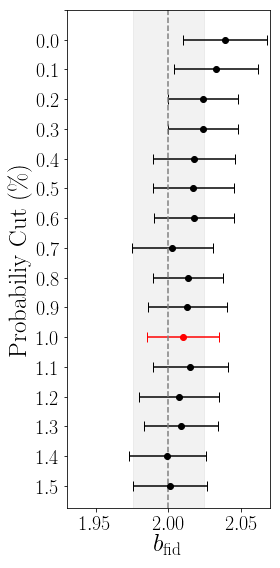

In [662]:
import scipy

pbinsmall, steps = np.linspace(0, 0.02, 21,retstep=1 )
pbinbig, stepb = np.linspace(0.02, 1, 197, retstep=1 )
pth_bin = np.hstack([pbinsmall, pbinbig[1:]])
pcenters = pbinsmall[:-1] + steps/2.
pcenterb = pbinbig[:-1] + stepb/2.
pcenter = np.hstack([pcenters, pcenterb[1:]])

theta_th, theory = np.loadtxt('../data_txt/acf_cmass_ngc_theory.txt', unpack=True)
theta_th, theory_sgc = np.loadtxt('../data_txt/acf_cmass_sgc_theory.txt', unpack=True)
theory_sgc_interp = scipy.interpolate.interp1d(theta_th, theory_sgc)
#theory_sgc_interp = theory_sgc_interp(meanr)

fig, ax = plt.subplots(figsize = (4,8))
brelsqr = np.linspace(0.8, 1.2, 5000) 
b_n = 2.0
brelarr = np.sqrt(brelsqr)
dbarray = b_n*(1-brelarr)

labels_SP = [r'${:3.1f}$'.format(pc*100) for pc in pth_bin[:16]]

filenames = [ basedir+'acf_auto_poisson_dmass_pcut{:0.3f}_nbins10_jk50.txt'.format(pc) for pc in pth_bin[:16]]
#covnames = [ basedir+'acf_auto_dmass_pcut{:0.5f}_nbins10_jk50.cov'.format(pc) for pc in pth_bin[::5][:23]]
covnames = [ basedir +'acf_auto_dmass_pcut{:0.3f}_nbins10_jk100.cov'.format(pc) for pc in pth_bin[:16]]

for j in range(1, len(pth_bin[:16])+1):
    meanrw, xiw, xi_errw = np.loadtxt( filenames[j-1], unpack=True)
    cov_dmass_w = np.loadtxt( covnames[j-1], unpack=True)
    #meanrw, xiw, xi_errw = np.loadtxt(basedir+'acf_auto_dmass_weight'+str(j)+'_nbins10_jk100.txt', unpack=True)
    #cov_dmass_w = np.loadtxt(basedir+'acf_auto_dmass_weight'+str(j)+'_nbins10_jk100.cov', unpack=True)
    HFd = 1.0 #HF(100, 10)
    F_d = HFd * np.linalg.inv(cov_dmass_w)
    err_brelw, brelw, chisqr_resultw = brel_chisqr_fitting(xiw, theory_sgc_interp(meanrw), F_d, verbose=True)
    if pth_bin[:16][j-1] == 0.01 : 
        color = 'r'
        ax.axvspan(2.- err_brelw*2., 2.+err_brelw*2.,  alpha=0.1, color='grey')
        ax.axvline(x=2, color = 'grey', ls='--')
    else : color = 'k'  
   
    ax.errorbar(2*brelw, len(labels_SP)-j, xerr =err_brelw*2., fmt='-o', capsize=5, color=color)
    
ax.set_xlabel(r'$b_{\rm fid}$', fontsize = 25)
#ax.set_ylabel(r'$\chi^2$')
ax.legend(loc=1)
ax.set_xlim(1.93, 2.07)
#ax.set_yticks([1,2,3,4,5,6,7,8,9,10,11,12])
ax.set_yticks(np.arange(len(labels_SP)+1))
ax.set_ylabel(r'{\rm Probabiliy Cut (\%)}', fontsize = 25)
labels = labels_SP[::-1] + ['']
ax.set_yticklabels( labels, fontsize = 20) 
ax.tick_params(labelsize = 20)

fig.tight_layout()
fig.savefig(paperfig + 'sys_bias_pcut.pdf')
print 'pic save to ', figoutdir + 'sys_bias_pcut.png'



# Systematics Galaxy number density

In [664]:
cmass_sgc_color

'#006ED5'

In [80]:
suf = 'wg_fwhm_r_airmass_z'

In [121]:
mkdir ../paper_figure/misc/

{\rm stellar density}


IOError: ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//sys//systematic_NSTARS_allband_g_SPT_wg_fwhm_r_airmass_z.txt not found.

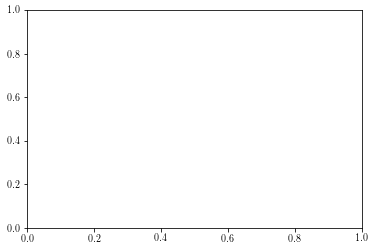

In [81]:
from run_systematics import plot_sysweight_one

paperpic = '../paper_figure/misc/'
sysoutdir = '../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//sys/'
ylabel = r'$ n_g / \langle n_g \rangle$'

plot_sysweight_one(property = 'NSTARS_allband', nside = 1024, kind = 'SPT', 
                   xlabel=r'{\rm stellar density}', ylabel=ylabel,
           suffix1='vetoed', suffix2=suf, inputdir1 = sysoutdir, inputdir2 = sysoutdir, outdir=paperpic)

plot_sysweight_one(property = 'GE', nside = 1024, kind = 'SPT', 
                   xlabel=r'{\rm E(B$-$V)}', ylabel=ylabel,
           suffix1='vetoed', suffix2=suf, inputdir1 = sysoutdir, inputdir2 = sysoutdir, outdir=paperpic)

plot_sysweight_one(property = 'FWHM', filter='r', nside = 1024, kind = 'SPT', 
                   xlabel=r'{\rm FWHM $r$ [pixels]}', ylabel=ylabel,
           suffix1='vetoed', suffix2=suf, inputdir1 = sysoutdir, inputdir2 = sysoutdir, outdir=paperpic)

plot_sysweight_one(property = 'AIRMASS', filter='z', nside = 1024, kind = 'SPT', 
                   xlabel=r'{\rm airmass $z$}', ylabel=ylabel,
           suffix1='vetoed', suffix2=suf, inputdir1 = sysoutdir, inputdir2 = sysoutdir, outdir=paperpic)

plot_sysweight_one(property = 'EXPTIME', filter='g', nside = 1024, kind = 'SPT', 
                   xlabel=r'{\rm exptime $g$}', ylabel=ylabel,
           suffix1='vetoed', suffix2=suf, inputdir1 = sysoutdir, inputdir2 = sysoutdir, outdir=paperpic)

plot_sysweight_one(property = 'FWHM', filter='i', nside = 1024, kind = 'SPT', 
                   xlabel=r'{\rm FWHM $i$ [pixels]}', ylabel=ylabel,
           suffix1='vetoed', suffix2=suf, inputdir1 = sysoutdir, inputdir2 = sysoutdir, outdir=paperpic)

plot_sysweight_one(property = 'AIRMASS', filter='g', nside = 1024, kind = 'SPT', 
                   xlabel=r'{\rm airmass $g$}', ylabel=ylabel,
           suffix1='vetoed', suffix2=suf, inputdir1 = sysoutdir, inputdir2 = sysoutdir, outdir=paperpic)

plot_sysweight_one(property = 'FWHM', filter='g', nside = 1024, kind = 'SPT', 
                   xlabel=r'{\rm FWHM $g$ [pixels]}', ylabel=ylabel,
           suffix1='vetoed', suffix2=suf, inputdir1 = sysoutdir, inputdir2 = sysoutdir, outdir=paperpic)

{\rm stellar density}
saving fig to  ../paper_figure/comparison_systematic_NSTARS_allband_g.pdf
{\rm E(B$-$V)}
saving fig to  ../paper_figure/comparison_systematic_GE_g.pdf
{\rm FWHM $r$ [pixels]}
saving fig to  ../paper_figure/comparison_systematic_FWHM_r.pdf
{\rm airmass $z$}
saving fig to  ../paper_figure/comparison_systematic_AIRMASS_z.pdf
{\rm exptime $g$}
saving fig to  ../paper_figure/comparison_systematic_EXPTIME_g.pdf
{\rm FWHM $i$ [pixels]}
saving fig to  ../paper_figure/comparison_systematic_FWHM_i.pdf
{\rm airmass $g$}
saving fig to  ../paper_figure/comparison_systematic_AIRMASS_g.pdf
{\rm FWHM $g$ [pixels]}
saving fig to  ../paper_figure/comparison_systematic_FWHM_g.pdf


0

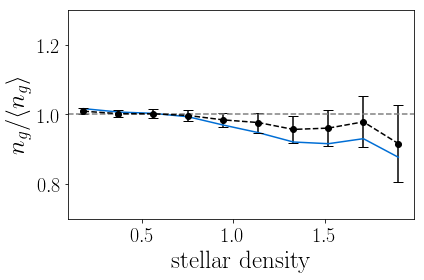

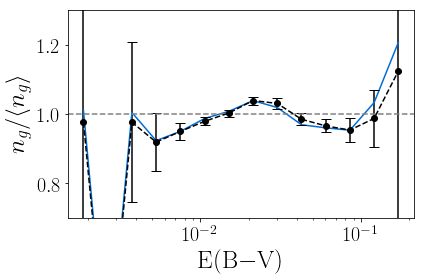

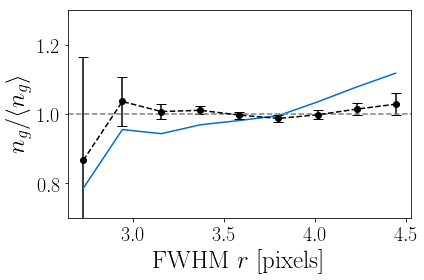

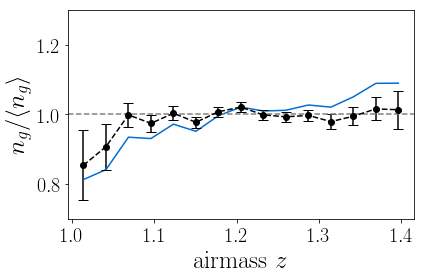

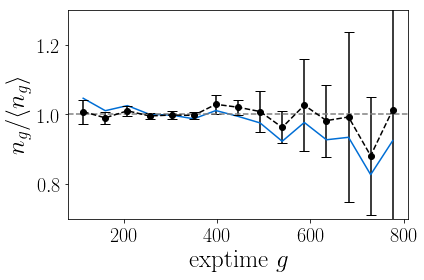

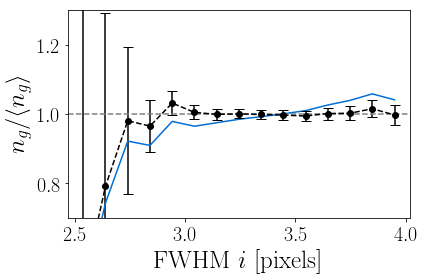

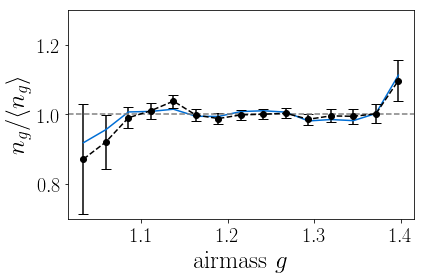

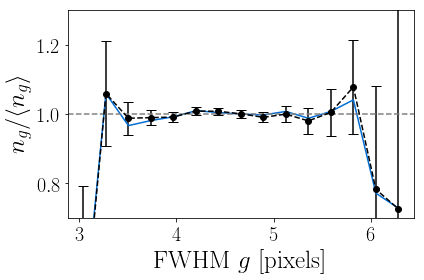

In [14]:
from run_systematics import plot_sysweight_one

paperpic = '../paper_figure/'
ylabel = r'$ n_g / \langle n_g \rangle$'

plot_sysweight_one(property = 'NSTARS_allband', nside = 1024, kind = 'SPT', 
                   xlabel=r'{\rm stellar density}', ylabel=ylabel,
           suffix1='vetoed', suffix2=suf, inputdir1 = sysoutdir, inputdir2 = sysoutdir, outdir=paperpic)

plot_sysweight_one(property = 'GE', nside = 1024, kind = 'SPT', 
                   xlabel=r'{\rm E(B$-$V)}', ylabel=ylabel,
           suffix1='vetoed', suffix2=suf, inputdir1 = sysoutdir, inputdir2 = sysoutdir, outdir=paperpic)

plot_sysweight_one(property = 'FWHM', filter='r', nside = 1024, kind = 'SPT', 
                   xlabel=r'{\rm FWHM $r$ [pixels]}', ylabel=ylabel,
           suffix1='vetoed', suffix2=suf, inputdir1 = sysoutdir, inputdir2 = sysoutdir, outdir=paperpic)

plot_sysweight_one(property = 'AIRMASS', filter='z', nside = 1024, kind = 'SPT', 
                   xlabel=r'{\rm airmass $z$}', ylabel=ylabel,
           suffix1='vetoed', suffix2=suf, inputdir1 = sysoutdir, inputdir2 = sysoutdir, outdir=paperpic)

plot_sysweight_one(property = 'EXPTIME', filter='g', nside = 1024, kind = 'SPT', 
                   xlabel=r'{\rm exptime $g$}', ylabel=ylabel,
           suffix1='vetoed', suffix2=suf, inputdir1 = sysoutdir, inputdir2 = sysoutdir, outdir=paperpic)

plot_sysweight_one(property = 'FWHM', filter='i', nside = 1024, kind = 'SPT', 
                   xlabel=r'{\rm FWHM $i$ [pixels]}', ylabel=ylabel,
           suffix1='vetoed', suffix2=suf, inputdir1 = sysoutdir, inputdir2 = sysoutdir, outdir=paperpic)

plot_sysweight_one(property = 'AIRMASS', filter='g', nside = 1024, kind = 'SPT', 
                   xlabel=r'{\rm airmass $g$}', ylabel=ylabel,
           suffix1='vetoed', suffix2=suf, inputdir1 = sysoutdir, inputdir2 = sysoutdir, outdir=paperpic)

plot_sysweight_one(property = 'FWHM', filter='g', nside = 1024, kind = 'SPT', 
                   xlabel=r'{\rm FWHM $g$ [pixels]}', ylabel=ylabel,
           suffix1='vetoed', suffix2=suf, inputdir1 = sysoutdir, inputdir2 = sysoutdir, outdir=paperpic)

# half N bins

{\rm stellar density}
saving fig to  ../paper_figure/halfNbin/comparison_systematic_NSTARS_allband_g.pdf
{\rm E(B$-$V)}
saving fig to  ../paper_figure/halfNbin/comparison_systematic_GE_g.pdf
{\rm FWHM $r$ [pixels]}
saving fig to  ../paper_figure/halfNbin/comparison_systematic_FWHM_r.pdf
{\rm airmass $z$}
saving fig to  ../paper_figure/halfNbin/comparison_systematic_AIRMASS_z.pdf
{\rm exptime $g$}
saving fig to  ../paper_figure/halfNbin/comparison_systematic_EXPTIME_g.pdf
{\rm FWHM $i$ [pixels]}
saving fig to  ../paper_figure/halfNbin/comparison_systematic_FWHM_i.pdf
{\rm airmass $g$}
saving fig to  ../paper_figure/halfNbin/comparison_systematic_AIRMASS_g.pdf
{\rm FWHM $g$ [pixels]}
saving fig to  ../paper_figure/halfNbin/comparison_systematic_FWHM_g.pdf


0

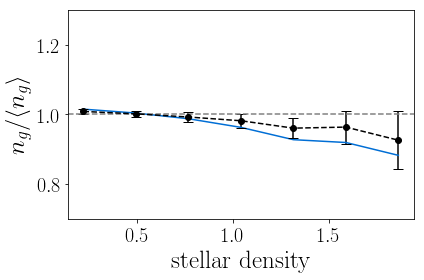

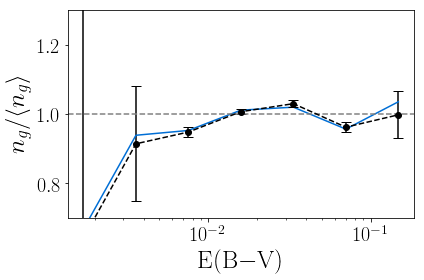

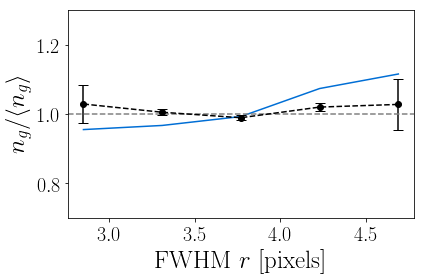

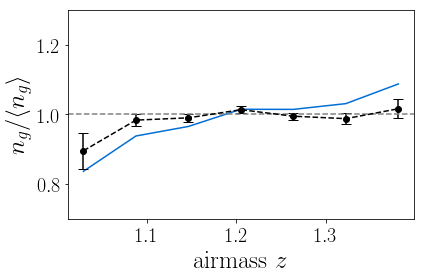

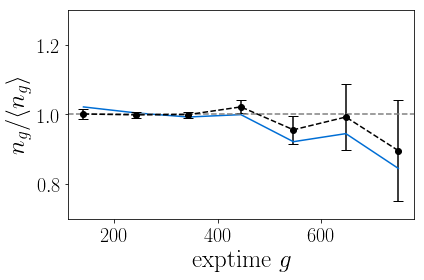

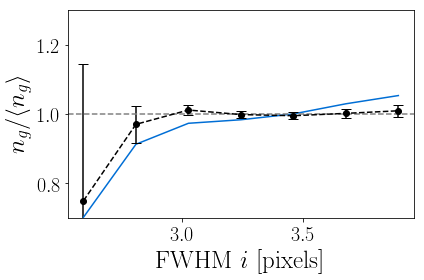

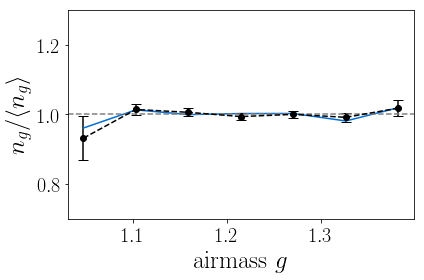

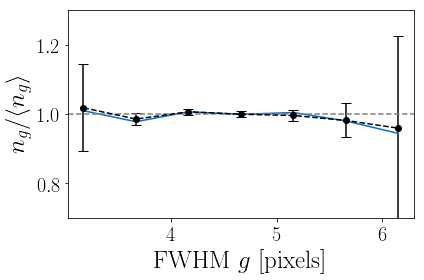

In [4]:
from run_systematics import plot_sysweight_one

paperpic_halfNbin = '../paper_figure/halfNbin/'
sysoutdir_halfNbin = '../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//halfNbin//sys/'
suf_halfNbin = 'wg_fwhm_r_airmass_z_fwhm_i_exptime_g_airmass_g_fwhm_g'

ylabel = r'$ n_g / \langle n_g \rangle$'

plot_sysweight_one(property = 'NSTARS_allband', nside = 1024, kind = 'SPT', 
                   xlabel=r'{\rm stellar density}', ylabel=ylabel,
           suffix1='vetoed', suffix2=suf_halfNbin, inputdir1 = sysoutdir_halfNbin, inputdir2 = sysoutdir_halfNbin, outdir=paperpic_halfNbin)

plot_sysweight_one(property = 'GE', nside = 1024, kind = 'SPT', 
                   xlabel=r'{\rm E(B$-$V)}', ylabel=ylabel,
           suffix1='vetoed', suffix2=suf_halfNbin, inputdir1 = sysoutdir_halfNbin, inputdir2 = sysoutdir_halfNbin, outdir=paperpic_halfNbin)

plot_sysweight_one(property = 'FWHM', filter='r', nside = 1024, kind = 'SPT', 
                   xlabel=r'{\rm FWHM $r$ [pixels]}', ylabel=ylabel,
           suffix1='vetoed', suffix2=suf_halfNbin, inputdir1 = sysoutdir_halfNbin, inputdir2 = sysoutdir_halfNbin, outdir=paperpic_halfNbin)

plot_sysweight_one(property = 'AIRMASS', filter='z', nside = 1024, kind = 'SPT', 
                   xlabel=r'{\rm airmass $z$}', ylabel=ylabel,
           suffix1='vetoed', suffix2=suf_halfNbin, inputdir1 = sysoutdir_halfNbin, inputdir2 = sysoutdir_halfNbin, outdir=paperpic_halfNbin)

plot_sysweight_one(property = 'EXPTIME', filter='g', nside = 1024, kind = 'SPT', 
                   xlabel=r'{\rm exptime $g$}', ylabel=ylabel,
           suffix1='vetoed', suffix2=suf_halfNbin, inputdir1 = sysoutdir_halfNbin, inputdir2 = sysoutdir_halfNbin, outdir=paperpic_halfNbin)

plot_sysweight_one(property = 'FWHM', filter='i', nside = 1024, kind = 'SPT', 
                   xlabel=r'{\rm FWHM $i$ [pixels]}', ylabel=ylabel,
           suffix1='vetoed', suffix2=suf_halfNbin, inputdir1 = sysoutdir_halfNbin, inputdir2 = sysoutdir_halfNbin, outdir=paperpic_halfNbin)

plot_sysweight_one(property = 'AIRMASS', filter='g', nside = 1024, kind = 'SPT', 
                   xlabel=r'{\rm airmass $g$}', ylabel=ylabel,
           suffix1='vetoed', suffix2=suf_halfNbin, inputdir1 = sysoutdir_halfNbin, inputdir2 = sysoutdir_halfNbin, outdir=paperpic_halfNbin)

plot_sysweight_one(property = 'FWHM', filter='g', nside = 1024, kind = 'SPT', 
                   xlabel=r'{\rm FWHM $g$ [pixels]}', ylabel=ylabel,
           suffix1='vetoed', suffix2=suf_halfNbin, inputdir1 = sysoutdir_halfNbin, inputdir2 = sysoutdir_halfNbin, outdir=paperpic_halfNbin)


# emcee chains 

In [6]:
def read_summary(c, chainname = None):
    
    results = c.analysis.get_summary()
    N = len(results)
    
    for i in range(N):
        print '------------------------'
        if chainname is None : print 'chain '+str(i)
        else : print chainname[i]
        for key in results[i].keys():
            min, mean, max = results[i][key]
            #print '-- {:10s}'.format(key), ' {:0.3f}^'.format(mean),'+'
            print '-- {:10s}  {:0.3f}^+{:0.3f}_-{:0.3f}'.format(key, mean, max-mean, mean-min)
            #print '---- {:10s}  {:0.2f}^+{:0.2f}_-{:0.2f} \\times 10^-2'.format(key, mean*100, (max-mean)*100, (mean-min)*100 )
            print '               {:0.2f}^+{:0.2f}_-{:0.2f} \\times 10^-3'.format( mean*1000, (max-mean)*1000, (mean-min)*1000 )
        
    

In [328]:
sis_src_dir = '/n/des/lee.5922/programs/cosmolike/cosmosis/output/wgtheta/'


#chname = sis_src_dir+'residual_auto_dmass_cmass_full/emcee/emcee_residual_auto_dmass_cmass_full_nz_covmocks_prior.txt'
chname = sis_src_dir+'residual_auto_dmass_cmass_full/emcee/emcee_residual_auto_dmass_sysweight_FRAC_cmass_full_nz_covmocks_prior.txt'
chain_full_prior = np.genfromtxt(chname)[10000:,:-2]
chain_full_prior[:, 1]*= -1.0

#chname = sis_src_dir+'residual_auto_dmass_cmass_sgc/emcee/emcee_residual_auto_dmass_cmass_sgc_nz_covmocks_prior.txt'
chname = sis_src_dir+'residual_auto_dmass_cmass_sgc/emcee/emcee_residual_auto_dmass_sysweight_FRAC_cmass_sgc_nz_covmocks_prior.txt'
chain_sgc_prior = np.loadtxt(chname)[10000:,:-2]
chain_sgc_prior[:, 1]*= -1.0

chname = sis_src_dir+'residual_auto_dmass_cmass_full/emcee/emcee_residual_auto_dmass_NOWEIGHT_FRAC_cmass_full_nz_covmocks.txt'
chain_full_NOWEIGHT_prior = np.genfromtxt(chname)[10000:,:-2]
chain_full_NOWEIGHT_prior[:, 1]*= -1.0

chname = sis_src_dir+'residual_auto_dmass_cmass_sgc/emcee/emcee_residual_auto_dmass_NOWEIGHT_FRAC_cmass_sgc_nz_covmocks_prior.txt'
chain_sgc_NOWEIGHT_prior = np.loadtxt(chname)[10000:,:-2]
chain_sgc_NOWEIGHT_prior[:, 1]*= -1.0

plot save to  ../paper_figure/emcee_nz_db_v3_flip.pdf


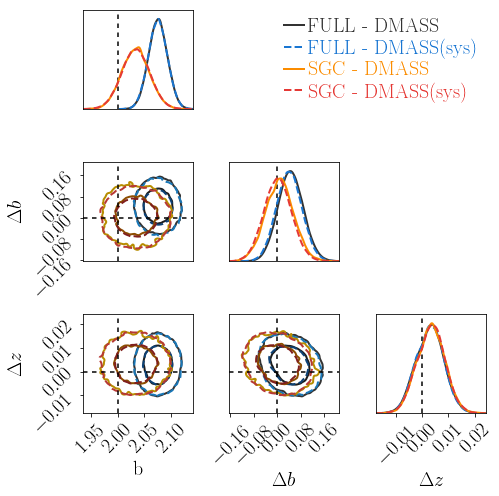

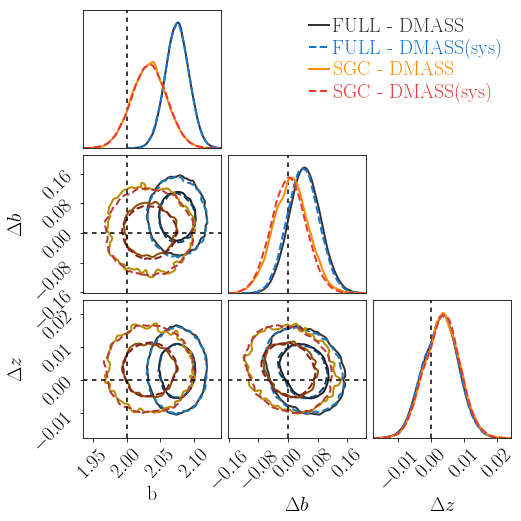

In [329]:
figname = '../paper_figure/emcee_nz_db_v3_flip.pdf'
params3_name = ['b', '$\Delta b$', r'$\Delta z$']
params3_value = [2.0, 0.0, 0.0]
c = plot_triple([chain_full_NOWEIGHT_prior, chain_full_prior, chain_sgc_NOWEIGHT_prior, chain_sgc_prior], \
            [params3_name, params3_name, params3_name, params3_name, params3_name],\
            params3_value, figname,\
            chain_names=['FULL - DMASS', 'FULL - DMASS(sys)', 'SGC - DMASS', 'SGC - DMASS(sys)'],
            #extents = [[-0.25,0.4], [-0.03, 0.04]],
            linewidths = [2,2,2,2,2],
            linestyles= ['-', '--', '-', '--'],
            shade = [2,2,2,2,1],  
            shade_alpha = [0.0, 0, 0., 0., 0.],
            kde=[0,0,0,0,0], keep=[0, 1,2], plot_hists=True, flip=True,
            colors = ['black', 'blue','orange', 'red']
           )

table = c.analysis.get_latex_table(caption="Results for the tested models", label="tab:example")

plot save to  ../paper_figure/emcee_nz_db_v3.pdf


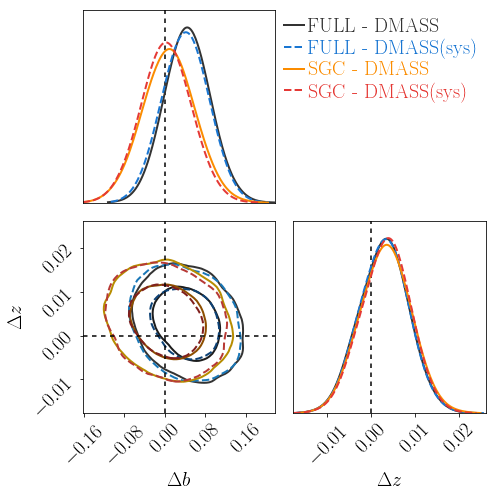

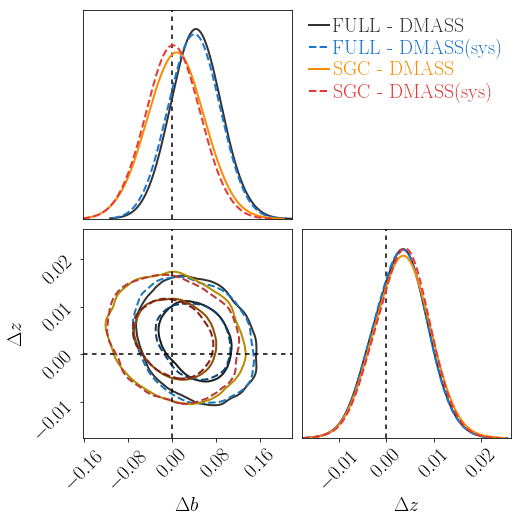

In [322]:
figname = '../paper_figure/emcee_nz_db_v3.pdf'
params3_name = ['b', '$\Delta b$', r'$\Delta z$']
params3_value = [2.0, 0.0, 0.0]
c = plot_triple([chain_full_NOWEIGHT_prior, chain_full_prior, chain_sgc_NOWEIGHT_prior, chain_sgc_prior], \
            [params3_name, params3_name, params3_name, params3_name, params3_name],\
            params3_value, figname,\
            chain_names=['FULL - DMASS', 'FULL - DMASS(sys)', 'SGC - DMASS', 'SGC - DMASS(sys)'],
            #extents = [[-0.25,0.4], [-0.03, 0.04]],
            linewidths = [2,2,2,2,2],
            linestyles= ['-', '--', '-', '--'],
            shade = [2,2,2,2,1],  
            shade_alpha = [0.0, 0, 0., 0., 0.],
            kde=[2,2,2,2,0], keep=[1,2], plot_hists=True,
            colors = ['black', 'blue','orange', 'red']
           )

table = c.analysis.get_latex_table(caption="Results for the tested models", label="tab:example")

plot save to  ../paper_figure/emcee_nz_b_db_v2.pdf


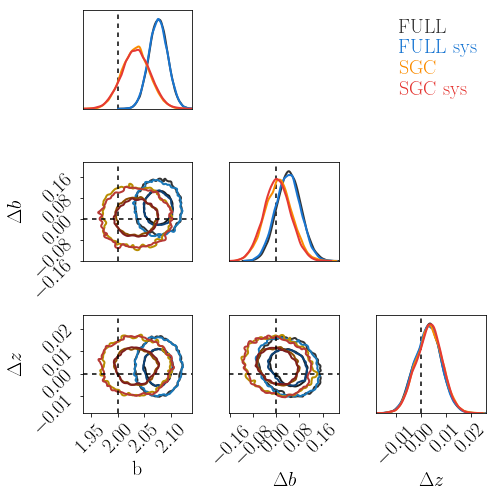

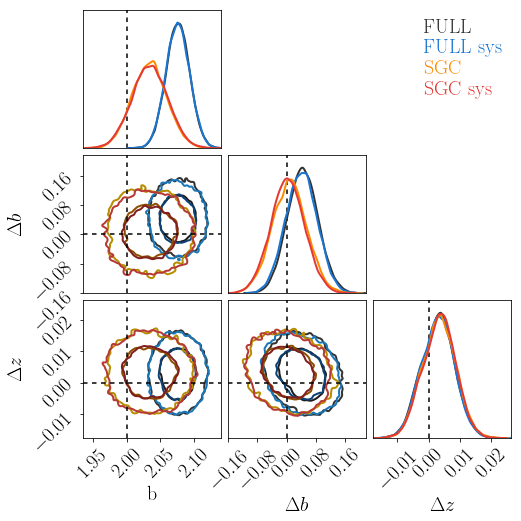

In [249]:
figname = '../paper_figure/emcee_nz_b_db_v2.pdf'
params3_name = ['b', '$\Delta b$', r'$\Delta z$']
params3_value = [2.0, 0.0, 0.0]
c = plot_triple([chain_full_NOWEIGHT_prior, chain_full_prior, chain_sgc_NOWEIGHT_prior, chain_sgc_prior], \
            [params3_name, params3_name, params3_name, params3_name, params3_name],\
            params3_value, figname,\
            chain_names=['FULL', 'FULL sys', 'SGC', 'SGC sys'],
            #extents = [[-0.25,0.4], [-0.03, 0.04]],
            linewidths = [2,2,2,2,2],
            shade = [2,2,2,2,1],  
            shade_alpha = [0.0, 0, 0., 0., 0.],
            kde=[0,0,0,0,0], keep=[0,1,2], plot_hists=True,
            colors = ['black', 'blue','orange', 'red']
           )

table = c.analysis.get_latex_table(caption="Results for the tested models", label="tab:example")

In [323]:
read_summary(c, chainname = ['FULL', 'FULL sys', 'SGC', 'SGC sys'])

------------------------
FULL
-- b           2.076^+0.019_-0.019
               2076.24^+18.80_-18.76 \times 10^-3
-- $\Delta z$  0.004^+0.005_-0.006
               3.51^+5.22_-6.17 \times 10^-3
-- $\Delta b$  0.044^+0.046_-0.045
               43.64^+45.99_-44.92 \times 10^-3
------------------------
FULL sys
-- b           2.076^+0.019_-0.019
               2076.21^+18.77_-19.40 \times 10^-3
-- $\Delta z$  0.003^+0.005_-0.006
               3.42^+5.25_-6.09 \times 10^-3
-- $\Delta b$  0.041^+0.047_-0.047
               41.04^+46.68_-47.49 \times 10^-3
------------------------
SGC
-- b           2.034^+0.028_-0.029
               2033.93^+27.92_-28.61 \times 10^-3
-- $\Delta z$  0.004^+0.006_-0.006
               3.66^+5.62_-6.15 \times 10^-3
-- $\Delta b$  0.009^+0.051_-0.053
               8.59^+51.43_-53.14 \times 10^-3
------------------------
SGC sys
-- b           2.034^+0.029_-0.029
               2034.49^+28.84_-28.55 \times 10^-3
-- $\Delta z$  0.004^+0.005_-0.006
           

# appendix

In [66]:
# 2.0883 ± 0.0168576
# 2.03464 ± 0.0262811
# 2.07563 ± 0.0176381
# 2.02483 ± 0.0369495

# 2.02857 ± 0.0368813
import numpy as np
bias_ngc = np.random.normal(2.0883,0.0168576, size = 50000  )
bias_sgc = np.random.normal(2.03464,0.0262811, size = 50000  )
bias_full = np.random.normal(2.07563,0.0176381, size = 50000  )
bias_dmass = np.random.normal(2.03177,0.0368813, size = 50000  )
delta_bias_ngc_sgc = bias_ngc - bias_sgc

delta_bias_dmass_sgc = bias_sgc - bias_dmass
delta_bias_dmass_ngc = bias_ngc - bias_dmass
delta_bias_dmass_full = bias_full - bias_dmass

In [225]:
dir = '/n/des/lee.5922/programs/cosmolike/cosmosis/output/wgtheta/'
bias_dmass_nz_data = np.genfromtxt(dir+'auto_dmass_nbins10/emcee/emcee_auto_dmass_pcut_sysweight_nbins10_covmocks_nz.txt')
bias_dmass_nz_data = bias_dmass_nz_data[2000:,:-1]
bias_dmass_nz = bias_dmass_nz_data[:,0]
bias_dmass_nz_nz = bias_dmass_nz_data[:,1]
bias_dmass_nz_data[:,2] = bias_dmass_nz_nz
#bias_dmass_nz_nz = bias_dmass_nz_data[2000:,1]

bias_ngc = np.random.normal(2.0883,0.0168576, size = bias_dmass_nz.size  )
bias_sgc = np.random.normal(2.03464,0.0262811, size = bias_dmass_nz.size  )
bias_full = np.random.normal(2.07563,0.0176381, size = bias_dmass_nz.size  )
#bias_dmass = np.random.normal(2.03177,0.0368813, size = bias_dmass_nz.size  )

bias_dmass_sgc_nz = bias_dmass_nz_data.copy()
bias_dmass_sgc_nz[:,0] = bias_sgc
bias_dmass_sgc_nz[:,1] = bias_sgc - bias_dmass_nz

bias_dmass_ngc_nz = bias_dmass_nz_data.copy()
bias_dmass_ngc_nz[:,0] = bias_ngc
bias_dmass_ngc_nz[:,1] = bias_ngc - bias_dmass_nz

bias_dmass_full_nz = bias_dmass_nz_data.copy()
bias_dmass_full_nz[:,0] = bias_full
bias_dmass_full_nz[:,1] = bias_full - bias_dmass_nz

delta_bias_dmass_sgc_nz = bias_sgc - bias_dmass_nz
delta_bias_dmass_ngc_nz = bias_ngc - bias_dmass_nz
delta_bias_dmass_full_nz = bias_full - bias_dmass_nz

plot save to  ../paper_figure/test.pdf


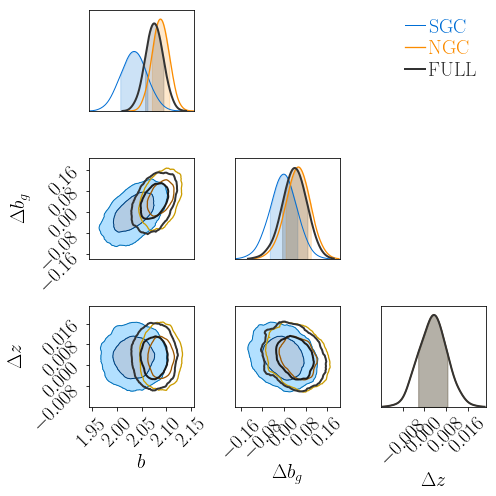

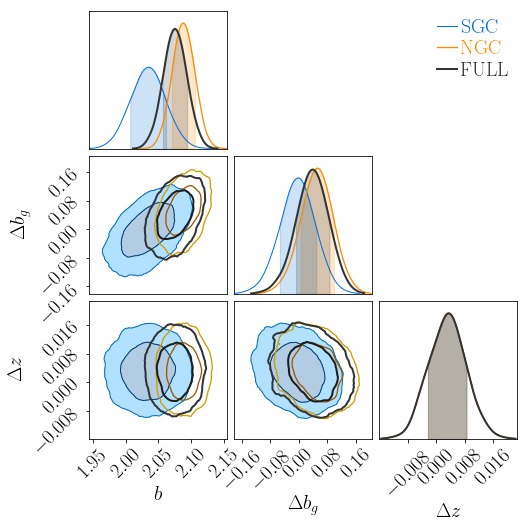

In [219]:
figname = '../paper_figure/test.pdf'
params_name = [r'$b$', r'$\Delta b_{g}$', r'$\Delta z$']
#params3_value = [0.0]
c = plot_triple([bias_dmass_sgc_nz, bias_dmass_ngc_nz, bias_dmass_full_nz], \
            [params_name, params_name, params_name, params_name, params_name],\
            None, figname,\
            chain_names=['SGC', 'NGC', 'FULL', 'FULL fixnz', 'SGC fixnz'],
            #extents = [[-0.25,0.4], [-0.03, 0.04]],
            #linewidths = [2,2,2,2,2],
            #shade = [2,2,2,2,1],  
            #shade_alpha = [0.0, 0, 0., 0., 0.],
            kde=[1,1,1,1,1], plot_hists=True,
            #figsize = (5,5), 
            #keep=[1],
            #colors = ['blue', 'black','orange', 'red']
            colors = [cmass_sgc_color, 'orange', cmass_full_color, 'red', 'purple']
           )

#table = c.analysis.get_latex_table(caption="Results for the tested models", label="tab:example")

In [166]:
delta_bias_dmass_full_fixnz_name = '/n/des/lee.5922/programs/cosmolike/\
cosmosis/output/wgtheta/residual_auto_dmass_cmass_full/emcee/\
emcee_residual_auto_dmass_cmass_full_nzfix_covmocks.txt'
bias_prior_full_fixnz = np.genfromtxt(delta_bias_dmass_full_fixnz_name)[5000:,0]
delta_bias_dmass_full_fixnz = np.genfromtxt(delta_bias_dmass_full_fixnz_name)[5000:,1]
bias_dmass_full_fixnz = 2.0838 - delta_bias_dmass_full_fixnz #/2.

In [137]:
bias_dmass_full_fixnz.size

82780

In [202]:
dir = '/n/des/lee.5922/programs/cosmolike/cosmosis/output/wgtheta/'
fixnz_name = dir+'residual_auto_cmass_ngc_cmass_sgc/emcee/emcee_residual_auto_cmass_ngc_cmass_sgc_nzfix_covmocks.txt'
bias_cmass_sgc_fixnz = np.genfromtxt(fixnz_name)[5000:,0]
delta_bias_cmass_sgc_fixnz = np.genfromtxt(fixnz_name)[5000:,1]
print delta_bias_cmass_sgc_fixnz.size

12520


In [199]:
dir = '/n/des/lee.5922/programs/cosmolike/cosmosis/output/wgtheta/'
fixnz_name = dir+'residual_auto_cmass_ngc_cmass_sgc/emcee/emcee_residual_auto_cmass_ngc_cmass_sgc_nzfix_covmocks.test.txt'
#bias_cmass_sgc_fixnz_test = np.genfromtxt(fixnz_name)[5000:,0]
delta_bias_cmass_sgc_fixnz_test = np.genfromtxt(fixnz_name)[5000:,1] * -1.0
print delta_bias_cmass_sgc_fixnz_test.size

20620


In [201]:
fixnz_name = '/n/des/lee.5922/programs/cosmolike/\
cosmosis/output/wgtheta/residual_auto_dmass_cmass_sgc/emcee/emcee_residual_auto_dmass_cmass_sgc_nzfix_covmocks.txt'

#bias_cmass_sgc_fixnz = np.genfromtxt(fixnz_name)[0:,0]
delta_bias_dmass_sgc_fixnz = np.genfromtxt(fixnz_name)[500:,1]
print delta_bias_dmass_sgc_fixnz.shape

(1660,)


plot save to  ../paper_figure/bias_difference_wtheta_v3.pdf


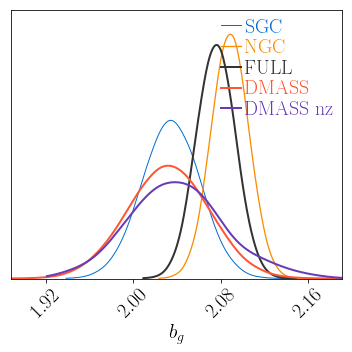

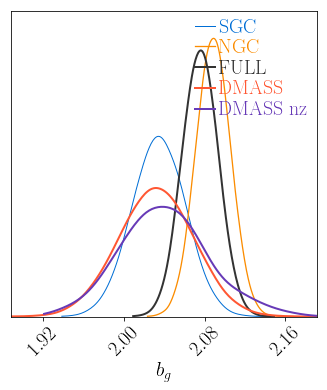

In [174]:
figname = '../paper_figure/bias_difference_wtheta_v3.pdf'
params3_name = [r'$b_{g}$']
params3_value = [2.0]
c = plot_triple([bias_sgc, bias_ngc, bias_full, bias_dmass, bias_dmass_nz], \
            [params3_name, params3_name, params3_name, params3_name, params3_name],\
            None, figname,\
            chain_names=['SGC', 'NGC', 'FULL', 'DMASS', 'DMASS nz'],
            #extents = [[-0.25,0.4], [-0.03, 0.04]],
            #linewidths = [2,2,2,2,2],
            #shade = [2,2,2,2,1],  
            #shade_alpha = [0.0, 0, 0., 0., 0.],
            kde=[1,1,1,1,1], plot_hists=True,
            figsize = (5,5),
            #colors = ['blue', 'black','orange', 'red']
            colors = [cmass_sgc_color, 'orange', cmass_full_color, dmass_color, 'purple']
           )

#table = c.analysis.get_latex_table(caption="Results for the tested models", label="tab:example")

plot save to  ../paper_figure/delta_bias_difference_wtheta.pdf


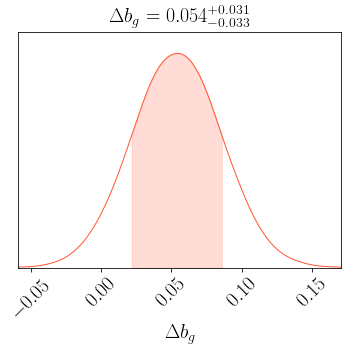

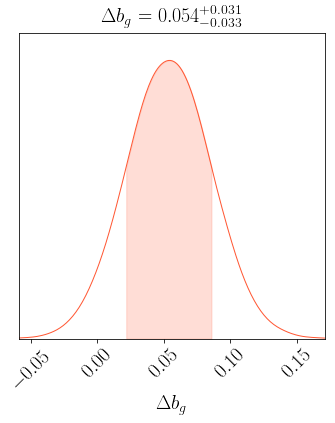

In [223]:
figname = '../paper_figure/delta_bias_difference_wtheta.pdf'
params_name = [r'$\Delta b_{g}$']
#params3_value = [0.0]
c = plot_triple([delta_bias_ngc_sgc], \
            [params_name],\
            None, figname,\
            chain_names=[None],
            #extents = [[-0.25,0.4], [-0.03, 0.04]],
            #linewidths = [2,2,2,2,2],
            #shade = [2,2,2,2,1],  
            #shade_alpha = [0.0, 0, 0., 0., 0.],
            kde=[1,1,0,0,0], plot_hists=True,
            figsize = (5,5), summary = [None, None],
            #colors = ['blue', 'black','orange', 'red']
            colors = [dmass_color, cmass_full_color]
           )

#table = c.analysis.get_latex_table(caption="Results for the tested models", label="tab:example")

plot save to  ../paper_figure/delta_bias_difference_wtheta_dmass_v2.pdf


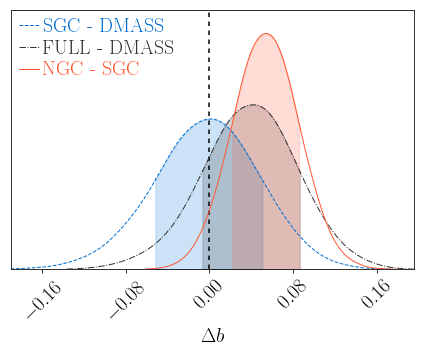

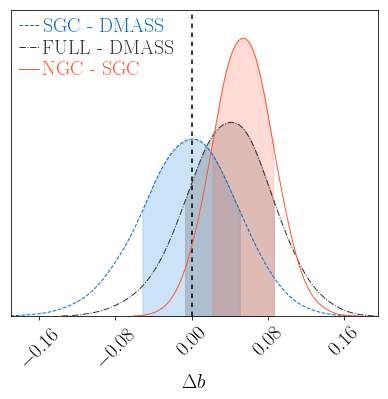

In [330]:
figname = '../paper_figure/delta_bias_difference_wtheta_dmass_v2.pdf'
params_name = [r'$\Delta b$']
#params3_value = [0.0]
c = plot_triple([delta_bias_dmass_sgc_nz, delta_bias_dmass_full_nz, delta_bias_ngc_sgc], \
            [params_name, params_name, params_name, params_name],\
            [0.0], figname,\
            chain_names=['SGC - DMASS', 'FULL - DMASS', 'NGC - SGC'],
            #extents = [[-0.25,0.4], [-0.03, 0.04]],
            linewidths = [1.,1.,1,1,1],
            linestyles = ['--', '-.', '-'],
            #shade = [0,0,0,0,1],  
            #shade_alpha = [0.0, 0, 0., 0., 0.],
            kde=[1,1,1,1,1], plot_hists=True,
            figsize = (6,5), 
            #colors = ['blue', 'black','orange', 'red']
            colors = [cmass_sgc_color, cmass_full_color, dmass_color, 'purple']
           )

#table = c.analysis.get_latex_table(caption="Results for the tested models", label="tab:example")

In [248]:
read_summary(c)

------------------------
chain 0
-- $\Delta b_{g}$  0.00197 + 0.04869 - 0.05375
------------------------
chain 1
-- $\Delta b_{g}$  0.05258 + 0.04687 - 0.04572
------------------------
chain 2
-- $\Delta b_{g}$  0.05450 + 0.03130 - 0.03268


plot save to  ../paper_figure/delta_bias_difference_wtheta_dmass_nz.pdf


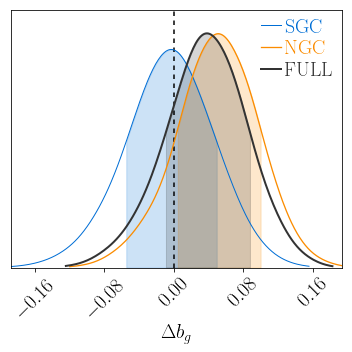

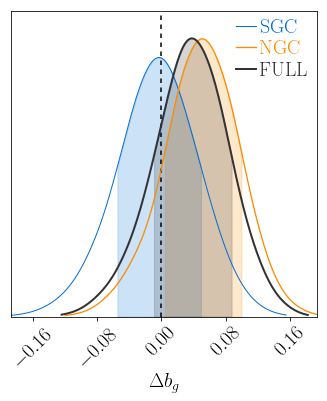

In [177]:
figname = '../paper_figure/delta_bias_difference_wtheta_dmass_nz.pdf'
params_name = [r'$\Delta b_{g}$']
#params3_value = [0.0]
c = plot_triple([delta_bias_dmass_sgc_nz, delta_bias_dmass_ngc_nz, delta_bias_dmass_full_nz], \
            [params_name, params_name, params_name, params_name, params_name],\
            [0.0], figname,\
            chain_names=['SGC', 'NGC', 'FULL', 'FULL fixnz', 'SGC fixnz'],
            #extents = [[-0.25,0.4], [-0.03, 0.04]],
            #linewidths = [2,2,2,2,2],
            #shade = [2,2,2,2,1],  
            #shade_alpha = [0.0, 0, 0., 0., 0.],
            kde=[1,1,1,1,1], plot_hists=True,
            figsize = (5,5), 
            #colors = ['blue', 'black','orange', 'red']
            colors = [cmass_sgc_color, 'orange', cmass_full_color, 'red', 'purple']
           )

#table = c.analysis.get_latex_table(caption="Results for the tested models", label="tab:example")

plot save to  ../paper_figure/delta_bias_difference_wtheta.test.pdf


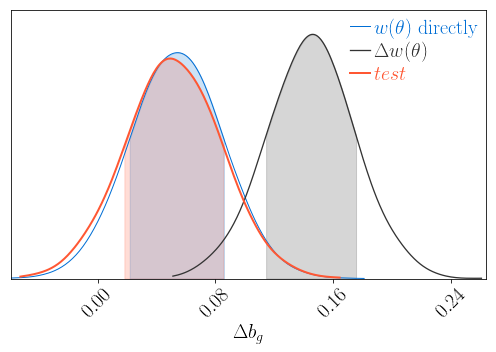

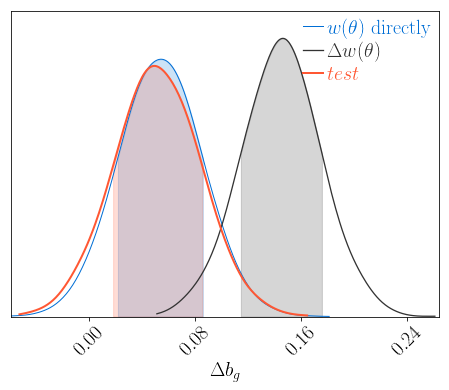

In [203]:
figname = '../paper_figure/delta_bias_difference_wtheta.test.pdf'
params_name = [r'$\Delta b_{g}$']
#params3_value = [0.0]
c = plot_triple([delta_bias_ngc_sgc, delta_bias_cmass_sgc_fixnz, delta_bias_cmass_sgc_fixnz_test], \
            [params_name, params_name, params_name],\
            None, figname,\
            chain_names=[r'$w(\theta)$ directly', r'$\Delta w(\theta)$', r'$ test $'],
            #extents = [[-0.25,0.4], [-0.03, 0.04]],
            #linewidths = [2,2,2,2,2],
            #shade = [2,2,2,2,1],  
            #shade_alpha = [0.0, 0, 0., 0., 0.],
            kde=[1,1,1,0,0], plot_hists=True,
            figsize = (7,5), 
            #colors = ['blue', 'black','orange', 'red']
            colors = [cmass_sgc_color, cmass_full_color, dmass_color]
           )

#table = c.analysis.get_latex_table(caption="Results for the tested models", label="tab:example")

# Appendix - 3D clustering

In [8]:

#theory_corr = np.genfromtxt('../../../bandpower/SNR/data_txt/datav/mcmc_Ashley_xionly_b_p0.datavector')[1500:1500+42]
#theory_rr = np.linspace(32, 200, 43)[:-1] + 2.5

s_th, xi0_th, xi2_th, _ = np.genfromtxt('/n/des/lee.5922/Dropbox/repositories/bandpower/SNR/output/test_mcmc_P_lin//Xi.txt', unpack=True)
#s_th, xi02, xi22, xi42 = np.genfromtxt('/n/des/lee.5922/Dropbox/repositories/bandpower/SNR/output/test_mcmc_P_nl///Xi.txt', unpack=True)

In [7]:

datavector = np.genfromtxt('/n/des/lee.5922/Dropbox/repositories/CMASS/code//data_txt/3D_clustering/mcmc//datavector.txt')

#s_th = s_th[7:-4]
sbin = np.linspace(40, 180, 29)
s_th = sbin[:-1] + 2.5
xi0_th = datavector[1500:1500+28][::-1]
xi2_th = datavector[1500+28:1500+28+28][::-1]
#xi0_th = datavector[1500:1500+28]
#print s_th.shape

In [104]:
scenter_th

array([ 42.5,  47.5,  52.5,  57.5,  62.5,  67.5,  72.5,  77.5,  82.5,
        87.5,  92.5,  97.5, 102.5, 107.5, 112.5, 117.5, 122.5, 127.5,
       132.5, 137.5, 142.5, 147.5, 152.5, 157.5, 162.5, 167.5, 172.5,
       177.5])

In [10]:
DAT_measurement = np.genfromtxt('../../../bandpower/SNR/data_txt/cov/Pellejero-Ibanez/Pellejero-Ibanez_2016_LOWZDR12_CMASSDR12_correlation_function_monopole_z43z75.dat')
r_measurement = DAT_measurement[:,0]
xi_mono_measu = DAT_measurement[:,1]


DAT_noz = np.genfromtxt('../data_txt/3D_clustering/cmass_full/cfz_multipole_single.txt', unpack=False)
_, meanr, _, xi_cmass_mono, xi_cmass_quad =[ DAT_noz[7:-4, i] for i in range(5) ]
DAT_z = np.genfromtxt('../data_txt/3D_clustering/cmass_full_z43z75//cfz_multipole_single.txt', unpack=False)
_, meanr, _, xi_cmass_mono_z, xi_cmass_quad_z = [ DAT_z[7:-4, i] for i in range(5) ]

#cov_measurement = np.genfromtxt('../../../bandpower/SNR/data_txt/cov/Pellejero-Ibanez/Pellejero-Ibanez_2016_CMASSDR12_covariance_matrix.dat')
#cov_mono = cov_measurement[:28, :28]
#cov_quad = cov_measurement[28:, 28:]
#xi_err0 = np.sqrt(cov_mono.diagonal())
#xi_err2 = np.sqrt(cov_quad.diagonal())

In [144]:
## convert to mcmc datavector
p_empty = np.zeros(1500)
xi_cmass_hexa = np.zeros(28)
xi_combine = np.hstack(( p_empty, xi_cmass_mono[::-1], xi_cmass_quad[::-1], xi_cmass_hexa ))
xi_combine_z = np.hstack(( p_empty, xi_cmass_mono_z[::-1], xi_cmass_quad_z[::-1], xi_cmass_hexa ))

np.savetxt('../data_txt/3D_clustering/mcmc/mcmc_cmass_zcut_xionly_b_02.datavector', xi_combine_z)
np.savetxt('../data_txt/3D_clustering/mcmc/mcmc_cmass_nozcut_xionly_b_02.datavector', xi_combine)

print xi_combine.size, xi_combine_z.size

1584 1584


In [124]:
"""
covfile = np.genfromtxt('../../../bandpower/SNR/data_txt/cov/Pellejero-Ibanez/Pellejero-Ibanez_2016_LOWZDR12_CMASSDR12_covariance_matrix_from_mocks.dat')

cov_mock = np.zeros((112,112))
for i in range(covfile.shape[0]):
    x_ind, y_ind, value = covfile[i, :]
    #print x_ind, y_ind, value
    cov_mock[int(x_ind)-1, int(y_ind)-1] = value

cov_mock_mono = cov_mock[:28, :28]
cov_mock_quad = cov_mock[56:28+56, 56:28+56]

cov_cross = cov_mock[:28, 56:28+56] 
cov_cross2 = cov_mock[56:28+56, :28] 
cov_full = np.vstack(( np.hstack(( cov_mock_mono, cov_cross )), np.hstack(( cov_cross2, cov_mock_quad )) ))

#np.savetxt('../../../bandpower/SNR/data_txt/cov/Pellejero-Ibanez/Pellejero-Ibanez_2016_CMASSDR12_monopole_covariance_matrix_from_mocks.dat', cov_mono)
#np.savetxt('../../../bandpower/SNR/data_txt/cov/Pellejero-Ibanez/Pellejero-Ibanez_2016_CMASSDR12_quadrupole_covariance_matrix_from_mocks.dat', cov_quad)
#np.savetxt('../../../bandpower/SNR/data_txt/cov/Pellejero-Ibanez/Pellejero-Ibanez_2016_CMASSDR12_covariance_matrix_from_mocks.dat', cov_full)
#np.savetxt('../../../bandpower/SNR/data_txt/cov/Pellejero-Ibanez/Pellejero-Ibanez_2016_CMASSDR12_fisher_matrix_from_mocks.dat', np.linalg.inv(cov_full))


cov_full_rot = np.vstack(( np.hstack(( cov_mock_mono[::-1, ::-1], cov_cross[::-1, ::-1] )), 
                          np.hstack(( cov_cross2[::-1, ::-1], cov_mock_quad[::-1, ::-1] )) ))

#cov_full_rot = cov_full[::-1, ::-1]
np.savetxt('../data_txt/3D_clustering/mcmc/Pellejero-Ibanez_2016_CMASSDR12_monopole_fisher_matrix_from_mocks.dat', np.linalg.inv(cov_mock_mono) )
np.savetxt('../data_txt/3D_clustering/mcmc/Pellejero-Ibanez_2016_CMASSDR12_quadrupole_fisher_matrix_from_mocks.dat', np.linalg.inv(cov_mock_quad))
np.savetxt('../data_txt/3D_clustering/mcmc/Pellejero-Ibanez_2016_CMASSDR12_covariance_matrix_from_mocks.dat', cov_full)
np.savetxt('../data_txt/3D_clustering/mcmc/Pellejero-Ibanez_2016_CMASSDR12_fisher_matrix_from_mocks.dat', np.linalg.inv(cov_full))

"""

In [223]:

dir = '/n/des/lee.5922/Dropbox/repositories/bandpower/SNR/data_txt/cov/Chuang/single_probe_files_for_collaboration_webpage/'
covfile = np.genfromtxt(dir + 'Chuang_2016_LOWZDR12_CMASSDR12_covariance_matrix_from_mocks_z43z75.dat')
cov_mock = np.zeros((56,56))
for i in range(covfile.shape[0]):
    x_ind, y_ind, value = covfile[i, :]
    #print x_ind, y_ind, value
    cov_mock[int(x_ind)-1, int(y_ind)-1] = value

cov_mock_mono = cov_mock[:28, :28]
cov_mock_quad = cov_mock[-28:, -28:]

cov_cross = cov_mock[:28, 28:] 
cov_cross2 = cov_mock[28:, :28] 
#cov_full = np.vstack(( np.hstack(( cov_mock_mono, cov_cross )), np.hstack(( cov_cross2, cov_mock_quad )) ))

cov_full = cov_mock.copy()
#np.savetxt('../../../bandpower/SNR/data_txt/cov/Pellejero-Ibanez/Pellejero-Ibanez_2016_CMASSDR12_monopole_covariance_matrix_from_mocks.dat', cov_mono)
#np.savetxt('../../../bandpower/SNR/data_txt/cov/Pellejero-Ibanez/Pellejero-Ibanez_2016_CMASSDR12_quadrupole_covariance_matrix_from_mocks.dat', cov_quad)
#np.savetxt('../../../bandpower/SNR/data_txt/cov/Pellejero-Ibanez/Pellejero-Ibanez_2016_CMASSDR12_covariance_matrix_from_mocks.dat', cov_full)
#np.savetxt('../../../bandpower/SNR/data_txt/cov/Pellejero-Ibanez/Pellejero-Ibanez_2016_CMASSDR12_fisher_matrix_from_mocks.dat', np.linalg.inv(cov_full))


cov_full_rot = np.vstack(( np.hstack(( cov_mock_mono[::-1, ::-1], cov_cross[::-1, ::-1] )), 
                          np.hstack(( cov_cross2[::-1, ::-1], cov_mock_quad[::-1, ::-1] )) ))

#cov_full_rot = cov_full[::-1, ::-1]
#np.savetxt('../data_txt/3D_clustering/mcmc/Pellejero-Ibanez_2016_CMASSDR12_monopole_fisher_matrix_from_mocks.dat', np.linalg.inv(cov_mock_mono) )
#np.savetxt('../data_txt/3D_clustering/mcmc/Pellejero-Ibanez_2016_CMASSDR12_quadrupole_fisher_matrix_from_mocks.dat', np.linalg.inv(cov_mock_quad))
np.savetxt('../data_txt/3D_clustering/mcmc/Chuang_2016_LOWZDR12_CMASSDR12_covariance_matrix_from_mocks_z43z75.dat', cov_full)
np.savetxt('../data_txt/3D_clustering/mcmc/Chuang_2016_LOWZDR12_CMASSDR12_fisher_matrix_from_mocks_z43z75.dat', np.linalg.inv(cov_full))

np.savetxt('../data_txt/3D_clustering/mcmc/Chuang_2016_LOWZDR12_CMASSDR12_covariance_matrix_from_mocks_z43z75_flip.dat', cov_full_rot)
np.savetxt('../data_txt/3D_clustering/mcmc/Chuang_2016_LOWZDR12_CMASSDR12_fisher_matrix_from_mocks_z43z75_flip.dat', np.linalg.inv(cov_full_rot))

In [13]:
cov_mock_mono = np.genfromtxt('../../../bandpower/SNR/data_txt/cov/Pellejero-Ibanez/Pellejero-Ibanez_2016_CMASSDR12_monopole_covariance_matrix_from_mocks.dat')
cov_mock_quad = np.genfromtxt('../../../bandpower/SNR/data_txt/cov/Pellejero-Ibanez/Pellejero-Ibanez_2016_CMASSDR12_quadrupole_covariance_matrix_from_mocks.dat')

xi_err0 = np.sqrt(cov_mock_mono.diagonal())
xi_err2 = np.sqrt(cov_mock_quad.diagonal())

In [15]:
cov_mock = np.genfromtxt('../data_txt/3D_clustering/mcmc/Chuang_2016_LOWZDR12_CMASSDR12_covariance_matrix_from_mocks_z43z75.dat')
#cov_mock_quad = np.genfromtxt('../../../bandpower/SNR/data_txt/cov/Pellejero-Ibanez/Pellejero-Ibanez_2016_CMASSDR12_quadrupole_covariance_matrix_from_mocks.dat')
xi_err = np.sqrt(cov_mock.diagonal()) 
xi_err0 = xi_err[:28] #np.sqrt(cov_.diagonal())
xi_err2 = xi_err[28:] #np.sqrt(cov_quad.diagonal())

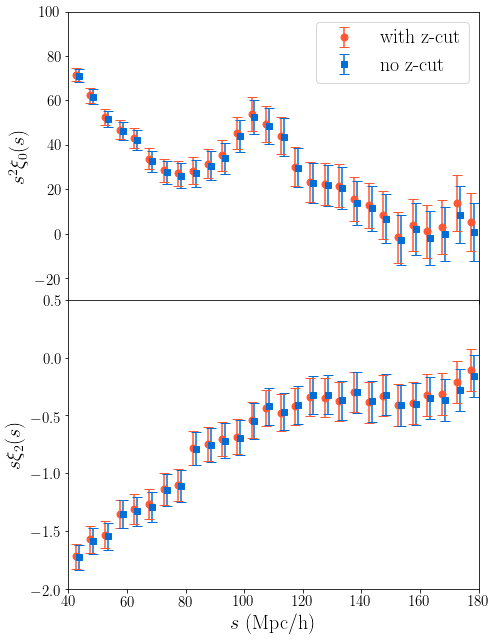

In [35]:
fig, (ax, ax2) = plt.subplots(2, 1, figsize = (7,9))

#ax.plot(s_th, s_th**2*xi0_th, ls = '--', color='k')
ax.errorbar(meanr, meanr**2*xi_cmass_mono, yerr = meanr**2*xi_err0, capsize=5, 
            fmt = 'o', markersize = 7, c=dmass_color, label=r'{\rm with z-cut}')
ax.errorbar(meanr+1, meanr**2*xi_cmass_mono_z, yerr = meanr**2*xi_err0, capsize=5, 
            fmt = 's', c=cmass_sgc_color, label=r'{\rm no z-cut}')
#ax.plot(meanr3, meanr3**2*xi_cmass3, label='full')

ax.set_ylabel(r'$s^2 \xi_0(s)$', fontsize = 20)
ax.set_xlim(40, 180)
ax.set_ylim(-30, 100)
ax.legend( fontsize = 20 )
ax.set_xticklabels([''])
#ax.text(40,-10, r'$\chi^2{\rm /dof} =~ $'+ r'${:0.2f}/{}$'.format(chi2_mono, Np), fontsize = 20)
ax.tick_params(labelsize = 15)

#fig, ax = plt.subplots()
#ax2.plot(s_th, s_th**1*xi2_th, label='theory', ls = '--', color='k')
ax2.errorbar(meanr, meanr**1*xi_cmass_quad, yerr = meanr**1*xi_err2, capsize=5, 
             fmt = 'o',  markersize = 7, c=dmass_color, label=r'{\rm with z-cut}')
ax2.errorbar(meanr+1, meanr**1*xi_cmass_quad_z, yerr = meanr**1*xi_err2, capsize=5, 
             fmt = 's', c=cmass_sgc_color,  label=r'{\rm no z-cut}')
ax2.set_xlim(40, 180)
ax2.set_ylim(-2, 0.5)
             
ax2.set_ylabel(r'$s \xi_2(s)$', fontsize = 20)
ax2.set_xlabel(r'$s~ {\rm (Mpc/h)}$', fontsize = 20)

ax2.tick_params(labelsize = 15)
#ax2.text(40,-2.6, r'$\chi^2{\rm /dof} =~ $'+ r'${:0.2f}/{}$'.format(chi2_quad, Np), fontsize = 20)

fig.tight_layout()
fig.subplots_adjust(hspace=0)

fig.savefig('../paper_figure/appendix_xi_v4.pdf')

# Galaxy bias from 3D clustering

sample size (80432, 1) (80396, 1)
plot save to  test.png


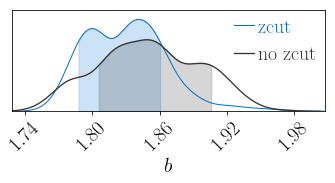

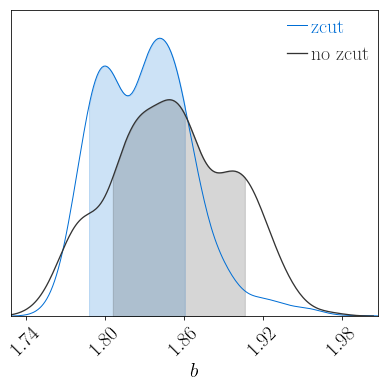

In [10]:
from plot_chain import plot_single, plot_triple #, plot_distributions, plot_summary_bar
path = '../data_txt/3D_clustering/mcmc/'
#ibanez_chains = np.genfromtxt(path+'like/like_mcmc_ibanez_xionly_b_monopole_sam120000')[300:,:-1]
#cmass_zcut_chains = np.genfromtxt(path+'chain_mcmc_cmass_zcut_xionly_b_02_sam120000')[1500:,:-1]
cmass_nozcut_chains = np.genfromtxt(path+'chain_mcmc_cmass_nozcut_xionly_b_02_flip_sam120000')[10000:,:-1]
cmass_zcut_chains = np.genfromtxt(path+'chain_mcmc_cmass_zcut_xionly_b_02_flip_sam120000')[10000:,:-1]
#dmass_chains = np.genfromtxt(path+'like/like_dmass_spt_bias_sam120000')[30000:,:-2]
#dmass_chains_cmasscov = np.genfromtxt(path+'like/like_dmass_spt_bias_cmasscov_sam120000')[30000:,:-2]
print 'sample size', cmass_zcut_chains.shape, cmass_nozcut_chains.shape

params = ['$b$']
truth = [2.0]
figname = 'test.png'
chain_names = ['zcut', 'no zcut', '']

#plot_triple([cmass_zcut_chains, cmass_nozcut_chains], 
#            [params, params], 
#            None, figname, chain_names = chain_names)

c = plot_triple([cmass_zcut_chains, cmass_nozcut_chains], 
            [params, params, params], 
            None, figname,\
            chain_names=chain_names, 
            #extents = [[-0.25,0.4], [-0.03, 0.04]],
            #linewidths = [2,2,2,2,2],
            #shade = [2,2,2,2,1],  
            #shade_alpha = [0.0, 0, 0., 0., 0.],
            kde=[1,1,0,0,0], plot_hists=True,
            figsize = (6,5), 
            #colors = ['blue', 'black','orange', 'red']
            colors = [cmass_sgc_color, cmass_full_color, dmass_color]
           )
#plot_single(dmass_chains, params, truth, figname)

sample size (200000, 2) (200000, 2)
plot save to  ../paper_figure/plot_distributions_cmass_v3.pdf


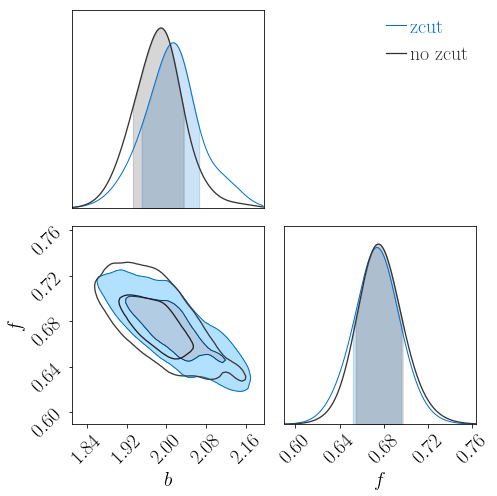

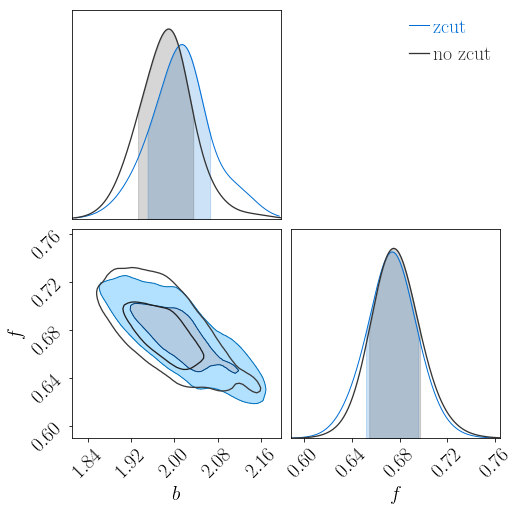

In [51]:
sigma8 = 1.0

from plot_chain import plot_single, plot_triple #, plot_distributions, plot_summary_bar
path = '../data_txt/3D_clustering/mcmc/'
#ibanez_chains = np.genfromtxt(path+'like/like_mcmc_ibanez_xionly_b_monopole_sam120000')[300:,:-1]
#cmass_zcut_chains = np.genfromtxt(path+'chain_mcmc_cmass_zcut_xionly_b_02_sam120000')[1500:,:-1]
cmass_nozcut_chains_bf = np.genfromtxt(path+'chain_mcmc_cmass_nozcut_xionly_bf_02_chuang_flip_sam300000')[100000:,:-1]
cmass_zcut_chains_bf = np.genfromtxt(path+'chain_mcmc_cmass_zcut_xionly_bf_02_chuang_flip_sam300000')[100000:,:-1]
#dmass_chains = np.genfromtxt(path+'like/like_dmass_spt_bias_sam120000')[30000:,:-2]
#dmass_chains_cmasscov = np.genfromtxt(path+'like/like_dmass_spt_bias_cmasscov_sam120000')[30000:,:-2]
print 'sample size', cmass_zcut_chains_bf.shape, cmass_nozcut_chains_bf.shape

params = ['$b$', '$f$']
truth = [sigma8*2.0, sigma8*0.74]
figname = '../paper_figure/plot_distributions_cmass_v3.pdf'
chain_names = ['zcut', 'no zcut', '']

#plot_triple([cmass_zcut_chains, cmass_nozcut_chains], 
#            [params, params], 
#            None, figname, chain_names = chain_names)

c = plot_triple([cmass_zcut_chains_bf*sigma8, cmass_nozcut_chains_bf*sigma8], 
            [params, params, params], 
            None, figname,\
            chain_names=chain_names, 
            #extents = [[-0.25,0.4], [-0.03, 0.04]],
            #linewidths = [2,2,2,2,2],
            #shade = [2,2,2,2,1],  
            #shade_alpha = [0.0, 0, 0., 0., 0.],
            kde=[3,3,0,0,0], plot_hists=True,
            #figsize = (6,5), 
            #colors = ['blue', 'black','orange', 'red']
            colors = [cmass_sgc_color, cmass_full_color, dmass_color]
           )
#plot_single(dmass_chains, params, truth, figname)

In [46]:
read_summary(c, chainname=['zcut', 'no zcut'])

------------------------
zcut
-- $f$         0.673^+0.021_-0.020
               673.48^+20.75_-19.66 \times 10^-3
-- $b$         2.019^+0.040_-0.066
               2019.11^+39.70_-65.86 \times 10^-3
------------------------
no zcut
-- $f$         0.675^+0.021_-0.018
               674.67^+20.95_-18.43 \times 10^-3
-- $b$         1.994^+0.036_-0.058
               1994.27^+35.72_-58.46 \times 10^-3


In [74]:
meanr, xi_cmass, xi_err, xi_cmass_quad, xi_err_quad = \
np.genfromtxt('../data_txt/full_cmass_zcut_ran10_jk100/cfz_multipole.txt', unpack=True)
cov = np.genfromtxt('../data_txt/full_cmass_zcut_ran10_jk100/cov.txt')
cov_mono = cov[:meanr.size, :meanr.size]
cov_quad = cov[-meanr.size:, -meanr.size:]
#meanr, xi_cmass, xi_err, xi_cmass_quad, xi_err_quad = cmass_corr[:,0], cmass_corr[:,1],cmass_corr[:,2]

meanr2, xi_cmass2, xi_err2, xi_cmass2_quad, xi_err2_quad = \
np.genfromtxt('../data_txt/full_cmass_ran10_jk100/cfz_multipole.txt', unpack=True)
cov2 = np.genfromtxt('../data_txt/full_cmass_ran10_jk100/cov.txt')
cov_mono2 = cov2[:meanr2.size, :meanr2.size]
cov_quad2 = cov2[-meanr2.size:, -meanr2.size:]
#meanr2, xi_cmass2, xi_err2, xi_cmass2_quad, xi_err2_quad = cmass_corr[:,0], cmass_corr[:,1],cmass_corr[:,2]

meanr3, xi_cmass3, xi_cmass3_quad, = \
np.genfromtxt('../data_txt/full_cmass_single/cfz_multipole_single.txt', unpack=True)
#meanr2, xi_cmass2, xi_err2, xi_cmass2_quad, xi_err2_quad = cmass_corr[:,0], cmass_corr[:,1],cmass_corr[:,2]


theory_corr = np.genfromtxt('../../../bandpower/SNR/data_txt/datav/mcmc_Ashley_xionly_b_p0.datavector')[1500:1500+42]
theory_rr = np.linspace(32, 200, 43)[:-1] + 2.5

rr, xi0, xi2, xi4 = np.genfromtxt('/n/des/lee.5922/Dropbox/repositories/bandpower/SNR/output/test_mcmc_P_lin//Xi.txt', unpack=True)
rr2, xi02, xi22, xi42 = np.genfromtxt('/n/des/lee.5922/Dropbox/repositories/bandpower/SNR/output/test_mcmc_P_nl///Xi.txt', unpack=True)

In [77]:
mask = np.genfromtxt('/n/des/lee.5922/Dropbox/repositories/bandpower/SNR/output/full_cmass_zcut/mask.txt')
mask

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0.])

In [80]:
mask = np.genfromtxt('/n/des/lee.5922/Dropbox/repositories/bandpower/SNR/output/full_cmass_zcut/mask.txt')

datav = np.hstack([xi_cmass, xi_cmass_quad])
DAT = np.column_stack(( np.arange(datav.size), datav ))
np.savetxt('../data_txt/full_cmass_zcut_ran10_jk100/datavector.txt', DAT)

fisher = np.linalg.inv(cov)
np.savetxt('../data_txt/full_cmass_zcut_ran10_jk100/fisher.txt', fisher)

datav2 = np.hstack([xi_cmass2, xi_cmass2_quad])
DAT2 = np.column_stack(( np.arange(datav2.size), datav2 ))
np.savetxt('../data_txt/full_cmass_ran10_jk100/datavector.txt', DAT2)

fisher2 = np.linalg.inv(cov2)
np.savetxt('../data_txt/full_cmass_ran10_jk100/fisher.txt', fisher2)

In [81]:
pwd

u'/n/des/lee.5922/Dropbox/repositories/CMASS/code/notebook'

In [82]:
np.linspace(20, 200, 37)

array([ 20.,  25.,  30.,  35.,  40.,  45.,  50.,  55.,  60.,  65.,  70.,
        75.,  80.,  85.,  90.,  95., 100., 105., 110., 115., 120., 125.,
       130., 135., 140., 145., 150., 155., 160., 165., 170., 175., 180.,
       185., 190., 195., 200.])

In [83]:
cov_tot = cov_mono + cov_mono2
cov_tot_quad = cov_quad + cov_quad2

Cutscale = 4
Np = meanr[Cutscale:].size
print meanr[Cutscale], Np

chi2_mono = chisqr( xi_cmass[Cutscale:], xi_cmass2[Cutscale:], cov_tot[Cutscale:,Cutscale:] )
chi2_quad = chisqr( xi_cmass_quad[Cutscale:], xi_cmass2_quad[Cutscale:], cov_tot_quad[Cutscale:,Cutscale:] )

print chi2_mono, chi2_quad

23.165384615384617 35
4.67566512075679 6.924850138164177


In [35]:
np.sum((xi_cmass- xi_cmass2)**2 * 1./(xi_err**2 + xi_err2**2))

275.6336082742583

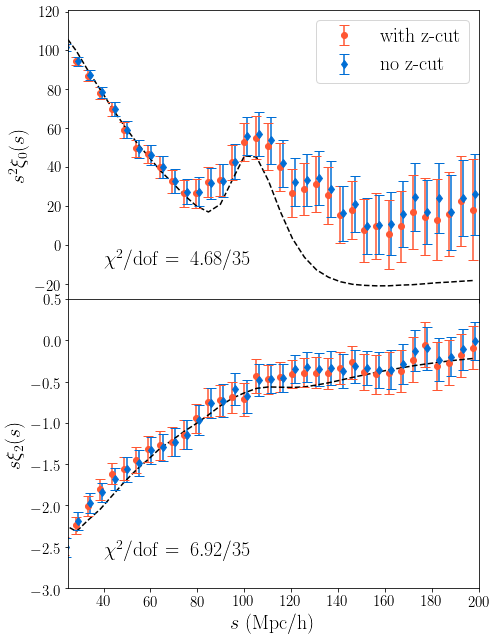

In [84]:
fig, (ax, ax2) = plt.subplots(2, 1, figsize = (7,9))

#ax.plot(r_measurement, r_measurement**2*xi_mono_measu, label='Ibanez')
#ax.plot(rr, rr**2*xi0, label='theory', color='k')
ax.plot(rr, rr**2*xi0, ls = '--', color='k')
#ax.plot(rr2, rr2**2*xi02, label='theory_nl', color='k')
ax.errorbar(meanr, meanr**2*xi_cmass, yerr = meanr**2*xi_err, capsize=5, 
            fmt = 'o', c=dmass_color, label=r'{\rm with z-cut}')
ax.errorbar(meanr2+1, meanr2**2*xi_cmass2, yerr = meanr2**2*xi_err2, capsize=5, 
            fmt = 'd', c=cmass_sgc_color, label=r'{\rm no z-cut}')
#ax.plot(meanr3, meanr3**2*xi_cmass3, label='full')

ax.set_ylabel(r'$s^2 \xi_0(s)$', fontsize = 20)
ax.set_xlim(25, 200)
ax.legend( fontsize = 20 )
ax.set_xticklabels([''])
ax.text(40,-10, r'$\chi^2{\rm /dof} =~ $'+ r'${:0.2f}/{}$'.format(chi2_mono, Np), fontsize = 20)
ax.tick_params(labelsize = 15)

#fig, ax = plt.subplots()
ax2.plot(rr, rr**1*xi2, label='theory', ls = '--', color='k')
#ax.plot(rr2, rr2**2*xi22, label='theory_nl', color='k', ls = '-')
ax2.errorbar(meanr, meanr**1*xi_cmass_quad, yerr = meanr**1*xi_err_quad, capsize=5, 
             fmt = 'o',  c=dmass_color, label=r'{\rm with z-cut}')
ax2.errorbar(meanr2+1, meanr2**1*xi_cmass2_quad, yerr = meanr2**1*xi_err2_quad, capsize=5, 
             fmt = 'd', c=cmass_sgc_color,  label=r'{\rm no z-cut}')
ax2.set_xlim(25, 200)
ax2.set_ylim(-3, 0.5)
             
ax2.set_ylabel(r'$s \xi_2(s)$', fontsize = 20)
ax2.set_xlabel(r'$s~ {\rm (Mpc/h)}$', fontsize = 20)

ax2.tick_params(labelsize = 15)
ax2.text(40,-2.6, r'$\chi^2{\rm /dof} =~ $'+ r'${:0.2f}/{}$'.format(chi2_quad, Np), fontsize = 20)

fig.tight_layout()
fig.subplots_adjust(hspace=0)

fig.savefig('../paper_figure/appendix_xi.pdf')

In [86]:
mask = np.genfromtxt('/n/des/lee.5922/Dropbox/repositories/bandpower/SNR/output/full_cmass_zcut//mask.txt')

datav = np.hstack([xi_cmass, xi_cmass_quad])
DAT = np.column_stack(( np.arange(datav.size), datav ))
np.savetxt('../data_txt/full_cmass_zcut_small_ran10_jk100//datavector.txt', DAT)

fisher = np.linalg.inv(cov)
np.savetxt('../data_txt/full_cmass_zcut_small_ran10_jk100/fisher.txt', fisher)

datav2 = np.hstack([xi_cmass2, xi_cmass2_quad])
DAT2 = np.column_stack(( np.arange(datav2.size), datav2 ))
np.savetxt('../data_txt/full_cmass_small_ran10_jk100/datavector.txt', DAT2)

fisher2 = np.linalg.inv(cov2)
np.savetxt('../data_txt/full_cmass_small_ran10_jk100/fisher.txt', fisher2)

In [89]:
cov_tot = cov_mono + cov_mono2
cov_tot_quad = cov_quad + cov_quad2

Cutscale = 1
Np = meanr[Cutscale:].size
print meanr[Cutscale], Np

chi2_mono = chisqr( xi_cmass[Cutscale:], xi_cmass2[Cutscale:], cov_tot[Cutscale:,Cutscale:] )
chi2_quad = chisqr( xi_cmass_quad[Cutscale:], xi_cmass2_quad[Cutscale:], cov_tot_quad[Cutscale:,Cutscale:] )

print chi2_mono, chi2_quad

7.788461538461538 38
5.043602591616546 8.95916550895135


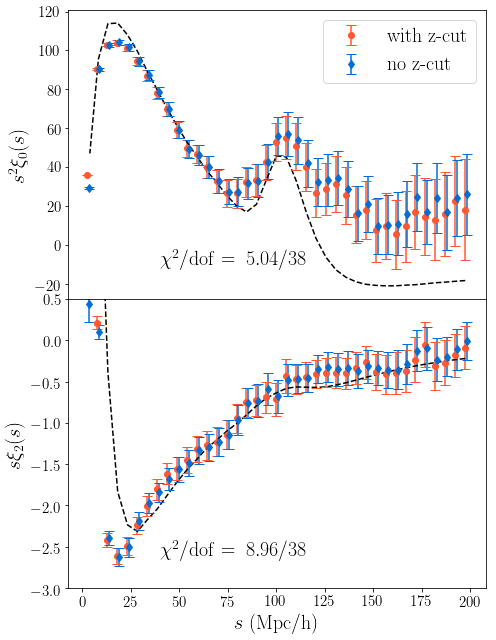

In [90]:
fig, (ax, ax2) = plt.subplots(2, 1, figsize = (7,9))

#ax.plot(r_measurement, r_measurement**2*xi_mono_measu, label='Ibanez')
#ax.plot(rr, rr**2*xi0, label='theory', color='k')
ax.plot(rr, rr**2*xi0, ls = '--', color='k')
#ax.plot(rr2, rr2**2*xi02, label='theory_nl', color='k')
ax.errorbar(meanr, meanr**2*xi_cmass, yerr = meanr**2*xi_err, capsize=5, 
            fmt = 'o', c=dmass_color, label=r'{\rm with z-cut}')
ax.errorbar(meanr2+1, meanr2**2*xi_cmass2, yerr = meanr2**2*xi_err2, capsize=5, 
            fmt = 'd', c=cmass_sgc_color, label=r'{\rm no z-cut}')
#ax.plot(meanr3, meanr3**2*xi_cmass3, label='full')

ax.set_ylabel(r'$s^2 \xi_0(s)$', fontsize = 20)
#ax.set_xlim(25, 200)
ax.legend( fontsize = 20 )
ax.set_xticklabels([''])
ax.text(40,-10, r'$\chi^2{\rm /dof} =~ $'+ r'${:0.2f}/{}$'.format(chi2_mono, Np), fontsize = 20)
ax.tick_params(labelsize = 15)

#fig, ax = plt.subplots()
ax2.plot(rr, rr**1*xi2, label='theory', ls = '--', color='k')
#ax.plot(rr2, rr2**2*xi22, label='theory_nl', color='k', ls = '-')
ax2.errorbar(meanr, meanr**1*xi_cmass_quad, yerr = meanr**1*xi_err_quad, capsize=5, 
             fmt = 'o',  c=dmass_color, label=r'{\rm with z-cut}')
ax2.errorbar(meanr2+1, meanr2**1*xi_cmass2_quad, yerr = meanr2**1*xi_err2_quad, capsize=5, 
             fmt = 'd', c=cmass_sgc_color,  label=r'{\rm no z-cut}')
#ax2.set_xlim(25, 200)
ax2.set_ylim(-3, 0.5)
             
ax2.set_ylabel(r'$s \xi_2(s)$', fontsize = 20)
ax2.set_xlabel(r'$s~ {\rm (Mpc/h)}$', fontsize = 20)

ax2.tick_params(labelsize = 15)
ax2.text(40,-2.6, r'$\chi^2{\rm /dof} =~ $'+ r'${:0.2f}/{}$'.format(chi2_quad, Np), fontsize = 20)

fig.tight_layout()
fig.subplots_adjust(hspace=0)

#fig.savefig('../paper_figure/appendix_xi.pdf')

In [20]:
gold_st82 = io.SearchAndCallFits(path = '/n/des/lee.5922/data/gold_cat/', keyword='Y1A1_GOLD_STRIPE82_v2_000')
gold_st82 = clean_gold(gold_st82)


--------------------------------
 calling catalog
--------------------------------
Y1A1_GOLD_STRIPE82_v2_000001.fits
Y1A1_GOLD_STRIPE82_v2_000002.fits
Y1A1_GOLD_STRIPE82_v2_000003.fits
Y1A1_GOLD_STRIPE82_v2_000004.fits
Y1A1_GOLD_STRIPE82_v2_000005.fits
Y1A1_GOLD_STRIPE82_v2_000006.fits
Y1A1_GOLD_STRIPE82_v2_000007.fits
Y1A1_GOLD_STRIPE82_v2_000008.fits


KeyboardInterrupt: 

In [21]:
gold_st82 = io.SearchAndCallFits(path = rootdir, keyword='gold_st82_prob.fits')


--------------------------------
 calling catalog
--------------------------------
gold_st82_prob.fits


In [15]:
#cmass_spec = esutil.io.read('/n/des/lee.5922/data/cmass_cat/galaxy_DR11v1_CMASS_South.fits.gz')
cmass_photo = esutil.io.read('/n/des/lee.5922/data/cmass_cat/galaxy_DR11v1_CMASS_South-photoObj.fits.gz')
cmass_stripe = Cuts.keepGoodRegion(cmass_photo)
#gold_train, cmass_train = matchCatalogsbyPosition( gold , cmass_stripe)
gold_train = train_sample.copy()

In [21]:
#cmass_photo = io.getSGCCMASSphotoObjcat()
#cmass_stripe = Cuts.keepGoodRegion(cmass_photo)
#gold_train, cmass_train = matchCatalogsbyPosition(gold_st82, cmass_photo)


--------------------------------
 calling BOSS SGC CMASS catalog
--------------------------------
Applying Healpix BOSS SGC footprint mask
Change healpix mask to spatial cut later..... Don't forget!!! 


In [22]:
g_sdss = cmass_train['MODELMAG'][:,1]-cmass_train['EXTINCTION'][:,1]
r_sdss = cmass_train['MODELMAG'][:,2]-cmass_train['EXTINCTION'][:,2]
i_sdss = cmass_train['MODELMAG'][:,3]-cmass_train['EXTINCTION'][:,3]
gr_sdss = g_sdss - r_sdss
ri_sdss = r_sdss - i_sdss

gr_des = gold_train['MAG_DETMODEL_G']- gold_train['MAG_DETMODEL_R']
ri_des = gold_train['MAG_DETMODEL_R']- gold_train['MAG_DETMODEL_I']

gr_gold = gold_st82['MAG_DETMODEL_G']- gold_st82['MAG_DETMODEL_R']
ri_gold = gold_st82['MAG_DETMODEL_R']- gold_st82['MAG_DETMODEL_I']

In [23]:
x = np.linspace(-2,4,10)
dperp = 0.55 + x/8.

In [24]:
gr_sdss_err = np.sqrt(cmass_train['MODELMAGERR'][:,1]**2 + cmass_train['MODELMAGERR'][:,2]**2)
ri_sdss_err = np.sqrt(cmass_train['MODELMAGERR'][:,2]**2 + cmass_train['MODELMAGERR'][:,3]**2)

gr_des_err = np.sqrt(gold_train['MAGERR_DETMODEL_G']**2 +  gold_train['MAGERR_DETMODEL_R']**2 )
ri_des_err = np.sqrt(gold_train['MAGERR_DETMODEL_R']**2 +  gold_train['MAGERR_DETMODEL_I']**2 )

In [25]:
dperpcut = ((ri_sdss - gr_sdss/8. < 0.55) & 
((gr_sdss>0.5)&(gr_sdss<0.96)|
 ((gr_sdss>1.43)&(gr_sdss<1.435))|
 ((gr_sdss>1.85)&(gr_sdss<3.0)) ) )

dperpcut_des = (ri_des - gr_des/8. < 0.5505) & (ri_des - gr_des/8. > 0.55035)
print np.sum(dperpcut), np.sum(dperpcut_des)

0 4


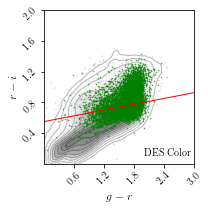

In [28]:
from chainconsumer import ChainConsumer

#seed(0)
#cov = normal(size=(3, 3))
#data = multivariate_normal(normal(size=3), np.dot(cov, cov.T), size=100000)

data_gold = np.column_stack( [gr_gold, ri_gold] )
data_sdss = np.column_stack( [gr_sdss, ri_sdss] )
data_des = np.column_stack( [gr_des, ri_des] )

c = ChainConsumer()
c.add_chain(data_gold, parameters=["$g-r$", "$r-i$"])
#c.add_chain(data_des)
c.configure(plot_hists=False, cloud=True, sigmas=np.linspace(0, 3, 10), colors ='grey', 
            shade_alpha = 0.7, kde=True)


fig = c.plotter.plot()
ax = fig.axes[0]
ax.plot(gr_des, ri_des, 'g.', markersize = 1, alpha = 0.7)
#ax.plot(gr_sdss, ri_sdss, '.',markersize = 1, alpha = 0.7)
ax.plot(x, dperp, 'r-', linewidth=1)
ax.set_ylim(0,2)
ax.set_xlim(0, 3)

ax.text(2.0, 0.1, 'DES  Color')
plt.tight_layout()

#fig.savefig('../paper_figure/gri_des.pdf')

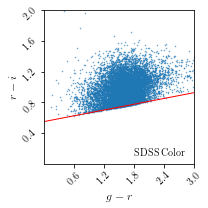

In [27]:
c = ChainConsumer()

dat = data_gold.copy()
dat[:,0] = dat[:,0]+10
dat[:,1] = dat[:,1]+10
c.add_chain(dat, parameters=["$g-r$", "$r-i$"])
#c.add_chain(data_des)
c.configure(plot_hists=False, cloud=False, sigmas=np.linspace(0, 3, 10), colors ='grey', 
            shade_alpha = 0.5, kde=True)


fig = c.plotter.plot()
ax = fig.axes[0]
#ax.plot(gr_des, ri_des, 'g.', markersize = 1, alpha = 0.7)
ax.plot(gr_sdss, ri_sdss, '.',markersize = 1, alpha = 0.7)
ax.plot(x, dperp, 'r-', linewidth=1)
ax.set_ylim(0,2)
ax.set_xlim(0,3)

ax.text(1.8, 0.1, 'SDSS  Color')

plt.tight_layout()
#fig.savefig('../paper_figure/gri_sdss.pdf')

In [196]:
cutmask = priorCut_test(gold_st82)
gold_cut_outlier = gold_st82[cutmask]

CHECK input catalog has only galaxies


In [197]:
#dperp_des = ri_des - gr_des/8.

gr_gold = gold_cut_outlier['MAG_DETMODEL_G']- gold_cut_outlier['MAG_DETMODEL_R']
ri_gold = gold_cut_outlier['MAG_DETMODEL_R']- gold_cut_outlier['MAG_DETMODEL_I']
dperp_gold = ri_gold - gr_gold/8.

In [199]:

Ncmass = []
Nall = []
for dp in np.linspace(0.3, 0.6, 31):
    dpmask = dperp_gold > dp
    gold_train, cmass_train = matchCatalogsbyPosition(gold_cut_outlier[dpmask], cmass_stripe)
    Ncmass.append(gold_train.size)
    Nall.append(gold_cut_outlier[dpmask].size)
    print dp, gold_train.size, gold_cut_outlier[dpmask].size

0.3 11304 371820
0.31 11288 350246
0.32 11274 329663
0.32999999999999996 11251 309987
0.33999999999999997 11224 291283
0.35 11187 273490
0.36 11134 256656
0.37 11068 241086
0.38 10968 227116
0.39 10860 214543
0.4 10708 203117
0.41 10542 192999
0.42 10302 183634
0.43 10030 175148
0.44 9732 167465
0.44999999999999996 9454 160306
0.45999999999999996 9121 153592
0.47 8772 147172
0.48 8424 141255
0.49 8050 135653
0.5 7676 130287
0.51 7292 125213
0.52 6957 120429
0.53 6667 115904
0.54 6358 111597
0.55 6025 107267
0.56 5696 103149
0.5700000000000001 5384 99194
0.5800000000000001 5084 95350
0.59 4804 91629
0.6 4527 87930


In [206]:
ncmass = np.array(Ncmass) * 1./np.array(Nall)
Nno = np.array(Nall) - np.array(Ncmass)

In [191]:
from run_DMASS import *

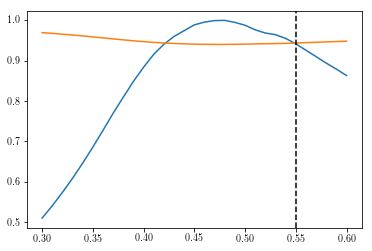

In [205]:
fig, ax = plt.subplots()
ax.plot( np.linspace(0.3, 0.6, 31), ncmass*1./ncmass.max() )
ax.plot( np.linspace(0.3, 0.6, 31), Nno *1./np.array(Nall)  )
ax.axvline(x = 0.55, ls='--', color='k')

In [94]:
fig, (ax, ax2) = plt.subplots(1,2,figsize=(15,5))

ax.plot(gr_sdss, ri_sdss, '.', markersize = 1)
ax.plot(x, dperp, 'r-', linewidth=2)

#ax.errorbar( gr_sdss[dperpcut], ri_sdss[dperpcut], xerr = gr_sdss_err[dperpcut], 
#            yerr = ri_sdss_err[dperpcut], fmt = 'o', color='black', zorder=10)

ax.text(0.2, 1.6, 'SDSS', fontsize=20)
ax.set_xlabel('model_g - model_r', fontsize=15)
ax.set_ylabel('model_r - model_i', fontsize=15)
ax.set_xlim(0,3.)
ax.set_ylim(0.2,1.8)


ax2.plot(gr_gold, ri_gold, '.', color = 'grey', markersize = 1, alpha = 1.0)
ax2.plot(gr_des, ri_des, 'g.', markersize = 1)
ax2.plot(x, dperp, 'r-', linewidth = 2)
#ax2.errorbar( gr_des[dperpcut], ri_des[dperpcut], xerr = gr_des_err[dperpcut], 
#            yerr = ri_des_err[dperpcut], fmt = '.', color='black', zorder=10)

ax2.text(0.2, 1.6, 'DES', fontsize=20)
ax2.set_xlabel('detmodel_g - detmodel_r', fontsize=15)
ax2.set_ylabel('detmodel_r - detmodel_i', fontsize=15)

ax2.set_xlim(0,3.)
ax2.set_ylim(0.2,1.8)

(0.2, 1.8)

Error in callback <function post_execute at 0x7f2d8a4fede8> (for post_execute):


RuntimeError: LaTeX was not able to process the following string:
'detmodel_g - detmodel_r'
Here is the full report generated by LaTeX: 

This is pdfTeX, Version 3.1415926-2.5-1.40.14 (TeX Live 2013)
 restricted \write18 enabled.
entering extended mode
(./e92e18ed7f59a71eaf3497610deab325.tex
LaTeX2e <2011/06/27>
Babel <v3.8m> and hyphenation patterns for english, dumylang, nohyphenation, lo
aded.
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2007/10/19 v1.4h Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.def))
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifpdf.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifvtex.sty)
(/usr/share/texlive/texmf-dist/tex/generic/ifxetex/ifxetex.sty)

Package geometry Warning: Over-specification in `h'-direction.
    `width' (5058.9pt) is ignored.


Package geometry Warning: Over-specification in `v'-direction.
    `height' (5058.9pt) is ignored.

)
No file e92e18ed7f59a71eaf3497610deab325.aux.
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1cmr.fd)
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
! Missing $ inserted.
<inserted text> 
                $
l.12 ...{15.000000}{18.750000}{\rmfamily detmodel_
                                                  g - detmodel_r}
! Extra }, or forgotten $.
l.12 ...750000}{\rmfamily detmodel_g - detmodel_r}
                                                  
! Missing $ inserted.
<inserted text> 
                $
l.13 \end{document}
                   
[1] (./e92e18ed7f59a71eaf3497610deab325.aux) )
(\end occurred inside a group at level 1)

### simple group (level 1) entered at line 12 ({)
### bottom level
(see the transcript file for additional information)
Output written on e92e18ed7f59a71eaf3497610deab325.dvi (1 page, 416 bytes).
Transcript written on e92e18ed7f59a71eaf3497610deab325.log.


RuntimeError: LaTeX was not able to process the following string:
'detmodel_r - detmodel_i'
Here is the full report generated by LaTeX: 

This is pdfTeX, Version 3.1415926-2.5-1.40.14 (TeX Live 2013)
 restricted \write18 enabled.
entering extended mode
(./11a30d6fd56ac36c954058bf036ae3c8.tex
LaTeX2e <2011/06/27>
Babel <v3.8m> and hyphenation patterns for english, dumylang, nohyphenation, lo
aded.
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2007/10/19 v1.4h Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.def))
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifpdf.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifvtex.sty)
(/usr/share/texlive/texmf-dist/tex/generic/ifxetex/ifxetex.sty)

Package geometry Warning: Over-specification in `h'-direction.
    `width' (5058.9pt) is ignored.


Package geometry Warning: Over-specification in `v'-direction.
    `height' (5058.9pt) is ignored.

)
No file 11a30d6fd56ac36c954058bf036ae3c8.aux.
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1cmr.fd)
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
! Missing $ inserted.
<inserted text> 
                $
l.12 ...{15.000000}{18.750000}{\rmfamily detmodel_
                                                  r - detmodel_i}
! Extra }, or forgotten $.
l.12 ...750000}{\rmfamily detmodel_r - detmodel_i}
                                                  
! Missing $ inserted.
<inserted text> 
                $
l.13 \end{document}
                   
[1] (./11a30d6fd56ac36c954058bf036ae3c8.aux) )
(\end occurred inside a group at level 1)

### simple group (level 1) entered at line 12 ({)
### bottom level
(see the transcript file for additional information)
Output written on 11a30d6fd56ac36c954058bf036ae3c8.dvi (1 page, 416 bytes).
Transcript written on 11a30d6fd56ac36c954058bf036ae3c8.log.


In [29]:
def mixing_SDSS_color(data, suffix = '', sdss = None, cmass = None ):
    
    #filter = ['G', 'R', 'I', 'Z']
    filter = [1,2,3,4]
    mag = ['CMODELMAG', 'MODELMAG']
    magtag = mag#[ m+'_'+f+suffix for m in mag for f in filter ]
    #del magtag[0], magtag[2]
    err = [ 'CMODELMAGERR','MODELMAGERR']
    errtag = err#[ e+'_'+f for e in err for f in filter ]
    #del errtag[0], errtag[2]
    
    
    print data['CMODELMAG'][:,0].size
    
    X = [ data[mt][:,i] for mt in magtag for i in filter ]
    del X[0], X[2]
    Xerr = [ data[mt][:,i] for mt in errtag for i in filter]
    del Xerr[0], Xerr[2]
    #reddeningtag = 'XCORR_SFD98'

    X = np.vstack(X).T
    Xerr = np.vstack(Xerr).T
    # mixing matrix
    W = np.array([
                  [1, 0, 0, 0, 0, 0],
                  [0, 1, 0, 0, 0, 0],    # i cmag
                  [0, 0, 1, -1, 0, 0],   # g-r
                  [0, 0, 0, 1, -1, 0],   # r-i
                  [0, 0, 0, 0, 1, -1]])  # i-z

    X = np.dot(X, W.T)

    Xcov = np.zeros(Xerr.shape + Xerr.shape[-1:])
    Xcov[:, range(Xerr.shape[1]), range(Xerr.shape[1])] = Xerr**2
    Xcov = np.tensordot(np.dot(Xcov, W.T), W, (-2, -1))
    return X, Xcov

In [2]:
sdss_photo = esutil.io.read('/n/des/huff.791/Projects/CMASS/Data/s82_350_355_emhuff.fit', upper=True)

NameError: name 'esutil' is not defined

In [30]:
X_cmass_train, Xcov_cmass_train = mixing_SDSS_color(cmass_train)

11033


In [31]:
X_cmass_train_new = [np.random.multivariate_normal( X_cmass_train[i], Xcov_cmass_train[i], 1 ) for i in range(cmass_train.size) ]



In [32]:
X_cmass_train_new = np.array(X_cmass_train_new)

In [33]:
new_gr_sdss = X_cmass_train_new[:,0][:,2]
new_ri_sdss = X_cmass_train_new[:,0][:,3]

In [57]:
xbins = np.linspace(0, 3.0, 150)
ybins = np.linspace(0.2, 1.8, 120)
Ngal_sdss, xedges, yedges = np.histogram2d(gr_sdss, ri_sdss, bins=(xbins, ybins), normed=False)
Ngal_des, xedges, yedges = np.histogram2d(gr_des, ri_des, bins=(xbins, ybins), normed=False)

Ngal_sdss[Ngal_sdss == 0] = np.nan
Ngal_des[Ngal_des == 0] = np.nan

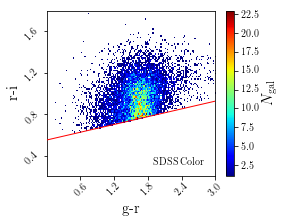

In [66]:
from chainconsumer import ChainConsumer

c = ChainConsumer()

dat = data_gold.copy()
dat[:,0] = dat[:,0]+10
dat[:,1] = dat[:,1]+10
c.add_chain(dat, parameters=["$g-r$", "$r-i$"])
#c.add_chain(data_des)
c.configure(plot_hists=False, cloud=False, sigmas=np.linspace(0, 3, 10), colors ='grey', 
            shade_alpha = 0.5, kde=False)


fig = c.plotter.plot(figsize=(4,3.2))
ax = fig.axes[0]

im = ax.imshow(np.rot90(Ngal_sdss), extent=(np.amin(xbins), np.amax(xbins), np.amin(ybins), np.amax(ybins)),
        cmap=plt.cm.jet, aspect='auto', zorder = 2 )#, 
cbar = fig.colorbar(im, ax=ax)
cbar.set_label(r'$N_{\rm gal}$', fontsize=15)
ax.plot(x, dperp, 'r-', linewidth=1, zorder = 3)

#ax.errorbar( gr_sdss[dperpcut], ri_sdss[dperpcut], xerr = gr_sdss_err[dperpcut], 
#            yerr = ri_sdss_err[dperpcut], fmt = 'o', color='black', zorder=10)


ax.set_xlabel('g-r', fontsize=15)
ax.set_ylabel('r-i', fontsize=15)
ax.set_xlim(0,3.)
ax.set_ylim(0.2,1.8)

ax.text(1.9, 0.3, 'SDSS  Color' )
plt.tight_layout()

fig.savefig('../paper_figure/gri_sdss_color_cbar.pdf')

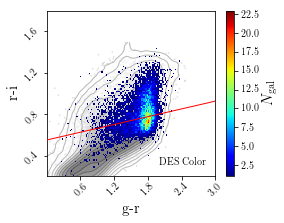

In [67]:
from chainconsumer import ChainConsumer

#seed(0)
#cov = normal(size=(3, 3))
#data = multivariate_normal(normal(size=3), np.dot(cov, cov.T), size=100000)

data_gold = np.column_stack( [gr_gold, ri_gold] )
data_sdss = np.column_stack( [gr_sdss, ri_sdss] )
data_des = np.column_stack( [gr_des, ri_des] )

c = ChainConsumer()
c.add_chain(data_gold, parameters=["$g-r$", "$r-i$"])
#c.add_chain(data_des)
c.configure(plot_hists=False, cloud=True, sigmas=np.linspace(0, 3, 10), colors ='grey', 
            shade_alpha = 0.7, kde=False)


fig = c.plotter.plot(figsize=(4,3.2))
ax = fig.axes[0]

ax.imshow(np.rot90(Ngal_des), extent=(np.amin(xbins), np.amax(xbins), np.amin(ybins), np.amax(ybins)),
        cmap=plt.cm.jet, aspect='auto', zorder = 2, alpha = 1.0 )#, 
cbar = fig.colorbar(im, ax=ax)
cbar.set_label(r'$N_{\rm gal}$', fontsize=15)
ax.plot(x, dperp, 'r-', linewidth=1, zorder = 3)

#ax.errorbar( gr_sdss[dperpcut], ri_sdss[dperpcut], xerr = gr_sdss_err[dperpcut], 
#            yerr = ri_sdss_err[dperpcut], fmt = 'o', color='black', zorder=10)


ax.set_xlabel('g-r', fontsize=15)
ax.set_ylabel('r-i', fontsize=15)
ax.set_xlim(0,3.)
ax.set_ylim(0.2,1.8)

ax.text(2.0, 0.3, 'DES  Color')
plt.tight_layout()

fig.savefig('../paper_figure/gri_des_color_cbar.pdf')

(0.2, 1.8)

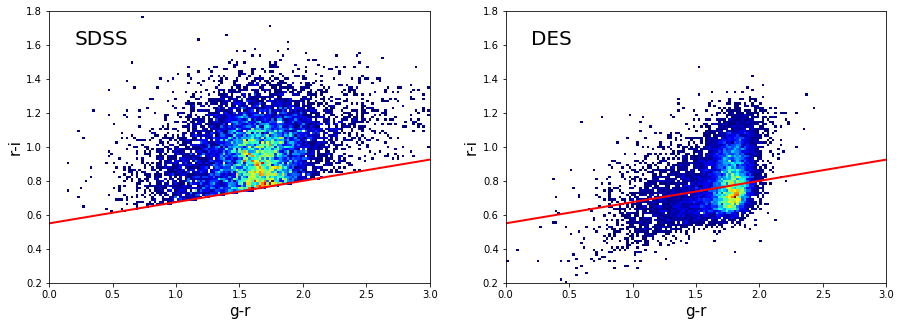

In [201]:
fig, (ax,ax2) = plt.subplots(1,2,figsize=(15,5))

#ax.plot(gr_sdss, ri_sdss, '.', markersize = 1)

ax.imshow(np.rot90(Ngal_sdss), extent=(np.amin(xbins), np.amax(xbins), np.amin(ybins), np.amax(ybins)),
        cmap=cm.jet, aspect='auto')#, 

ax.plot(x, dperp, 'r-', linewidth=2)

#ax.errorbar( gr_sdss[dperpcut], ri_sdss[dperpcut], xerr = gr_sdss_err[dperpcut], 
#            yerr = ri_sdss_err[dperpcut], fmt = 'o', color='black', zorder=10)

ax.text(0.2, 1.6, 'SDSS', fontsize=20)
ax.set_xlabel('g-r', fontsize=15)
ax.set_ylabel('r-i', fontsize=15)
ax.set_xlim(0,3.)
ax.set_ylim(0.2,1.8)


#ax2.plot(gr_des, ri_des, 'g.', markersize = 1)
#ax2.plot(new_gr_sdss, new_ri_sdss, 'g.', markersize = 1)
ax2.imshow(np.rot90(Ngal_des), extent=(np.amin(xbins), np.amax(xbins), np.amin(ybins), np.amax(ybins)),
        cmap=cm.jet, aspect='auto'  )#, 

ax2.plot(x, dperp, 'r-', linewidth = 2)
#ax2.errorbar( gr_des[dperpcut], ri_des[dperpcut], xerr = gr_des_err[dperpcut], 
#            yerr = ri_des_err[dperpcut], fmt = '.', color='black', zorder=10)

ax2.text(0.2, 1.6, 'DES', fontsize=20)
ax2.set_xlabel('g-r', fontsize=15)
ax2.set_ylabel('r-i', fontsize=15)

ax2.set_xlim(0,3.)
ax2.set_ylim(0.2,1.8)

In [390]:


base_dir ='/n/des/lee.5922/programs/cosmolike/MG_musigma/'

ggl_boss1 = np.genfromtxt(base_dir+'like/like_test_ggl_boss_boss_fid1_sam320000')[3200:,:-1]
ggl_boss2 = np.genfromtxt(base_dir+'like/like_test_ggl_boss_boss_fid2_sam320000')[3200:,:-1]
ggl_boss = np.vstack((ggl_boss1, ggl_boss2))

planck_ggl_boss1 = np.genfromtxt(base_dir+'like/like_test_planck6params_boss_fid1_sam320000')[12800*10:,:-1]
planck_ggl_boss2 = np.genfromtxt(base_dir+'like/like_test_planck6params_boss_fid2_sam320000')[12800*10:,:-1]
planck_ggl_boss = np.vstack((planck_ggl_boss1, planck_ggl_boss2))

planck_shear_ggl_boss1 = np.genfromtxt(base_dir+'like/like_planck_shear_ggl_boss_sam320000')[12800*10:,:-1]
planck_shear_ggl_boss2 = np.genfromtxt(base_dir+'like/like_planck_shear_ggl_boss2_sam320000')[20000*10:,:-1]
planck_shear_ggl_boss = np.vstack((planck_shear_ggl_boss1, planck_shear_ggl_boss2))

Simpson_data = np.random.multivariate_normal([0.0, 0.0], [[0.14**2, 0], [0, 0.25**2]], size=320000)

#boss_6df = np.genfromtxt('like/like_boss_6df_sam320000')[12800*4:,5:7]
#boss_6df_lowz = np.genfromtxt('like/like_boss_lowz_6df_sam320000_copy')[:,5:7]
#boss_lowz = np.genfromtxt('like/like_boss_lowz_sam320000_copy')[:,5:7]

#planck_boss_6df = np.genfromtxt('like/like_planck_boss_6df_sam320000')[12800*4:,5:7]
#planck_boss_lowz = np.genfromtxt('like/like_planck_boss_lowz_sam320000')[12800*4:,5:7]
#planck_boss_Howlett = np.genfromtxt('like/like_planck_boss_Howlett_sam320000')[12800*4:,5:7]

planck_shear_ggl_boss_6df = np.genfromtxt(base_dir+'like/like_planck_shear_ggl_boss_6df2_sam320000')[12800*10:,:-1]  
#planck_ggl_shear = np.genfromtxt('like/like_planck_ggl_shear_sam320000')[12800*10:,:-1]

#planck_all_clustering = np.genfromtxt('like/like_planck_boss_lowz_6df_wiggleZ_howlett_alam_sam320000_copy')[:12800*10,:-1]

#planck_all_clustering_wo_boss = np.genfromtxt('like/like_planck_lowz_6df_wiggleZ_howlett_alam_sam320000')[:12800*25,:-1]
planck_shear_ggl_boss_6df_h0 = np.genfromtxt(base_dir+'like/like_planck_shear_ggl_boss_6df_h0_sam320000')[12800*10:,:-1]

#planck_simpson_BAO = np.genfromtxt('like/like_simpson2_sam320000')[12800*10:,:-1]
#test_plc = np.genfromtxt('like/like_test_plc_sam320000_copy')[12800:,:-1]



In [391]:
ggl_boss.shape

(633600, 10)

In [416]:
cmass_spec = esutil.io.read('/n/des/lee.5922/data/cmass_cat/galaxy_DR12v5_CMASS_South.fits.gz')
#cmass_photo = esutil.io.read('/n/des/lee.5922/data/cmass_cat/galaxy_DR11v1_CMASS_South-photoObj.fits.gz')
cmass_stripe = Cuts.keepGoodRegion(cmass_spec)
gold_train, cmass_train = matchCatalogsbyPosition(gold_st82, cmass_stripe)

In [202]:
#dmass_st82 = esutil.io.read('../output/n2/dmass_st82.fits')
dmass_st82 = esutil.io.read('../output/n2//dmass_st82.fits')
dmass_spt = esutil.io.read('../output/n2_2/dmass_spt.fits')
lowccut = dmass_spt['EachProb_CMASS'] > 0.0
dmass_spt = dmass_spt[lowccut]

fraction of dmass sample at z < 0.43 : 3.9104057045918514 11593
fraction of cmass sample at z < 0.43 : 3.9909449148989697 11927
fraction of sample at z < 0.43 : 7.057361637514309 112398


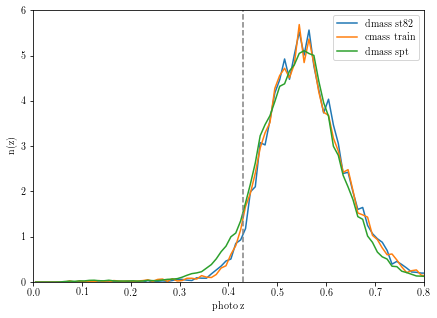

In [530]:
zbin, dz = np.linspace(0.0, 10.0, 1001, retstep=True)
zcenter = zbin[:-1]+dz/2.
fig, ax = plt.subplots(figsize = (7,5))
N_dmass_st82,_= np.histogram( dmass_st82['DESDM_ZP'], bins=zbin, normed=True)
N_cmass_st82,_  = np.histogram( gold_train['DESDM_ZP'], bins=zbin,  normed=True)
N_dmass_spt,_  = np.histogram( dmass_spt['DESDM_ZP'], bins=zbin,  normed=True)
N_cmass_st82_specz,_  = np.histogram( cmass_train['Z'], bins=zbin,  normed=True)
#N_dmass_spt2,_  = np.histogram( dmass_spt_v2['DESDM_ZP'], bins=zbin,  normed=True)
#N_dmass_st,_  = np.histogram( dmass_st['DESDM_ZP'], bins=zbin,  normed=True)

ax.plot(zcenter, N_dmass_st82, label = 'dmass st82')
ax.plot(zcenter, N_cmass_st82, label = 'cmass train')
ax.plot(zcenter, N_dmass_spt, label = 'dmass spt')
#ax.plot(zcenter, N_cmass_st82_specz, '--' ,label = 'cmass train specz')
#ax.plot(zcenter, N_dmass_spt2, label = 'dmass spt, low prob cut')
ax.axvline(x = 0.43, color='grey', linestyle='--')


fraction1= scipy.integrate.simps(N_dmass_st82[:43], dx = dz )*100
fraction2= scipy.integrate.simps(N_cmass_st82[:43], dx = dz )*100
fraction3= scipy.integrate.simps(N_dmass_spt[:43], dx = dz )*100
#fraction4= scipy.integrate.simps(N_dmass_spt2[:43], dx = dz )*100

print 'fraction of dmass sample at z < 0.43 :', fraction1, dmass_st82.size
print 'fraction of cmass sample at z < 0.43 :', fraction2, gold_train.size
print 'fraction of sample at z < 0.43 :', fraction3, dmass_spt.size
#print 'fraction of sample at z < 0.43 :', fraction4, dmass_spt_v2.size

fraction = ' photo-z z < 0.43 \n DMASS : {:0.2f}% ({}) \n CMASS : {:0.2f}% ({})'\
.format(fraction1, dmass_st82.size, fraction2, gold_train.size)
#ax.text(0.02, 4, fraction, fontsize = 15 )
ax.set_xlabel('photo z')
ax.set_ylabel('n(z)')
ax.set_xlim(0, 0.8)
ax.set_ylim(0,6)
ax.legend()

In [215]:
train_sample = fitsio.read(rootdir+'train_sample_des.fits')

In [210]:
#cmass_fraction = 0.0168419931# clean_cmass_data_des.size *1./gold_st82.size
dmass_st82 = io.SearchAndCallFits(path = rootdir, keyword = 'gold_st82_prob.fits')
dmass_spt = io.SearchAndCallFits(path = rootdir, keyword = 'gold_spt')


--------------------------------
 calling catalog
--------------------------------
gold_st82_prob.fits

--------------------------------
 calling catalog
--------------------------------
gold_spt_prob_jk001.fits
gold_spt_prob_jk002.fits
gold_spt_prob_jk003.fits
gold_spt_prob_jk004.fits
gold_spt_prob_jk005.fits
gold_spt_prob_jk006.fits
gold_spt_prob_jk007.fits
gold_spt_prob_jk008.fits
reading 1/8 ../output/sfd_train_photo_SamPle_nozband_ran10_3/gold_spt_prob_jk001.fits
reading 2/8 ../output/sfd_train_photo_SamPle_nozband_ran10_3/gold_spt_prob_jk002.fits
reading 3/8 ../output/sfd_train_photo_SamPle_nozband_ran10_3/gold_spt_prob_jk003.fits
reading 4/8 ../output/sfd_train_photo_SamPle_nozband_ran10_3/gold_spt_prob_jk004.fits
reading 5/8 ../output/sfd_train_photo_SamPle_nozband_ran10_3/gold_spt_prob_jk005.fits
reading 6/8 ../output/sfd_train_photo_SamPle_nozband_ran10_3/gold_spt_prob_jk006.fits
reading 7/8 ../output/sfd_train_photo_SamPle_nozband_ran10_3/gold_spt_prob_jk007.fits
reading 8/

In [14]:
clean_cmass_data_des.size

NameError: name 'clean_cmass_data_des' is not defined

0 0 1 1 2 2 3 3 4 4 5 5 6 6 7 7 8 8 9 9


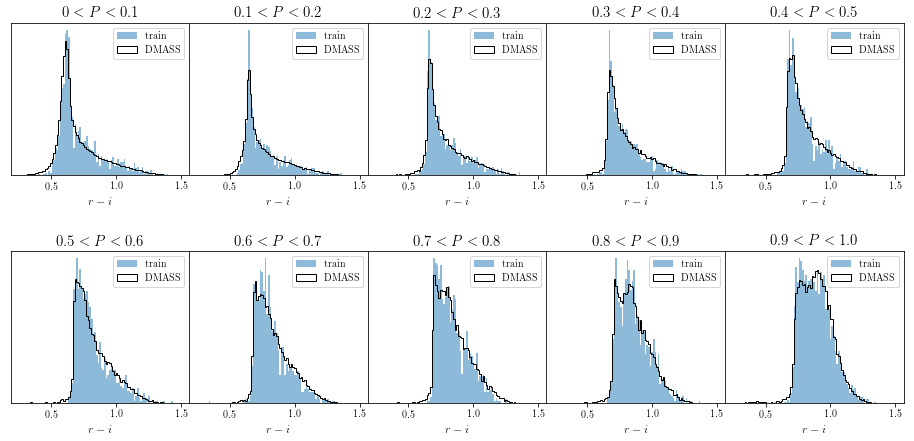

In [252]:
probcut = 0.0

labels = ['train', 'DMASS']
catlist = [clean_cmass_data_des, dmass_spt[dmass_spt['EachProb_CMASS']>0.01]]
cbin = np.linspace(0.25, 1.5, 100)
probcut = 0
fig, ax = plt.subplots(2,5, figsize=(16,7))
ax = ax.ravel()
for i in range(10):     
    for la, cat in zip(labels, catlist) :     
        mask = (cat['EachProb_CMASS'] > probcut) & (cat['EachProb_CMASS'] < probcut + 0.1) \
        & (cat['EachProb_CMASS'] > 0.01) # & ( (cat['MAG_MODEL_G']- cat['MAG_MODEL_R']) < 1.6)
        
        histtype = 'stepfilled' 
        alpha = 0.5
        if la in ['DMASS SPT', 'DMASS', 'dmass'] : 
            ax[i].hist( (cat['MAG_DETMODEL_R']-cat['MAG_DETMODEL_I'])[mask], \
                    bins = cbin, alpha = 1.0, label = la + ''.format(np.sum(mask)*1./mask.size*100), \
                       normed=True, histtype='step', color = 'black', weights = cat[mask]['EachProb_CMASS']);  
        
        else : 
            ax[i].hist( (cat['MAG_DETMODEL_R']-cat['MAG_DETMODEL_I'])[mask], \
                    bins = cbin, alpha = alpha, label = la + ''.format(np.sum(mask)*1./mask.size*100), \
                       normed=True, histtype=histtype);  
        #print probcut, probcut+0.1, np.sum(mask), la
        print i,
        tag = ' ${} < P < {}$'.format(probcut, probcut+0.1)
        #ax[i].set_xlim(0, 1.0)
        ax[i].legend(loc=1)
        ax[i].set_title(tag, fontsize=15)
        ax[i].set_xlabel('$r-i$', fontsize = 12)
        ax[i].set_ylabel('$n(z)$')
        ax[i].get_yaxis().set_visible(False)
        #elif i != 2 : ax[i].get_yaxis().set_visible(False)
        
    probcut += 0.1
    
#ax[0].get_yaxis().set_visible(True)
#ax[5].get_yaxis().set_visible(True)
fig.subplots_adjust(wspace=0, hspace=0.5);
fig.savefig('../paper_figure//probhist_ri.pdf')



0 0 1 1 2 2 3 3 4 4 5 5 6 6 7 7 8 8 9 9


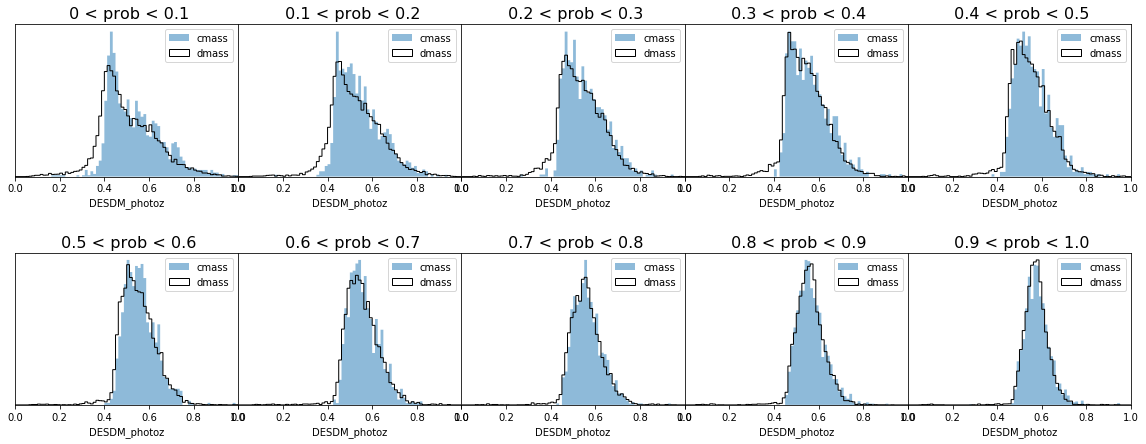

In [219]:
zbin, dz = np.linspace(0.0, 10.0, 801, retstep=True)
zcenter = zbin[:-1]+dz/2.

probcut = 0.0

labels = ['cmass', 'dmass']
catlist = [gold_train_prob, dmass_spt]

probcut = 0
fig, ax = plt.subplots(2,5, figsize=(20,7))
ax = ax.ravel()
for i in range(10):     
    for la, cat in zip(labels, catlist) :     
        mask = (cat['EachProb_CMASS'] > probcut) & (cat['EachProb_CMASS'] < probcut + 0.1) \
        & (cat['EachProb_CMASS'] > 0.01) # & ( (cat['MAG_MODEL_G']- cat['MAG_MODEL_R']) < 1.6)
        
        histtype = 'stepfilled' 
        alpha = 0.5
        if la == 'dmass' : 
            ax[i].hist( cat['DESDM_ZP'][mask], \
                    bins = zbin, alpha = 1.0, label = la + ''.format(np.sum(mask)*1./mask.size*100), \
                       normed=True, histtype='step', color = 'black');  
        
        else : 
            ax[i].hist( cat['DESDM_ZP'][mask], \
                    bins = zbin, alpha = alpha, label = la + ''.format(np.sum(mask)*1./mask.size*100), \
                       normed=True, histtype=histtype);  
        #print probcut, probcut+0.1, np.sum(mask), la
        print i,
        tag = ' {} < prob < {}'.format(probcut, probcut+0.1)
        ax[i].set_xlim(0, 1.0)
        ax[i].legend(loc='best')
        ax[i].set_title(tag, fontsize = 16)
        ax[i].set_xlabel('DESDM_photoz')
        ax[i].set_ylabel('n(z)')
        ax[i].get_yaxis().set_visible(False)
        #elif i != 2 : ax[i].get_yaxis().set_visible(False)
        
    probcut += 0.1
    
#ax[0].get_yaxis().set_visible(True)
#ax[5].get_yaxis().set_visible(True)
fig.subplots_adjust(wspace=0, hspace=0.5);
#fig.savefig('../output/n2_2/pics/probhist.png')

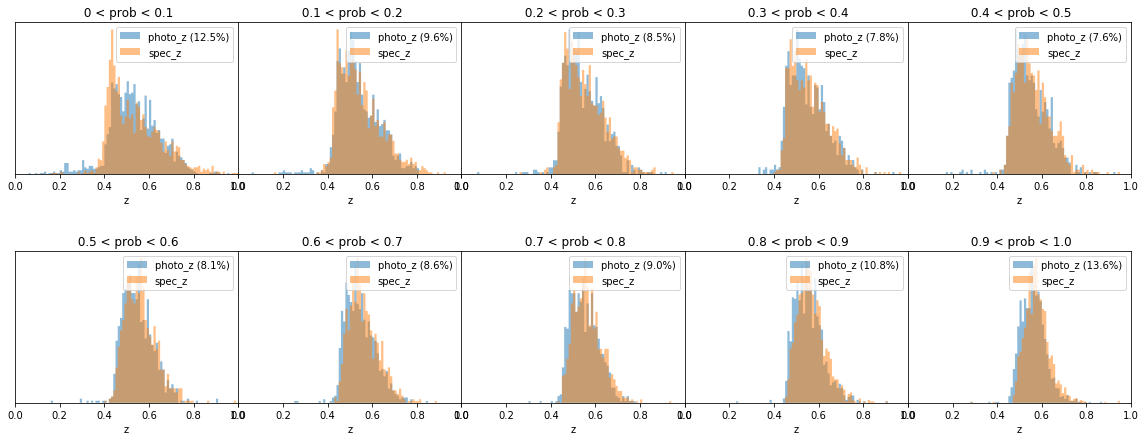

In [104]:

probcut = 0.0
probcut = 0
fig, ax = plt.subplots(2,5, figsize=(20,7))

ax = ax.ravel()
for i in range(10):     
    #for la, cat in zip(labels, catlist) :     
    mask = (gold_train_prob['EachProb_CMASS'] > probcut) & (gold_train_prob['EachProb_CMASS'] < probcut + 0.1) \
    & (gold_train_prob['EachProb_CMASS'] > 0.01) # & ( (cat['MAG_MODEL_G']- cat['MAG_MODEL_R']) < 1.6)
    
    ax[i].hist( cmass_train['Z'][mask], \
            bins = zbin, alpha = 0.5, label = 'photo_z ({:0.1f}%)'.format(np.sum(mask)*1./mask.size*100), \
               normed=True, histtype='stepfilled' );  
    ax[i].hist( gold_train_prob['DESDM_ZP'][mask], \
            bins = zbin, alpha = 0.5, label = 'spec_z', \
            normed=True, histtype='stepfilled' );  

    tag = ' {} < prob < {}'.format(probcut, probcut+0.1)
    ax[i].set_xlim(0, 1.0)
    ax[i].legend(loc='best')
    ax[i].set_title(tag)
    ax[i].set_xlabel('z')
    ax[i].set_ylabel('n(z)')
    ax[i].get_yaxis().set_visible(False)
    #elif i != 2 : ax[i].get_yaxis().set_visible(False)
        
    probcut += 0.1
    
#ax[0].get_yaxis().set_visible(True)
#ax[5].get_yaxis().set_visible(True)
fig.subplots_adjust(wspace=0, hspace=0.5);
#fig.savefig('../output/n2_2/pics/probhist.png')

0 0 1 1 2 2 3 3 4 4 5 5 6 6 7 7 8 8 9 9


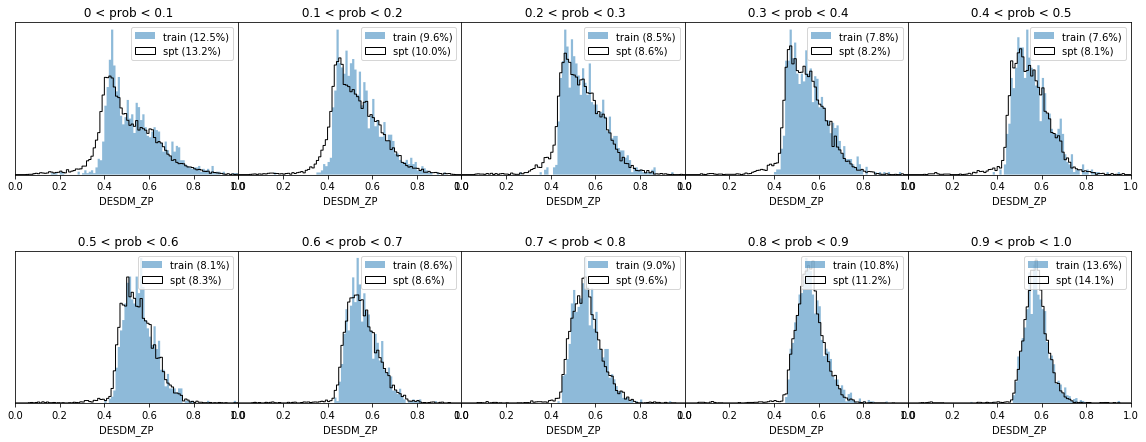

In [128]:

probcut = 0.0

labels = ['train', 'spt']
catlist = [gold_train_prob, dmass_spt]

probcut = 0
fig, ax = plt.subplots(2,5, figsize=(20,7))
ax = ax.ravel()
for i in range(10):     
    for la, cat in zip(labels, catlist) :     
        mask = (cat['EachProb_CMASS'] > probcut) & (cat['EachProb_CMASS'] < probcut + 0.1) \
        & (cat['EachProb_CMASS'] > 0.01) # & ( (cat['MAG_MODEL_G']- cat['MAG_MODEL_R']) < 1.6)
        
        histtype = 'stepfilled' 
        alpha = 0.5
        if la == 'spt' : 
            ax[i].hist( cat['DESDM_ZP'][mask], \
                    bins = zbin, alpha = 1.0, label = la + ' ({:0.1f}%)'.format(np.sum(mask)*1./mask.size*100), \
                       normed=True, histtype='step', color = 'black');  
        
        else : 
            ax[i].hist( cat['DESDM_ZP'][mask], \
                    bins = zbin, alpha = alpha, label = la + ' ({:0.1f}%)'.format(np.sum(mask)*1./mask.size*100), \
                       normed=True, histtype=histtype);  
        #print probcut, probcut+0.1, np.sum(mask), la
        print i,
        tag = ' {} < prob < {}'.format(probcut, probcut+0.1)
        ax[i].set_xlim(0, 1.0)
        ax[i].legend(loc='best')
        ax[i].set_title(tag)
        ax[i].set_xlabel('DESDM_ZP')
        ax[i].set_ylabel('n(z)')
        ax[i].get_yaxis().set_visible(False)
        #elif i != 2 : ax[i].get_yaxis().set_visible(False)
        
    probcut += 0.1
    
#ax[0].get_yaxis().set_visible(True)
#ax[5].get_yaxis().set_visible(True)
fig.subplots_adjust(wspace=0, hspace=0.5);
#fig.savefig('../output/n2_2/pics/probhist.png')

0 0 1 1 2 2 3 3 4 4 5 5 6 6 7 7 8 8 9 9


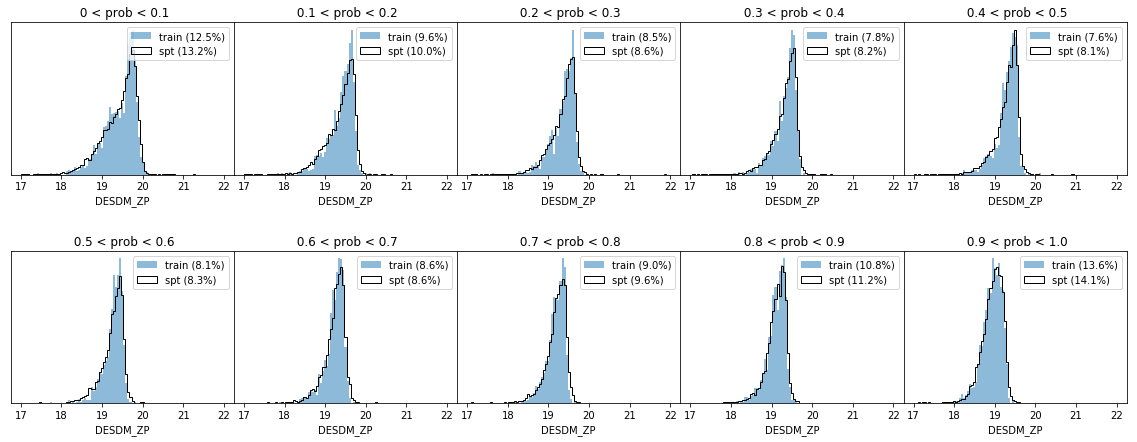

In [135]:

probcut = 0.0
cbin = np.linspace(17,22,100)
labels = ['train', 'spt']
catlist = [gold_train_prob, dmass_spt]

probcut = 0
fig, ax = plt.subplots(2,5, figsize=(20,7))
ax = ax.ravel()
for i in range(10):     
    for la, cat in zip(labels, catlist) :     
        mask = (cat['EachProb_CMASS'] > probcut) & (cat['EachProb_CMASS'] < probcut + 0.1) \
        & (cat['EachProb_CMASS'] > 0.01) # & ( (cat['MAG_MODEL_G']- cat['MAG_MODEL_R']) < 1.6)
        
        histtype = 'stepfilled' 
        alpha = 0.5
        if la == 'spt' : 
            ax[i].hist( cat['MAG_MODEL_Z'][mask], \
                    bins = cbin, alpha = 1.0, label = la + ' ({:0.1f}%)'.format(np.sum(mask)*1./mask.size*100), \
                       normed=True, histtype='step', color = 'black');  
        
        else : 
            ax[i].hist( cat['MAG_MODEL_Z'][mask], \
                    bins = cbin, alpha = alpha, label = la + ' ({:0.1f}%)'.format(np.sum(mask)*1./mask.size*100), \
                       normed=True, histtype=histtype);  
        #print probcut, probcut+0.1, np.sum(mask), la
        print i,
        tag = ' {} < prob < {}'.format(probcut, probcut+0.1)
        #ax[i].set_xlim(0, 1.0)
        ax[i].legend(loc='best')
        ax[i].set_title(tag)
        ax[i].set_xlabel('DESDM_ZP')
        ax[i].set_ylabel('n(z)')
        ax[i].get_yaxis().set_visible(False)
        #elif i != 2 : ax[i].get_yaxis().set_visible(False)
        
    probcut += 0.1
    
#ax[0].get_yaxis().set_visible(True)
#ax[5].get_yaxis().set_visible(True)
fig.subplots_adjust(wspace=0, hspace=0.5);
#fig.savefig('../output/n2_2/pics/probhist.png')

0 0 1 1 2 2 3 3 4 4 5 5 6 6 7 7 8 8 9 9


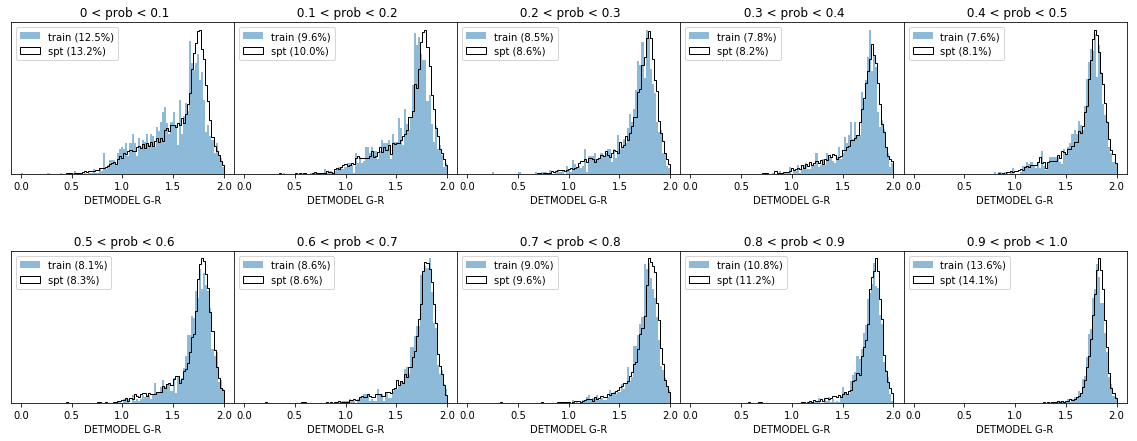

In [129]:

probcut = 0.0

labels = ['train', 'spt']
catlist = [gold_train_prob, dmass_spt]
cbin = np.linspace(0.,2., 100)
probcut = 0
fig, ax = plt.subplots(2,5, figsize=(20,7))
ax = ax.ravel()
for i in range(10):     
    for la, cat in zip(labels, catlist) :     
        mask = (cat['EachProb_CMASS'] > probcut) & (cat['EachProb_CMASS'] < probcut + 0.1) \
        & (cat['EachProb_CMASS'] > 0.01) # & ( (cat['MAG_MODEL_G']- cat['MAG_MODEL_R']) < 1.6)
        
        histtype = 'stepfilled' 
        alpha = 0.5
        if la == 'spt' : 
            ax[i].hist( (cat['MAG_DETMODEL_G']-cat['MAG_DETMODEL_R'])[mask], \
                    bins = cbin, alpha = 1.0, label = la + ' ({:0.1f}%)'.format(np.sum(mask)*1./mask.size*100), \
                       normed=True, histtype='step', color = 'black');  
        
        else : 
            ax[i].hist( (cat['MAG_DETMODEL_G']-cat['MAG_DETMODEL_R'])[mask], \
                    bins = cbin, alpha = alpha, label = la + ' ({:0.1f}%)'.format(np.sum(mask)*1./mask.size*100), \
                       normed=True, histtype=histtype);  
        #print probcut, probcut+0.1, np.sum(mask), la
        print i,
        tag = ' {} < prob < {}'.format(probcut, probcut+0.1)
        #ax[i].set_xlim(0, 1.0)
        ax[i].legend(loc=2)
        ax[i].set_title(tag)
        ax[i].set_xlabel('DETMODEL G-R')
        ax[i].set_ylabel('n(z)')
        ax[i].get_yaxis().set_visible(False)
        #elif i != 2 : ax[i].get_yaxis().set_visible(False)
        
    probcut += 0.1
    
#ax[0].get_yaxis().set_visible(True)
#ax[5].get_yaxis().set_visible(True)
fig.subplots_adjust(wspace=0, hspace=0.5);
#fig.savefig('../output/n2_2/pics/probhist.png')

0 0 1 1 2 2 3 3 4 4 5 5 6 6 7 7 8 8 9 9


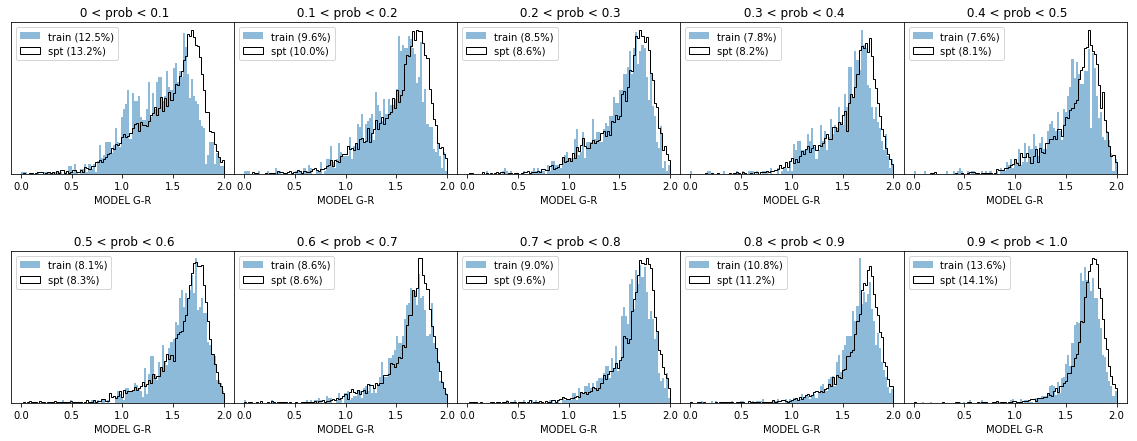

In [130]:

probcut = 0.0

labels = ['train', 'spt']
catlist = [gold_train_prob, dmass_spt]
cbin = np.linspace(0.,2., 100)
probcut = 0
fig, ax = plt.subplots(2,5, figsize=(20,7))
ax = ax.ravel()
for i in range(10):     
    for la, cat in zip(labels, catlist) :     
        mask = (cat['EachProb_CMASS'] > probcut) & (cat['EachProb_CMASS'] < probcut + 0.1) \
        & (cat['EachProb_CMASS'] > 0.01) # & ( (cat['MAG_MODEL_G']- cat['MAG_MODEL_R']) < 1.6)
        
        histtype = 'stepfilled' 
        alpha = 0.5
        if la == 'spt' : 
            ax[i].hist( (cat['MAG_MODEL_G']-cat['MAG_MODEL_R'])[mask], \
                    bins = cbin, alpha = 1.0, label = la + ' ({:0.1f}%)'.format(np.sum(mask)*1./mask.size*100), \
                       normed=True, histtype='step', color = 'black');  
        
        else : 
            ax[i].hist( (cat['MAG_MODEL_G']-cat['MAG_MODEL_R'])[mask], \
                    bins = cbin, alpha = alpha, label = la + ' ({:0.1f}%)'.format(np.sum(mask)*1./mask.size*100), \
                       normed=True, histtype=histtype);  
        #print probcut, probcut+0.1, np.sum(mask), la
        print i,
        tag = ' {} < prob < {}'.format(probcut, probcut+0.1)
        #ax[i].set_xlim(0, 1.0)
        ax[i].legend(loc=2)
        ax[i].set_title(tag)
        ax[i].set_xlabel('MODEL G-R')
        ax[i].set_ylabel('n(z)')
        ax[i].get_yaxis().set_visible(False)
        #elif i != 2 : ax[i].get_yaxis().set_visible(False)
        
    probcut += 0.1
    
#ax[0].get_yaxis().set_visible(True)
#ax[5].get_yaxis().set_visible(True)
fig.subplots_adjust(wspace=0, hspace=0.5);
#fig.savefig('../output/n2_2/pics/probhist.png')

0 0 1 1 2 2 3 3 4 4 5 5 6 6 7 7 8 8 9 9


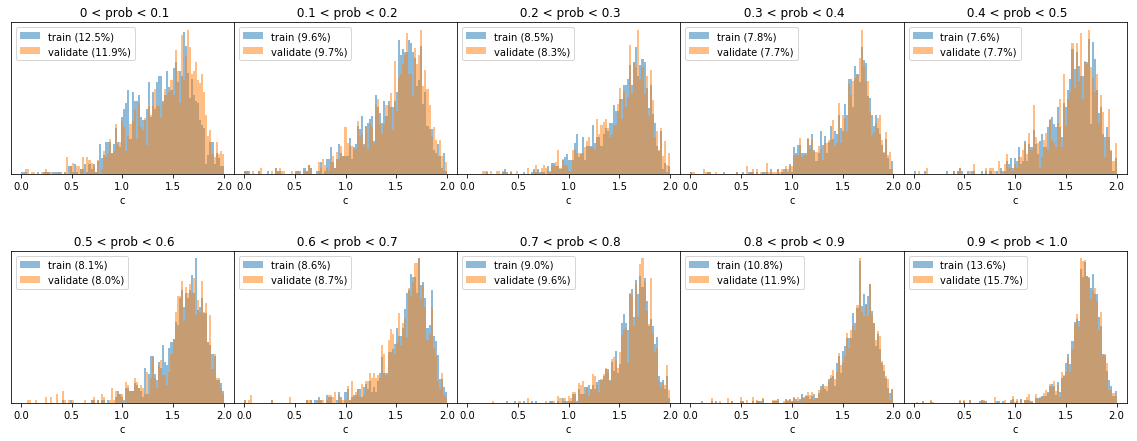

In [106]:

probcut = 0.0

labels = ['train', 'validate']
catlist = [gold_train_prob, dmass_st82]

cbin = np.linspace(0,2,100)
probcut = 0
fig, ax = plt.subplots(2,5, figsize=(20,7))
ax = ax.ravel()
for i in range(10):     
    for la, cat in zip(labels, catlist) :     
        mask = (cat['EachProb_CMASS'] > probcut) & (cat['EachProb_CMASS'] < probcut + 0.1) \
        & (cat['EachProb_CMASS'] > 0.01)
        ax[i].hist( (cat['MAG_MODEL_G']-cat['MAG_MODEL_R'])[mask], \
                bins = cbin, alpha = 0.5, label = la + ' ({:0.1f}%)'.format(np.sum(mask)*1./mask.size*100), \
                   normed=True, histtype='stepfilled' );  
        #print probcut, probcut+0.1, np.sum(mask), la
        print i,
        tag = ' {} < prob < {}'.format(probcut, probcut+0.1)
        #ax[i].set_xlim(0, 1.0)
        ax[i].legend(loc=2)
        ax[i].set_title(tag)
        ax[i].set_xlabel('c')
        ax[i].set_ylabel('n(z)')
        ax[i].get_yaxis().set_visible(False)
        #elif i != 2 : ax[i].get_yaxis().set_visible(False)
        
    probcut += 0.1
    
#ax[0].get_yaxis().set_visible(True)
#ax[5].get_yaxis().set_visible(True)
fig.subplots_adjust(wspace=0, hspace=0.5);
#fig.savefig('../output/n2_2/pics/probhist.png')

In [14]:
#dmass_spt = np.hstack(dmlist)
#esutil.io.write('../output/n2_2/dmass_spt.fits', dmass_spt, clobber=True)


--------------------------------
 calling catalog
--------------------------------
gold_spt_prob_jk001.fits

--------------------------------
 calling catalog
--------------------------------
gold_spt_prob_jk002.fits

--------------------------------
 calling catalog
--------------------------------
gold_spt_prob_jk003.fits

--------------------------------
 calling catalog
--------------------------------
gold_spt_prob_jk004.fits

--------------------------------
 calling catalog
--------------------------------
gold_spt_prob_jk005.fits

--------------------------------
 calling catalog
--------------------------------
gold_spt_prob_jk006.fits

--------------------------------
 calling catalog
--------------------------------
gold_spt_prob_jk007.fits

--------------------------------
 calling catalog
--------------------------------
gold_spt_prob_jk008.fits

--------------------------------
 calling catalog
--------------------------------
gold_spt_prob_jk009.fits

------------------

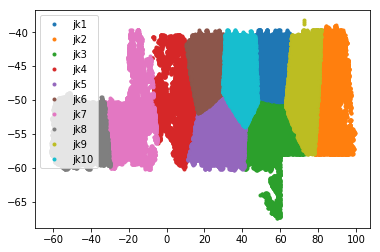

In [108]:
prob_cat_ilist = []
dmlist = []

from xd import resampleWithPth
fig, ax = plt.subplots()
for i in range(10):
    prob_cat_i = io.SearchAndCallFits(path = '/n/des/lee.5922/Dropbox/repositories/CMASS/code/output/n2_2//',\
                                    keyword='gold_spt_prob_jk{:03}'.format(i+1))
    dm, _ = resampleWithPth( prob_cat_i, pstart = 0.01, pmax = 1.0 )
    prob_cat_ilist.append(prob_cat_i)
    dmlist.append(dm)
    
    ra = dm['RA']
    ra[ra > 180] = ra[ra > 180] - 360
    
    ax.plot(ra, dm['DEC'], '.', label = 'jk{}'.format(i+1))
ax.legend()
#fig.savefig('../output/n2_2/pics/jkregion.png')

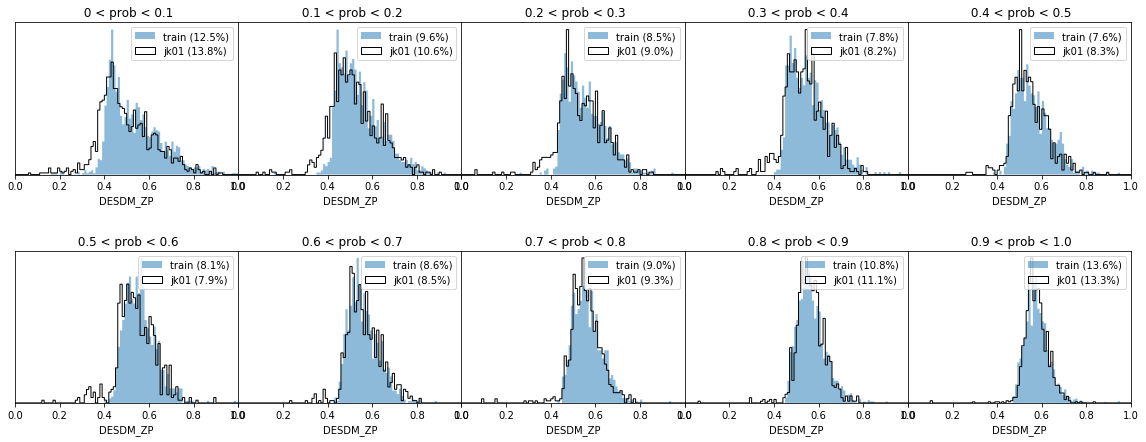

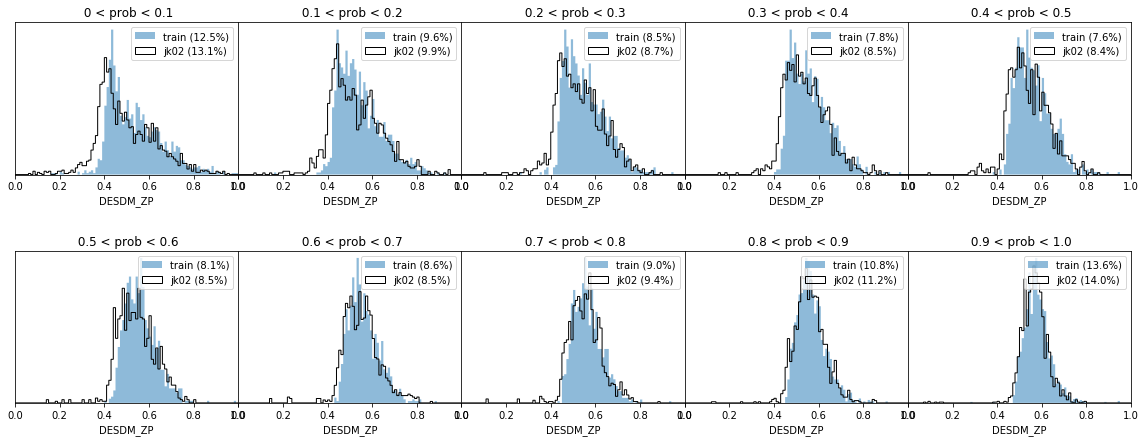

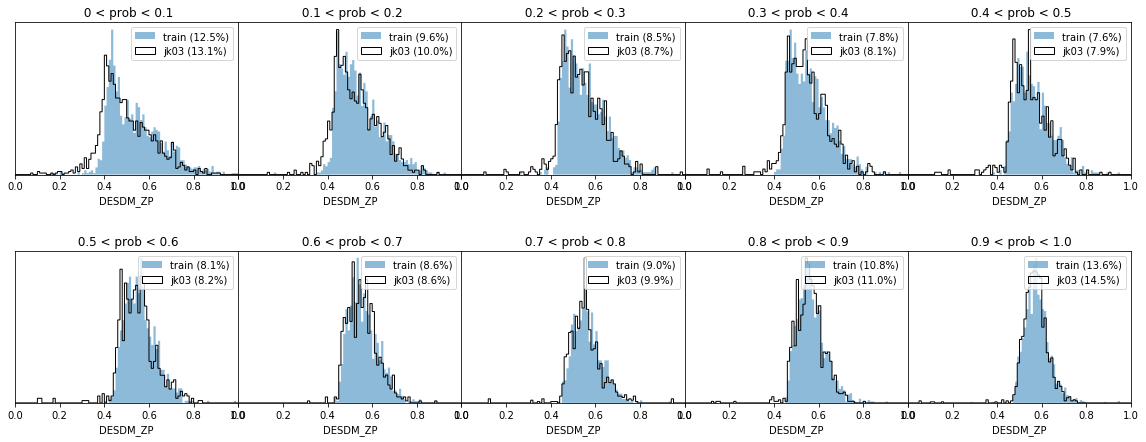

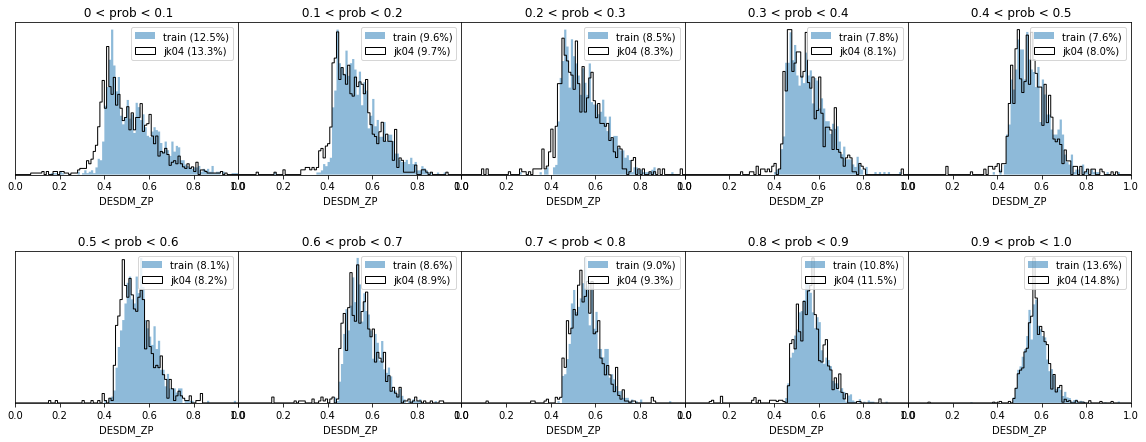

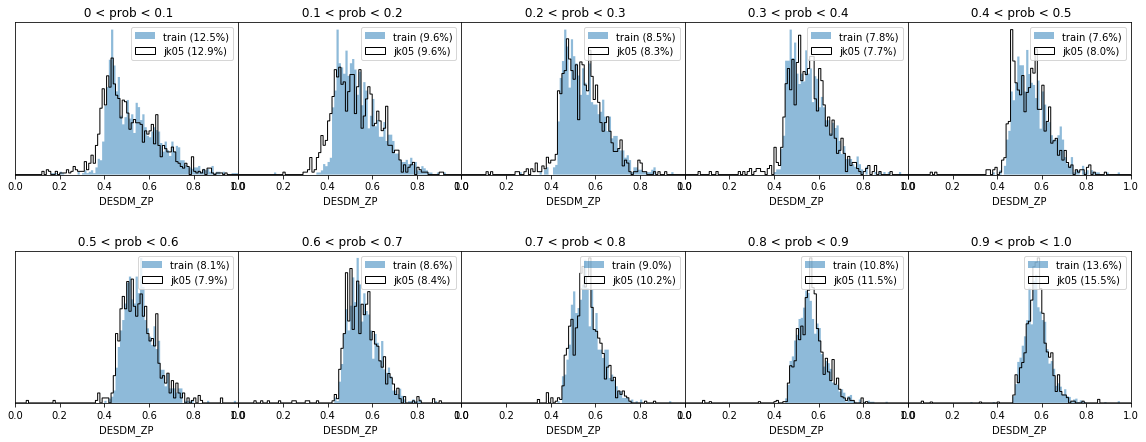

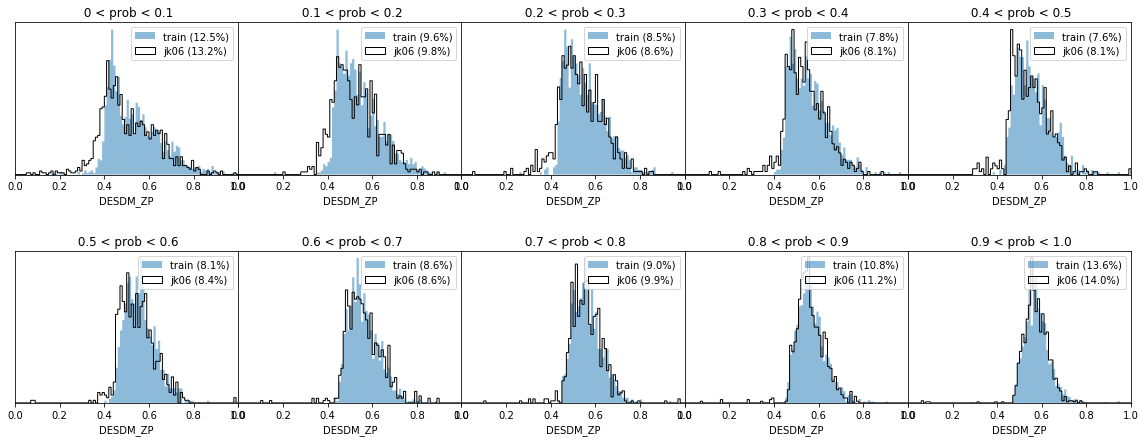

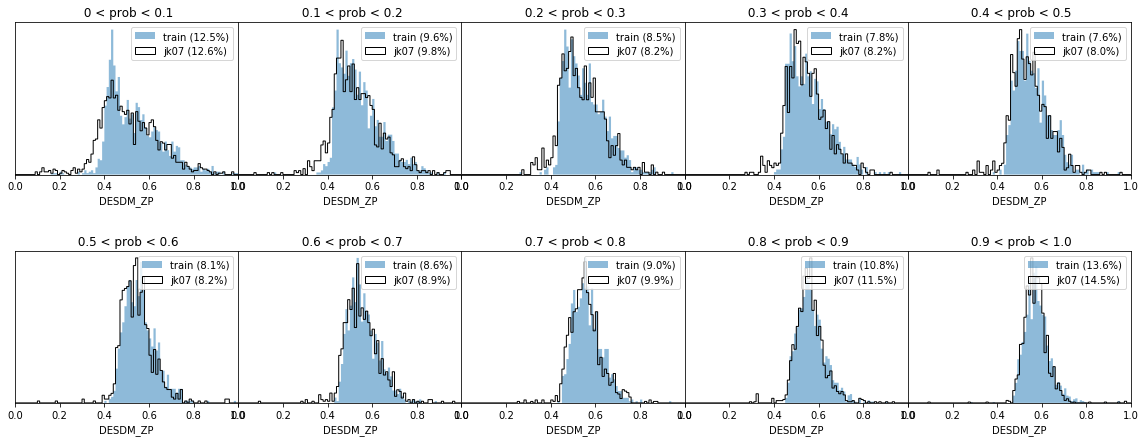

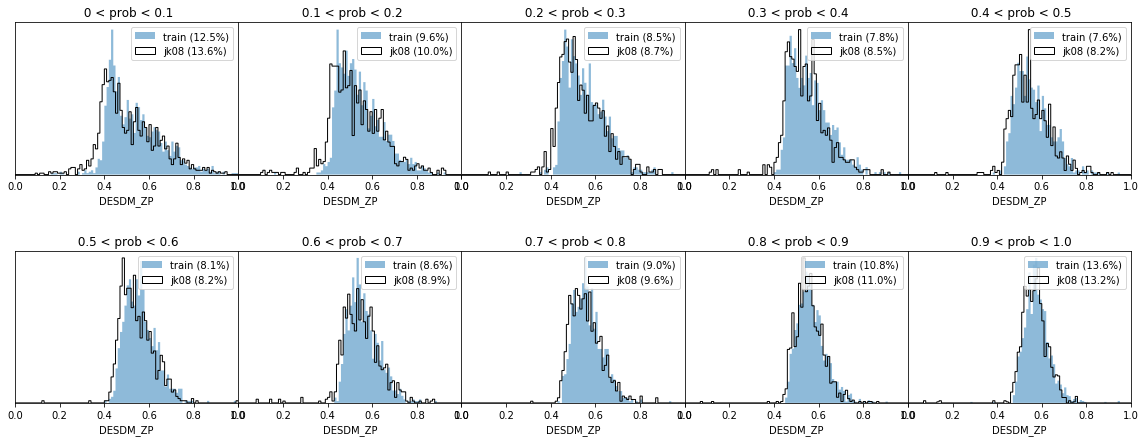

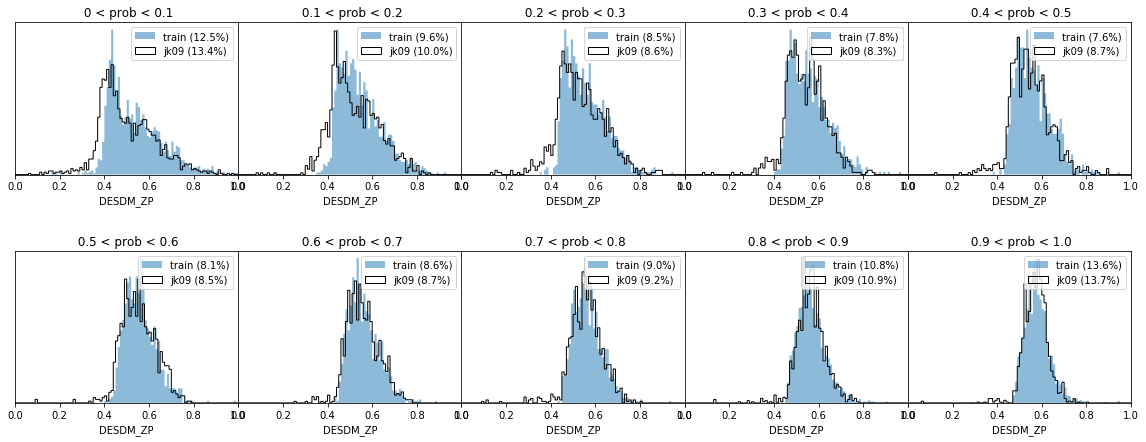

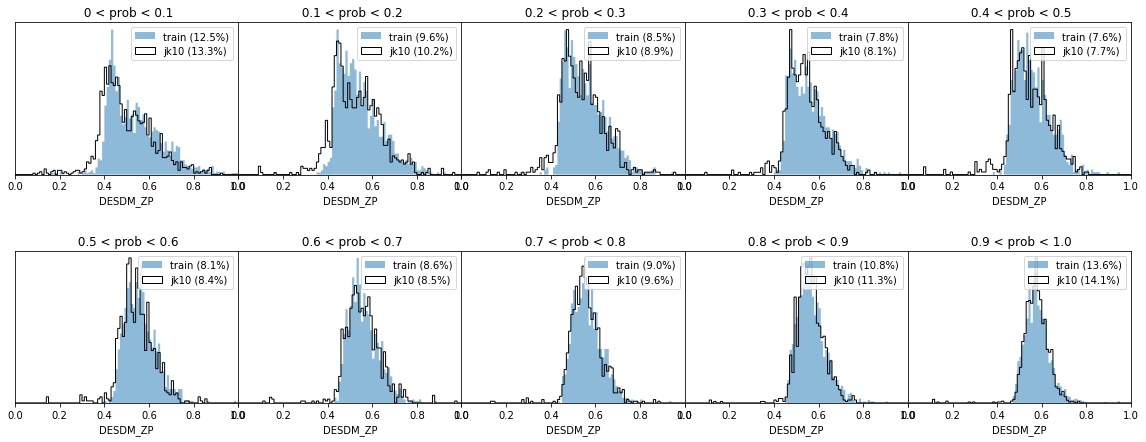

In [127]:
 
labels = ['train']+ ['jk{:02}'.format(i+1) for i in range(len(dmlist))]


for j in range(10):  
    probcut = 0
    catlist = [gold_train_prob] + dmlist[j:j+1]
    labels = ['train']+ ['jk{:02}'.format(i+1) for i in range(len(dmlist))][j:j+1]
    fig, ax = plt.subplots(2,5, figsize=(20,7))
    ax = ax.ravel()

    for i in range(10):     
        for la, cat in zip(labels, catlist) :     
            mask = (cat['EachProb_CMASS'] > probcut) & (cat['EachProb_CMASS'] < probcut + 0.1) \
            & (cat['EachProb_CMASS'] > 0.01) #& ((cat['MAG_MODEL_G']-cat['MAG_MODEL_R']) < 1.6)
            if la == 'train':
                ax[i].hist( cat['DESDM_ZP'][mask], \
                        bins = zbin, alpha = 0.5, label = la + ' ({:0.1f}%)'.format(np.sum(mask)*1./mask.size*100), \
                           normed=True, histtype='stepfilled' );  
            else : 
                ax[i].hist( cat['DESDM_ZP'][mask], \
                        bins = zbin, alpha = 1.0, label = la + ' ({:0.1f}%)'.format(np.sum(mask)*1./mask.size*100), \
                           normed=True, histtype='step', color='black' );  
            #print i, probcut, probcut+0.1, np.sum(mask), la
            #print i, 
            tag = ' {} < prob < {}'.format(probcut, probcut+0.1)
            ax[i].set_xlim(0, 1.0)
            ax[i].legend(loc='best')
            ax[i].set_title(tag)
            ax[i].set_xlabel('DESDM_ZP')
            ax[i].set_ylabel('n(z)')
            ax[i].get_yaxis().set_visible(False)
            #elif i != 2 : ax[i].get_yaxis().set_visible(False)

        probcut += 0.1

    #ax[0].get_yaxis().set_visible(True)
    #ax[5].get_yaxis().set_visible(True)
    fig.subplots_adjust(wspace=0, hspace=0.5);
    #fig.savefig('../output/n2_2/pics/probhist_jk{:03}.png'.format(j+1))

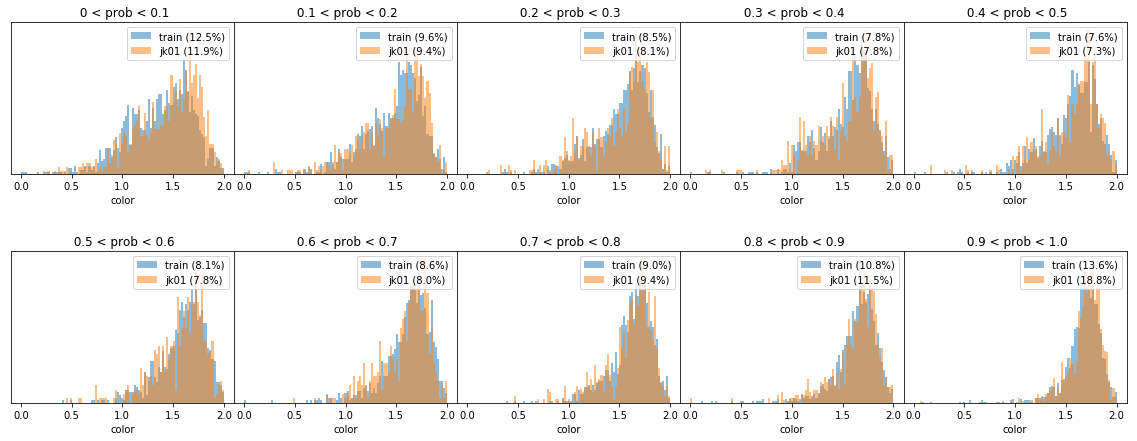

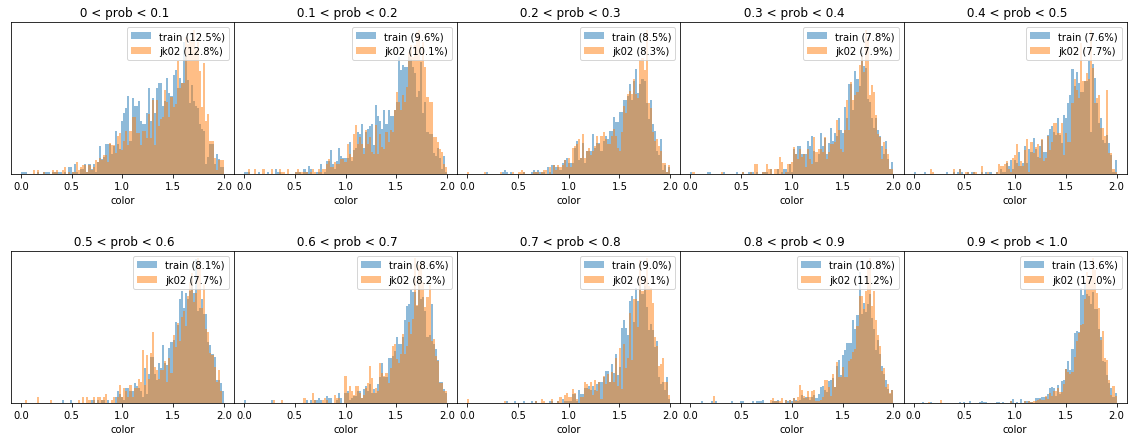

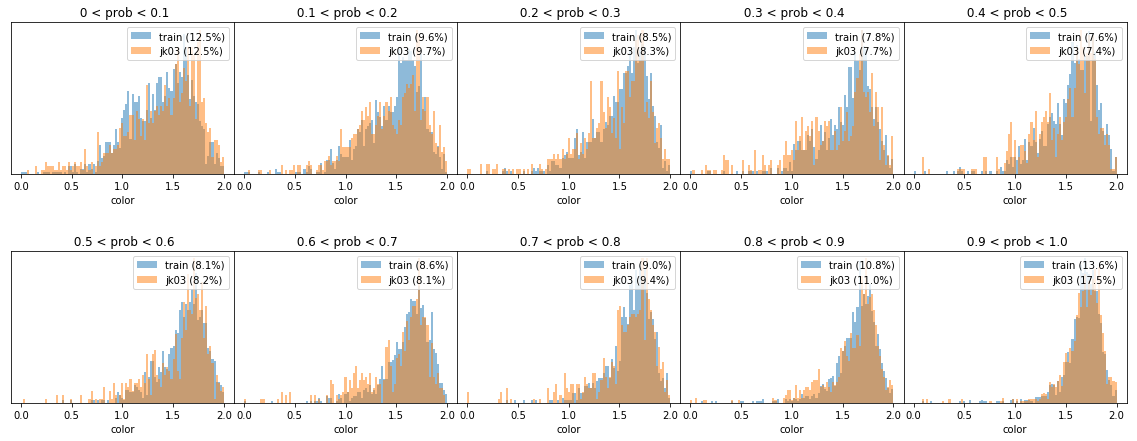

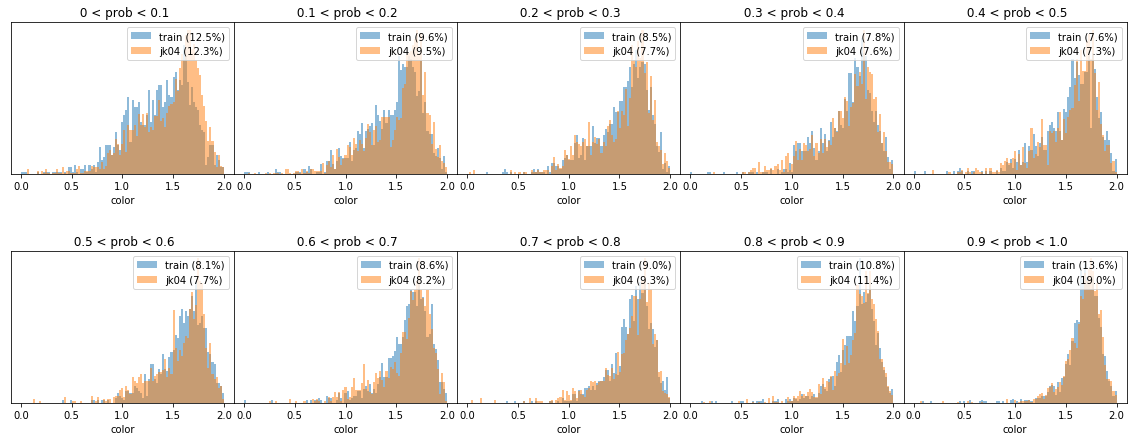

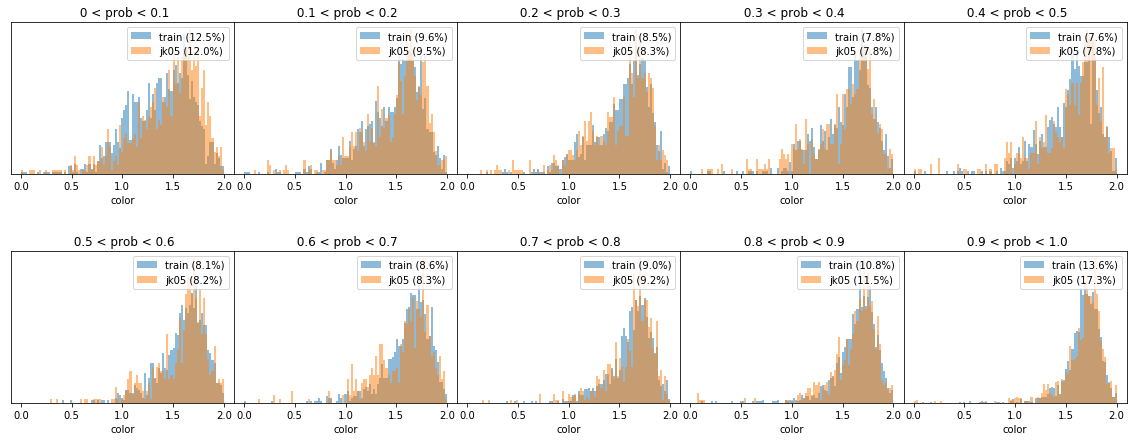

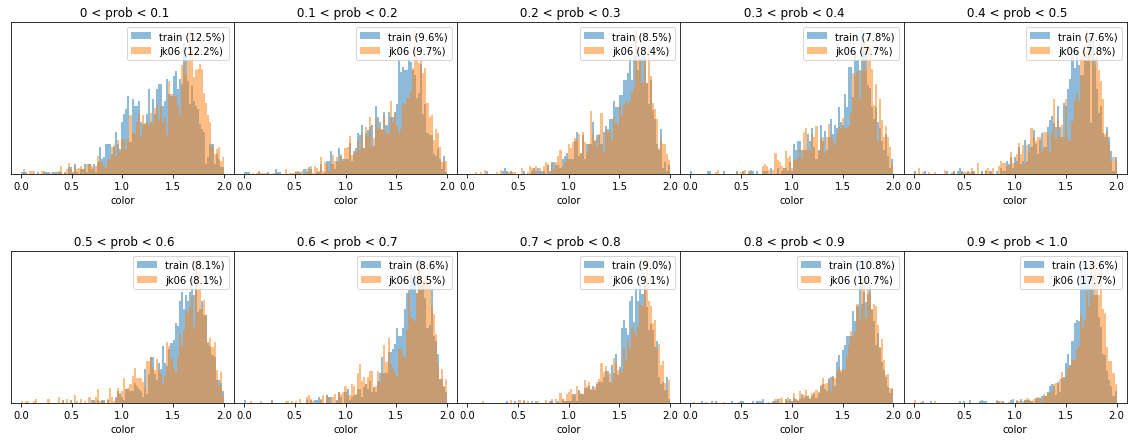

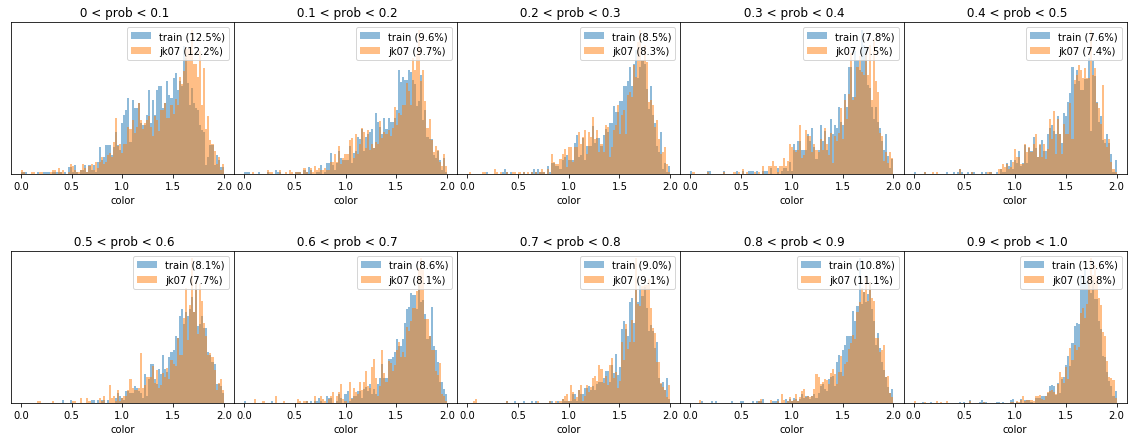

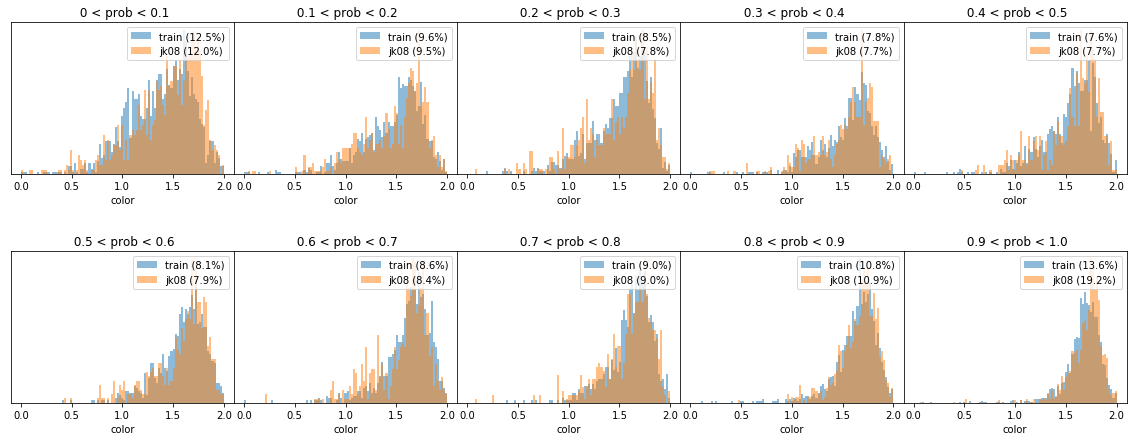

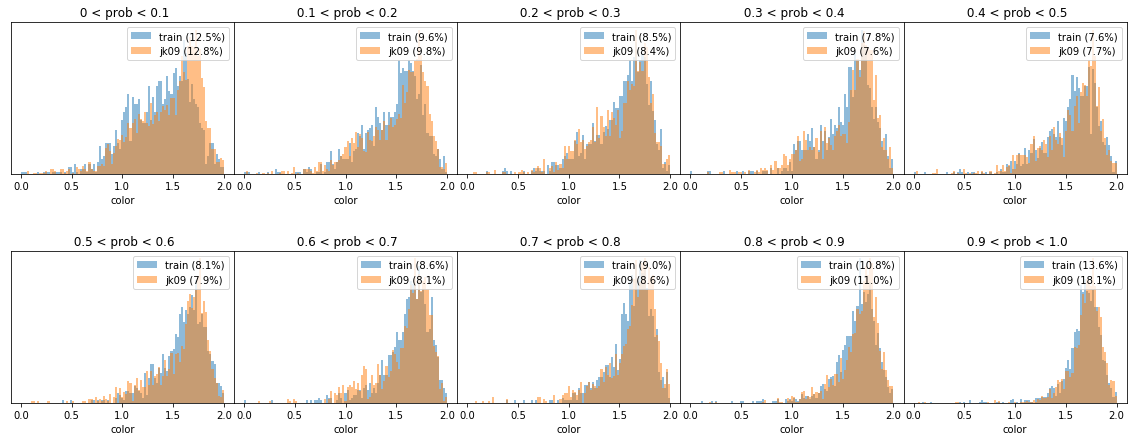

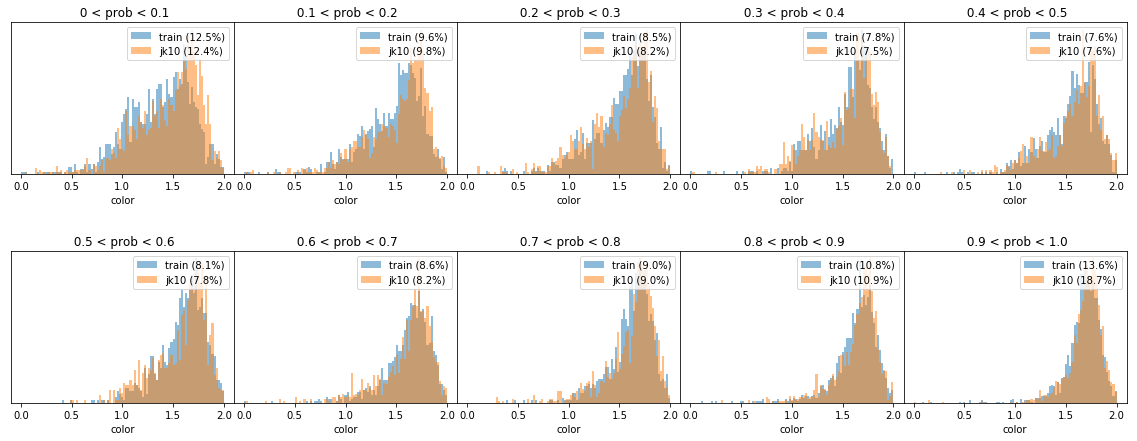

In [99]:
 
labels = ['train']+ ['jk{:02}'.format(i+1) for i in range(len(dmlist))]
cbin = np.linspace(0,2,100)

for j in range(10):  
    probcut = 0
    catlist = [gold_train_prob] + dmlist[j:j+1]
    labels = ['train']+ ['jk{:02}'.format(i+1) for i in range(len(dmlist))][j:j+1]
    fig, ax = plt.subplots(2,5, figsize=(20,7))
    ax = ax.ravel()

    for i in range(10):     
        for la, cat in zip(labels, catlist) :     
            mask = (cat['EachProb_CMASS'] > probcut) & (cat['EachProb_CMASS'] < probcut + 0.1) \
            & (cat['EachProb_CMASS'] > 0.01)
            ax[i].hist( (cat['MAG_MODEL_G']-cat['MAG_MODEL_R'])[mask], \
                    bins = cbin, alpha = 0.5, label = la + ' ({:0.1f}%)'.format(np.sum(mask)*1./mask.size*100), \
                       normed=True, histtype='stepfilled' );  
            #print i, probcut, probcut+0.1, np.sum(mask), la
            #print i, 
            tag = ' {} < prob < {}'.format(probcut, probcut+0.1)
            #ax[i].set_xlim(0, 1.0)
            ax[i].legend(loc='best')
            ax[i].set_title(tag)
            ax[i].set_xlabel('color')
            ax[i].set_ylabel('n')
            ax[i].get_yaxis().set_visible(False)
            #elif i != 2 : ax[i].get_yaxis().set_visible(False)

        probcut += 0.1

    #ax[0].get_yaxis().set_visible(True)
    #ax[5].get_yaxis().set_visible(True)
    fig.subplots_adjust(wspace=0, hspace=0.5);
    fig.savefig('../output/n6_modelgr//pics/probhist_magmodelgr_jk{:03}.png'.format(j+1))

In [55]:
import pickle
file = open('../output/n6_modelgr/gold_st82_XD_cmass.pkl', 'rb') 
clf = pickle.load(file)

In [57]:
random_sample = clf['retval'].sample(1000)

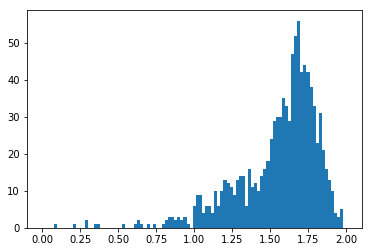

In [61]:
fig, ax = plt.subplots()
ax.hist( random_sample[:,0], bins = np.linspace(0,2,100));

In [60]:
random_sample[0,:].shape

(6,)

In [62]:
random_sample.shape

(1000, 6)

In [63]:
clf['retval'].V.shape

(10, 6, 6)